#### Relevant Modules

In [ ]:
## Installing if neccessary
!pip install geopandas
!pip install folium
pip install kmodes

In [1]:
# Data Analysis
import numpy as np
import pandas as pd
import random
import re
from datetime import datetime

# Visulaisation
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import geopandas as gpd
from branca.colormap import linear
from folium.plugins import MarkerCluster

# Frequent Pattern Mining 
import mlxtend
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth, fpmax, fpcommon
from mlxtend import frequent_patterns as fp
from mlxtend.preprocessing import TransactionEncoder

# Machine Learning/Clustering
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes
from sklearn.cluster import DBSCAN

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


# Miscelleanous
import warnings
warnings.filterwarnings("ignore")

#### Importing Data with EDA

In [2]:
df = pd.read_csv('eda_data.csv')
df.drop(df.columns[0], axis = 1, inplace = True)
df

Date      Date Type   Age     Sex                       Race  \
0     05/29/2012  Date of death  37.0    Male                      Black   
1     06/27/2012  Date of death  37.0    Male                      White   
2     03/24/2014  Date of death  28.0    Male                      White   
3     12/31/2014  Date of death  26.0  Female                      White   
4     01/16/2016  Date of death  41.0    Male                      White   
...          ...            ...   ...     ...                        ...   
9197  10/19/2021  Date of death  56.0    Male  Black or African American   
9198  05/04/2021  Date of death  48.0    Male  Black or African American   
9199  05/15/2021  Date of death  59.0    Male                      White   
9200  05/28/2021  Date of death  68.0    Male  Black or African American   
9201  12/24/2021  Date of death  29.0    Male                      White   

     Residence City Residence County Residence State   Injury City  \
0          STAMFORD        FAIRFIELD              -1      STAMFORD   
1           NORWICH       NEW LONDON              -1       NORWICH   
2            HEBRON               -1              -1        HEBRON   
3            BALTIC               -1              -1            -1   
4           SHELTON        FAIRFIELD              CT       SHELTON   
...             ...              ...             ...           ...   
9197       STAMFORD        FAIRFIELD              CT      STAMFORD   
9198     WEST HAVEN        NEW HAVEN              CT    WEST HAVEN   
9199   WETHERSFIELD         HARTFORD              CT  WETHERSFIELD   
9200       HARTFORD         HARTFORD              CT      HARTFORD   
9201        SEYMOUR        NEW HAVEN              CT       SEYMOUR   

     Injury County  ... Xylazine Gabapentin Opiate NOS Heroin/Morph/Codeine  \
0               -1  ...       -1         -1         -1                   -1   
1               -1  ...       -1         -1         -1                   -1   
2               -1  ...       -1         -1         -1                   -1   
3               -1  ...       -1         -1         -1                   -1   
4               -1  ...       -1         -1         -1                   -1   
...            ...  ...      ...        ...        ...                  ...   
9197     FAIRFIELD  ...       -1         -1         -1                   -1   
9198     NEW HAVEN  ...       -1         -1         -1                   -1   
9199      HARTFORD  ...       -1          Y         -1                   -1   
9200      HARTFORD  ...       -1         -1         -1                   -1   
9201     NEW HAVEN  ...        Y         -1         -1                   -1   

     Other Opioid Any Opioid Other                           ResidenceCityGeo  \
0              -1         -1    -1      STAMFORD, CT\n(41.051924, -73.539475)   
1              -1         -1    -1       NORWICH, CT\n(41.524304, -72.075821)   
2              -1         -1    -1        HEBRON, CT\n(41.658069, -72.366324)   
3              -1         -1    -1        BALTIC, CT\n(41.617221, -72.085031)   
4              -1          Y    -1       SHELTON, CT\n(41.316843, -73.092968)   
...           ...        ...   ...                                        ...   
9197           -1          Y   PCP      STAMFORD, CT\n(41.051924, -73.539475)   
9198           -1         -1    -1    WEST HAVEN, CT\n(41.272336, -72.949817)   
9199           -1         -1    -1  WETHERSFIELD, CT\n(41.712487, -72.663607)   
9200           -1         -1    -1      HARTFORD, CT\n(41.765775, -72.673356)   
9201           -1          Y    -1       SEYMOUR, CT\n(41.395594, -73.073581)   

                                  InjuryCityGeo  \
0         STAMFORD, CT\n(41.051924, -73.539475)   
1          NORWICH, CT\n(41.524304, -72.075821)   
2           HEBRON, CT\n(41.658069, -72.366324)   
3                   CT\n(41.575155, -72.738288)   
4          SHELTON, CT\n(41.316843, -73.092968)   
...                           

#### Brainstorming Analysis

- For this section, I recommend that you keep our 1st deliverable notebook side by side for better understanding on what, why and how of the analysis. We will not be repeating our findings from before to avoid redundancy but instead only recall them once we have elaborated on them

- As you may know from our first work, we paid much importance to how our findings can be related to our work here relating to frequent patter mining and cluster analysis.

- Therefore, we will be be mainly tackling findings we werent able to fully explain before or we will be providing solid proof of the claims we made. 

- An important point to note is that the theory of association mining and frequent pattern mining we employ here might not be exactly the same as we are used to in this course. The key takeaway is the logic/concept behind those claims and if we even go about it a non-familiar way, it does not weaken our argument in the least. 

In [3]:
# Let's start importing the modified toxicity report we worked on our first deliverable:

tox_report = pd.read_csv('tox_report.csv')
tox_report.drop(tox_report.columns[0], axis = 1, inplace = True)
tox_report

Heroin  Cocaine  Fentanyl  Fentanyl Analogue  Oxycodone  Oxymorphone  \
0          0        1         0                  0          0            0   
1          1        0         0                  0          0            0   
2          1        0         0                  0          0            0   
3          1        0         0                  0          0            0   
4          0        0         1                  0          0            0   
...      ...      ...       ...                ...        ...          ...   
9197       0        1         0                  0          1            0   
9198       0        1         0                  0          0            0   
9199       0        1         0                  0          0            0   
9200       0        1         0                  0          0            0   
9201       0        0         1                  0          0            0   

      Ethanol  Hydrocodone  Benzodiazepine  Methadone  ...  Hydromorphone  \
0           0            0               0          0  ...              0   
1           0            0               0          0  ...              0   
2           0            0               0          0  ...              0   
3           0            0               0          0  ...              0   
4           0            0               0          0  ...              0   
...       ...          ...             ...        ...  ...            ...   
9197        0            0               0          0  ...              0   
9198        1            0               0          0  ...              0   
9199        0            0               0          0  ...              0   
9200        0            0               0          0  ...              0   
9201        0            0               0          1  ...              0   

      Morphine (Not Heroin)  Xylazine  Gabapentin  Opiate NOS  \
0                         0         0           0           0   
1                         0         0           0           0   
2                         0         0           0           0   
3                         0         0           0           0   
4                         0         0           0           0   
...                     ...       ...         ...         ...   
9197                      0         0           0           0   
9198                      0         0           0           0   
9199                      0         0           1           0   
9200                      0         0           0           0   
9201                      0         1           0           0   

      Heroin/Morph/Codeine  Other Opioid  Any Opioid  Other  count  
0                        0             0           0      0      1  
1                        0             0           0      0      1  
2                        0             0           0      0      1  
3                        0             0           0      0      1  
4                        0             0           1      0      2  
...                    ...           ...         ...    ...    ...  
9197                     0             0           1      0      3  
9198                     0             0           0      0      2  
9199                     0             0           0      0      2  
9200                     0             0           0      0      1  
9201                     0             0           1      0      4  

[9202 rows x 23 columns]

In [4]:
# For warming up lets use the fpgrowth algorithm to print all is k frequent "drug_sets". 

# Our report is already in the ECLAT format so perfect for the algorithm to work on...

# Choosing min_support as very small. Note: It does not matter if the support is low. In the end, frequent itemsets will 
# appear nonetheless. But this way, we can get a broader picture.

freq_drug_sets = fpgrowth(tox_report.iloc[:, :-4], min_support = (0.1/100), use_colnames = True)
freq_drug_sets.sort_values('support', ascending = False)

support                                           itemsets
2    0.616170                                         (Fentanyl)
1    0.363725                                           (Heroin)
0    0.344599                                          (Cocaine)
5    0.268311                                          (Ethanol)
7    0.243208                                   (Benzodiazepine)
..        ...                                                ...
298  0.001087              (Oxymorphone, Benzodiazepine, Heroin)
299  0.001087         (Oxycodone, Oxymorphone, Heroin, Fentanyl)
228  0.001087  (Methadone, Heroin/Morph/Codeine, Benzodiazepi...
345  0.001087  (Ethanol, Heroin/Morph/Codeine, Benzodiazepine...
418  0.001087             (Xylazine, Benzodiazepine, Gabapentin)

[517 rows x 2 columns]

In [5]:
## we clearly see a significant difference in the highest support and the second-highest support giving further evidence
# to our very first insight i.e. supp(Fentanyl) > supp(x) where x denotes all single drug_sets

# Moving on, one could further evaluate the "longevity" of each of the drugs i.e. whats the highest k drug-sets have 
# a certain drug appeared? Note: This is similar to the "n" variable we had defined in our first work

In [6]:
# Lets sort by support and reset index before we preprocess it
freq_drug_sets.sort_values('support', inplace = True, ascending = False)
freq_drug_sets.reset_index(inplace = True, drop = True)

In [7]:
sns.set_style('whitegrid')

# Defining a function which takes a drug_name and plots its support against k-drug_sets where the drug is present. For this
# we will be making helper functions:

# Returns a list of all the k-itemsets the drug appears in df
def get_k_supp(name, df):
    k_list = []
    k_drugs = df['itemsets'].apply(lambda x: len(x))
    for k in k_drugs:
        if k not in k_list:
            k_list.append(k) 
    return k_list

# returns the mean support for each k-itemset
def get_mean_support(k_list, df):
    means = []
    for k in k_list:
        mask = df['itemsets'].apply(lambda x: len(x) == k)
        means.append(df[mask]['support'].mean())
    return means
def drug_supp_plot(df, name_list, group = None, att = None):
    for drug_name in name_list:
        # Filter the freq_drug_sets to contain only those itemsets which have the drug name
        freq_drug_sets_filtered = df[df["itemsets"].apply(lambda x: drug_name in x)]
        # Get k and mean
        k_list = get_k_supp(drug_name, freq_drug_sets_filtered)
        mean_list = get_mean_support(k_list, freq_drug_sets_filtered)
        
        # Use a different line style or color for each drug
        sns.set_style('whitegrid')
        ax = sns.lineplot(x = k_list, y = mean_list, label = drug_name)
    if group != None:
        heading = f'Lineplot of k-drug sets against Support by {group} ({att})'
    else:
        heading = f'Lineplot of k-drug sets against Support'
    ax.set(title = heading, ylabel = 'Mean Support', xlabel = 'k')
    ax.legend()
    plt.show()

    

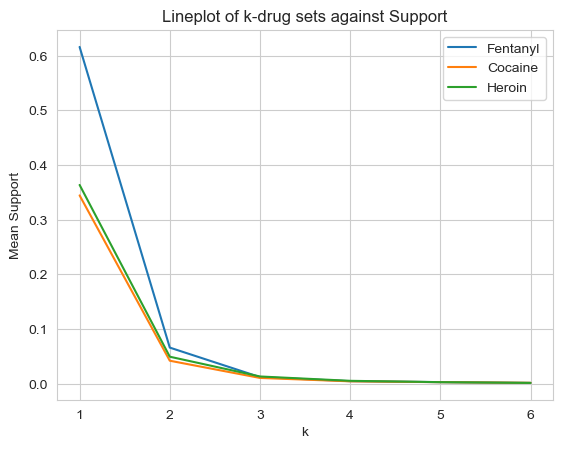

In [8]:
# Let's use the function on the drugs which have the highest support and we paid much attention to in D1.
drug_supp_plot(freq_drug_sets, ['Fentanyl', 'Cocaine', 'Heroin'])

In [9]:
# Here we have used our tools from frequent pattern mining to show the "hill-shaped" distribution we saw for each drug in
# deliverable 1(D1). As k/n increases, we have a sharp reduction in the support. Let's try to see this mathematically 
# through another interestingness measure we widely come across in D1 - Confidence

***Recall:***
$$conf(A \rightarrow B) = \frac{P(A, B)}{P(B)}$$

**Intepretation:** The measure of *confidence* shows the probability of itemset B being present given itemset A is present.

In [10]:
# Using association rule mining to get all rules with threshold > 0.1 for similar reasons as before

rules_drug_sets = association_rules(freq_drug_sets, metric = 'confidence', min_threshold = 0.1)
rules_drug_sets

antecedents  \
0                                             (Cocaine)   
1                                            (Fentanyl)   
2                                (Heroin/Morph/Codeine)   
3                                              (Heroin)   
4                                              (Heroin)   
...                                                 ...   
2105       (Ethanol, Benzodiazepine, Fentanyl Analogue)   
2106  (Heroin/Morph/Codeine, Benzodiazepine, Fentany...   
2107                         (Xylazine, Benzodiazepine)   
2108                             (Xylazine, Gabapentin)   
2109                       (Benzodiazepine, Gabapentin)   

                 consequents  antecedent support  consequent support  \
0                 (Fentanyl)            0.344599            0.616170   
1                  (Cocaine)            0.616170            0.344599   
2                   (Heroin)            0.212128            0.363725   
3     (Heroin/Morph/Codeine)            0.363725            0.212128   
4                 (Fentanyl)            0.363725            0.616170   
...                      ...                 ...                 ...   
2105  (Heroin/Morph/Codeine)            0.003695            0.212128   
2106               (Ethanol)            0.006955            0.268311   
2107            (Gabapentin)            0.009672            0.019778   
2108        (Benzodiazepine)            0.003586            0.243208   
2109              (Xylazine)            0.007172            0.047924   

       support  confidence      lift  leverage  conviction  
0     0.228537    0.663198  1.076322  0.016206    1.139629  
1     0.228537    0.370899  1.076322  0.016206    1.041806  
2     0.201261    0.948770  2.608481  0.124104   12.420083  
3     0.201261    0.553331  2.608481  0.124104    1.763885  
4     0.195392    0.537197  0.871833 -0.028724    0.829359  
...        ...         ...       ...       ...         ...  
2105  0.001087    0.294118  1.386512  0.000303    1.116152  
2106  0.001087    0.156250  0.582346 -0.000779    0.867187  
2107  0.001087    0.112360  5.680948  0.000895    1.104300  
2108  0.001087    0.303030  1.245972  0.000215    1.085832  
2109  0.001087    0.151515  3.161547  0.000743    1.122089  

[2110 rows x 9 columns]

In [11]:
# Let's plot the confidence of three most support-high drugs "Fentanyl, Heroin, Cocaine". Note for each of them, we will 
# check its relationship with k and the drugs will be in R.H.S.

# Note: The process is almost the same as before for support

def get_k_conf(name, df):
    k_list = []
    k_drugs = df['consequents'].apply(lambda x: len(x))
    for k in k_drugs:
        if k not in k_list:
            k_list.append(k) 
    return k_list

# returns the mean support for each k-itemset
def get_mean_conf(k_list, df):
    means = []
    for k in k_list:
        mask = df['consequents'].apply(lambda x: len(x) == k)
        means.append(df[mask]['confidence'].mean())
    return means
def drug_conf_plot(df, name_list, group = None, att = None):
    for drug_name in name_list:
        # Filter the freq_drug_sets to contain only those itemsets which have the drug name
        rules_drug_sets_filtered = df[df["antecedents"].apply(lambda x: drug_name in x)]
        # Get k and mean
        k_list = get_k_conf(drug_name, rules_drug_sets_filtered)
        mean_list = get_mean_conf(k_list, rules_drug_sets_filtered)
        
        # Use a different line style or color for each drug
        ax = sns.lineplot(x = k_list, y = mean_list, label = drug_name)
    if group != None:
        heading = f'Lineplot of k-drug sets against Confidence by {group} ({att})'
    else:
        heading = f'Lineplot of k-drug sets against Confidence'
    ax.set(title = heading, ylabel = 'Mean Confidence', xlabel = 'k')
    ax.legend()
    plt.show()

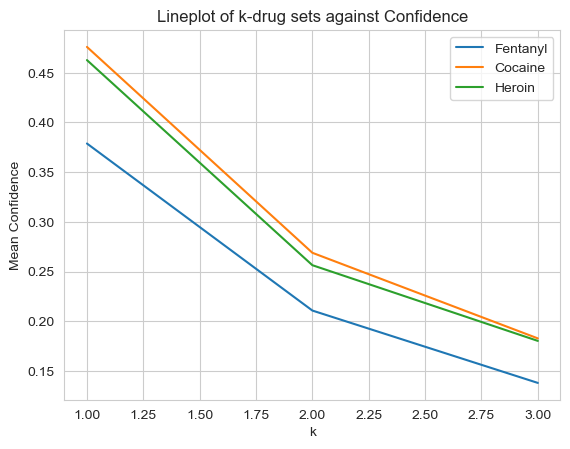

In [12]:
drug_conf_plot(rules_drug_sets, ['Fentanyl', 'Cocaine', 'Heroin'])

In [13]:
# From this plot, we have come to realise that things are not obvious as they seemed in D1. In D1, we inferred that the 
# confidence of ('Fentanyl --> k_drug_sets') was likely to be greater than that heroin and cocaine but at the same time
# decreasing with k due to the "hill-shaped" distribution. However, we see a different picture here. 

# Since we were concerned with plotting the indiviual mean_confidence of each drug with all their k-itemsets, we observe the 
# following:

# 1) Fentanyl though has the highest support occurs significantly less frequently with other itemsets. If we recall our
# graph of support above, we see that that Fentanyl had faced the sharpest decrease in the support compared to "Heroin"
# and cocaine. These two observation coupled prove that "Fentanyl" is more likely to be solely consumed and hence less 
# likely to affect joint-occurence of itemsets.

# 2) On the other hand, for heroin and cocaine, we observe that though, support is generally less than that of "Fentanyl",
# its more consistent in its combination with higher itemsets i.e. "Heroin" and "Cocaine" are more likely to appear 
# with increased k. 

In [14]:
# Now let's quickly see the above relationships grouped with Sex and Race, but first let's recall the "nafill" function
# specifically designed to replace missing values of a variable with a random category of its own

# Making a function which does the above mentioned technique
def nafill(attribute):
  categories = df[attribute].unique()[(df[attribute].unique() != -1)]
  df[attribute] = np.where(df[attribute] == -1, np.random.choice(categories), df[attribute])


In [15]:
# Adding Gender to tox_report
gend_tox = pd.concat([tox_report, df['Sex']], axis = 1)
gend_tox

Heroin  Cocaine  Fentanyl  Fentanyl Analogue  Oxycodone  Oxymorphone  \
0          0        1         0                  0          0            0   
1          1        0         0                  0          0            0   
2          1        0         0                  0          0            0   
3          1        0         0                  0          0            0   
4          0        0         1                  0          0            0   
...      ...      ...       ...                ...        ...          ...   
9197       0        1         0                  0          1            0   
9198       0        1         0                  0          0            0   
9199       0        1         0                  0          0            0   
9200       0        1         0                  0          0            0   
9201       0        0         1                  0          0            0   

      Ethanol  Hydrocodone  Benzodiazepine  Methadone  ...  \
0           0            0               0          0  ...   
1           0            0               0          0  ...   
2           0            0               0          0  ...   
3           0            0               0          0  ...   
4           0            0               0          0  ...   
...       ...          ...             ...        ...  ...   
9197        0            0               0          0  ...   
9198        1            0               0          0  ...   
9199        0            0               0          0  ...   
9200        0            0               0          0  ...   
9201        0            0               0          1  ...   

      Morphine (Not Heroin)  Xylazine  Gabapentin  Opiate NOS  \
0                         0         0           0           0   
1                         0         0           0           0   
2                         0         0           0           0   
3                         0         0           0           0   
4                         0         0           0           0   
...                     ...       ...         ...         ...   
9197                      0         0           0           0   
9198                      0         0           0           0   
9199                      0         0           1           0   
9200                      0         0           0           0   
9201                      0         1           0           0   

      Heroin/Morph/Codeine  Other Opioid  Any Opioid  Other  count     Sex  
0                        0             0           0      0      1    Male  
1                        0             0           0      0      1    Male  
2                        0             0           0      0      1    Male  
3                        0             0           0      0      1  Female  
4                        0             0           1      0      2    Male  
...                    ...           ...         ...    ...    ...     ...  
9197                     0             0           1      0      3    Male  
9198                     0             0           0      0      2    Male  
9199                     0             0           0      0      2    Male  
9200                     0             0           0      0      1    Male  
9201                     0             0           1      0      4    Male  

[9202 rows x 24 columns]

In [16]:
# Running our algorithm seperately for each categorical attribute where measure either is support or rules

def measure_by_group(attribute, df, uni_list, measure, get_list, mod_df = None):
    for uni in uni_list:
        # Getting filtered df
        if mod_df is None:
            df_filt = (df.loc[(df[attribute] == uni)]).iloc[:, :-5]
        else:
            df_filt = (mod_df.loc[(mod_df[attribute] == uni)]).iloc[:, :-1]
        # Depending on measure, getting support/rules
        fill_df = fpgrowth(df_filt, min_support = (0.00001/100), use_colnames = True)
        if measure == 'supp':
            drug_supp_plot(fill_df, get_list, attribute, uni)
        else: 
            fill_df = association_rules(fill_df, metric = 'confidence', min_threshold = 0.00001)
            drug_conf_plot(fill_df, get_list, attribute, uni)

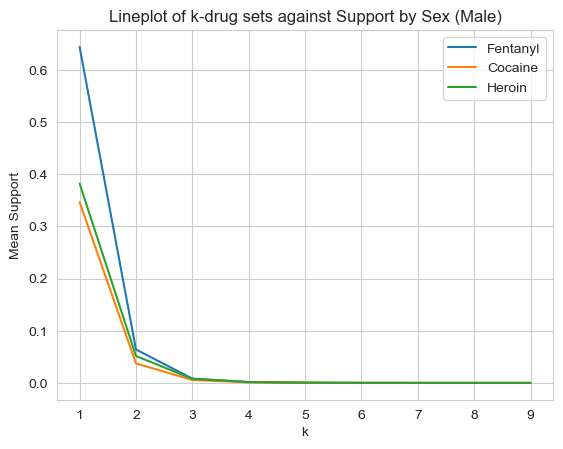

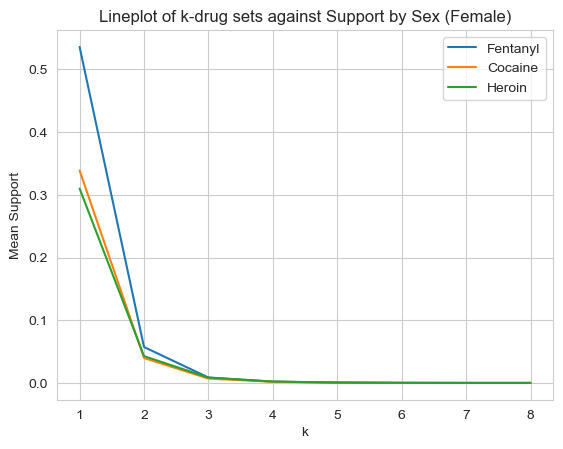

In [17]:
# Support by Sex
measure_by_group('Sex', gend_tox, df['Sex'].unique(), 'supp', ['Fentanyl', 'Cocaine', 'Heroin'])

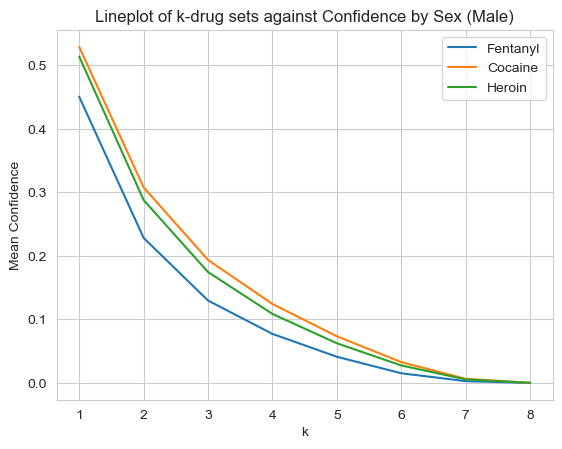

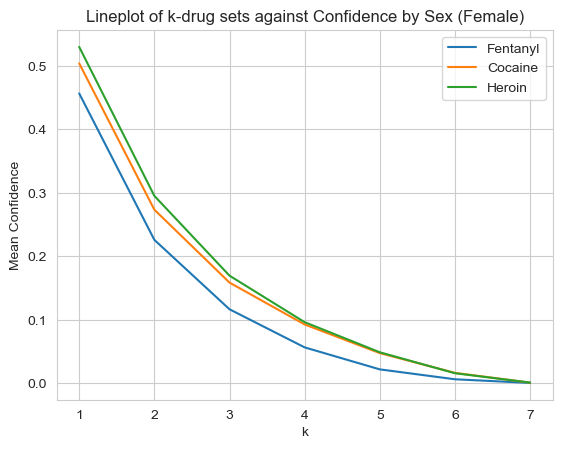

In [18]:
# Confidence by Sex
measure_by_group('Sex', gend_tox, df['Sex'].unique(), 'conf', ['Fentanyl', 'Cocaine', 'Heroin'])

In [19]:
# A quick glance will reveal that k-drug sets grouped by'Sex' also follows the "hill-shaped" distribution. 
# Moreover, we can easily infer that support of the three drugs is greater for males than that of females.

# However, interestingly, something that we didnt observe in D1, the support for cocaine, for both males and females are more or 
# less the same. From the confidence grouped plot, 

# we generally observe that conf(Gender --> k) decreases for both. Moreover, conf(Male --> k & Cocaine) > 
# conf(Female --> k & Heroin) suggesting that Heroin consumption seems to be much apparent in Females than Males

# Interestingly, we also observe that Fentanyl does not seem to be discriminating w.r.t to Sex in terms of confidence which
# implies that confidence effects itemsets equally for both male and female though supp(males) > supp(females)


In [20]:
# Now doing it for race with only relevant categories determined in D1 i.e. 'White', 'Black', 'Asian Indian',
# 'Black or African American'. Did not choose those involving less variation in n and/or had "Other" categegory. See D1.

race_unique = ['White', 'Black', 'Asian Indian', 'Black or African American']

# Adding race to our toxicity report with filtered race categories
race_tox = pd.concat([tox_report, df['Race']], axis = 1)
race_tox

Heroin  Cocaine  Fentanyl  Fentanyl Analogue  Oxycodone  Oxymorphone  \
0          0        1         0                  0          0            0   
1          1        0         0                  0          0            0   
2          1        0         0                  0          0            0   
3          1        0         0                  0          0            0   
4          0        0         1                  0          0            0   
...      ...      ...       ...                ...        ...          ...   
9197       0        1         0                  0          1            0   
9198       0        1         0                  0          0            0   
9199       0        1         0                  0          0            0   
9200       0        1         0                  0          0            0   
9201       0        0         1                  0          0            0   

      Ethanol  Hydrocodone  Benzodiazepine  Methadone  ...  \
0           0            0               0          0  ...   
1           0            0               0          0  ...   
2           0            0               0          0  ...   
3           0            0               0          0  ...   
4           0            0               0          0  ...   
...       ...          ...             ...        ...  ...   
9197        0            0               0          0  ...   
9198        1            0               0          0  ...   
9199        0            0               0          0  ...   
9200        0            0               0          0  ...   
9201        0            0               0          1  ...   

      Morphine (Not Heroin)  Xylazine  Gabapentin  Opiate NOS  \
0                         0         0           0           0   
1                         0         0           0           0   
2                         0         0           0           0   
3                         0         0           0           0   
4                         0         0           0           0   
...                     ...       ...         ...         ...   
9197                      0         0           0           0   
9198                      0         0           0           0   
9199                      0         0           1           0   
9200                      0         0           0           0   
9201                      0         1           0           0   

      Heroin/Morph/Codeine  Other Opioid  Any Opioid  Other  count  \
0                        0             0           0      0      1   
1                        0             0           0      0      1   
2                        0             0           0      0      1   
3                        0             0           0      0      1   
4                        0             0           1      0      2   
...                    ...           ...         ...    ...    ...   
9197                     0             0           1      0      3   
9198                     0             0           0      0      2   
9199                     0             0           0      0      2   
9200                     0             0           0      0      1   
9201                     0             0           1      0      4   

                           Race  
0                         Black  
1                         White  
2                         White  
3                         White  
4                         White  
...                         ...  
9197  Black or African American  
9198  Black or African American  
9199                      White  
9200  Black or African American  
9201                      White  

[9202 rows x 24 columns]

In [21]:
# Filtering:
race_tox = race_tox[race_tox['Race'].isin(race_unique)]
race_tox
# Barely 200 rows dropped. Goes to show that other categories dont hold that much weight

Heroin  Cocaine  Fentanyl  Fentanyl Analogue  Oxycodone  Oxymorphone  \
0          0        1         0                  0          0            0   
1          1        0         0                  0          0            0   
2          1        0         0                  0          0            0   
3          1        0         0                  0          0            0   
4          0        0         1                  0          0            0   
...      ...      ...       ...                ...        ...          ...   
9197       0        1         0                  0          1            0   
9198       0        1         0                  0          0            0   
9199       0        1         0                  0          0            0   
9200       0        1         0                  0          0            0   
9201       0        0         1                  0          0            0   

      Ethanol  Hydrocodone  Benzodiazepine  Methadone  ...  \
0           0            0               0          0  ...   
1           0            0               0          0  ...   
2           0            0               0          0  ...   
3           0            0               0          0  ...   
4           0            0               0          0  ...   
...       ...          ...             ...        ...  ...   
9197        0            0               0          0  ...   
9198        1            0               0          0  ...   
9199        0            0               0          0  ...   
9200        0            0               0          0  ...   
9201        0            0               0          1  ...   

      Morphine (Not Heroin)  Xylazine  Gabapentin  Opiate NOS  \
0                         0         0           0           0   
1                         0         0           0           0   
2                         0         0           0           0   
3                         0         0           0           0   
4                         0         0           0           0   
...                     ...       ...         ...         ...   
9197                      0         0           0           0   
9198                      0         0           0           0   
9199                      0         0           1           0   
9200                      0         0           0           0   
9201                      0         1           0           0   

      Heroin/Morph/Codeine  Other Opioid  Any Opioid  Other  count  \
0                        0             0           0      0      1   
1                        0             0           0      0      1   
2                        0             0           0      0      1   
3                        0             0           0      0      1   
4                        0             0           1      0      2   
...                    ...           ...         ...    ...    ...   
9197                     0             0           1      0      3   
9198                     0             0           0      0      2   
9199                     0             0           0      0      2   
9200                     0             0           0      0      1   
9201                     0             0           1      0      4   

                           Race  
0                         Black  
1                         White  
2                         White  
3                         White  
4                         White  
...                         ...  
9197  Black or African American  
9198  Black or African American  
9199                      White  
9200  Black or African American  
9201                      White  

[9065 rows x 24 columns]

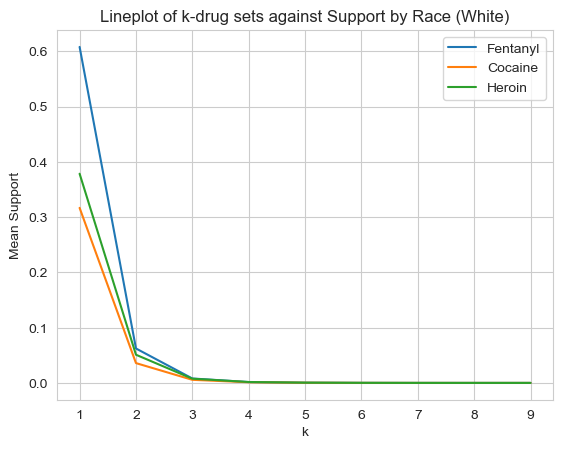

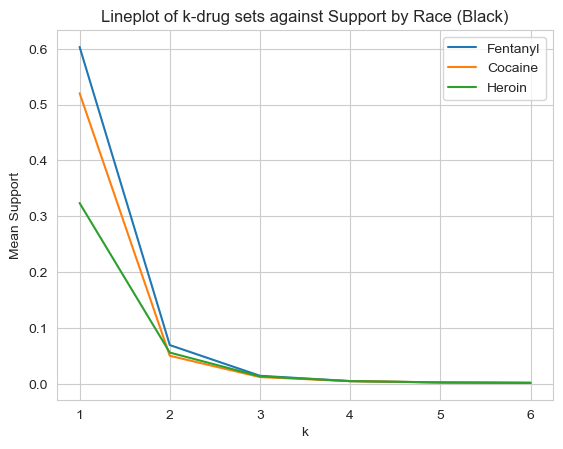

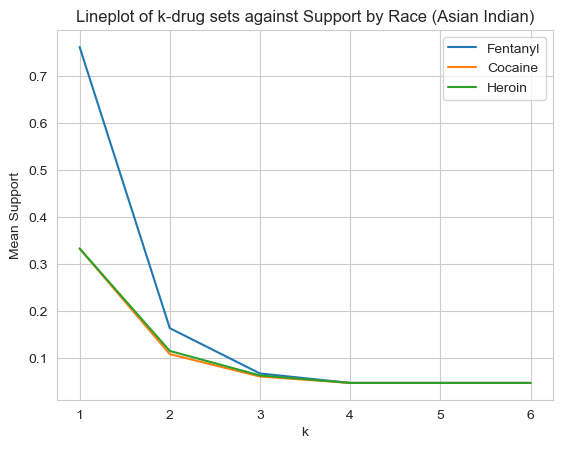

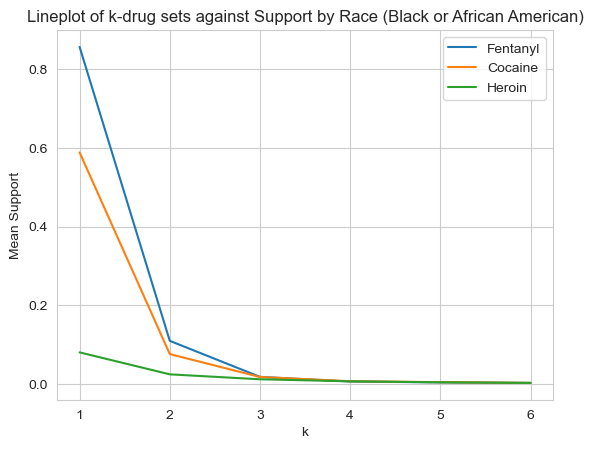

In [22]:
# Now visualise the supports
measure_by_group('Race', race_tox, race_unique, 'supp', ['Fentanyl', 'Cocaine', 'Heroin'])

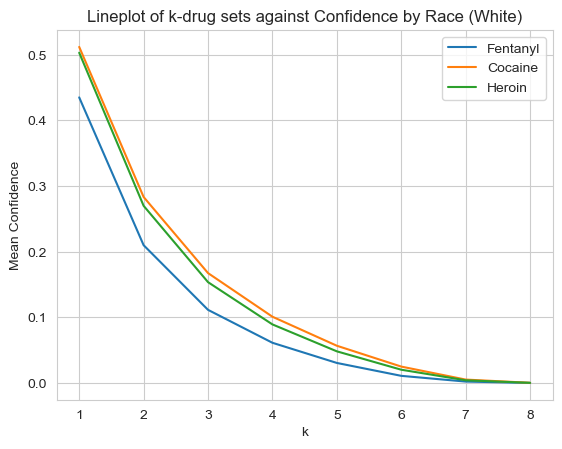

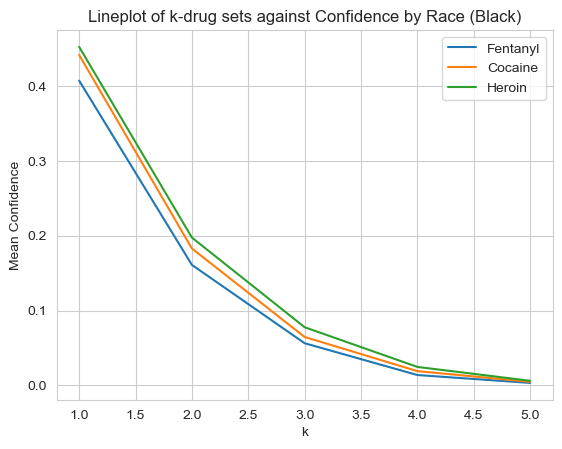

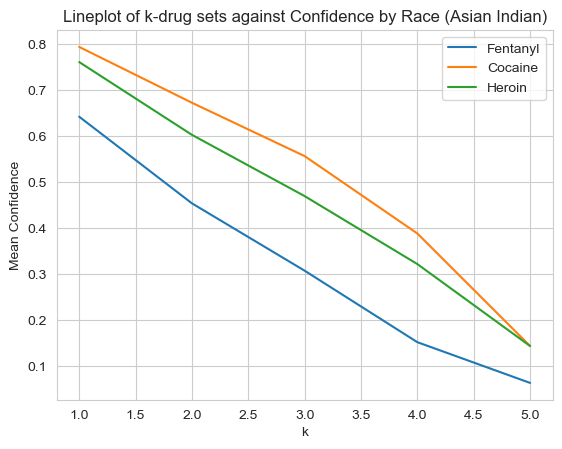

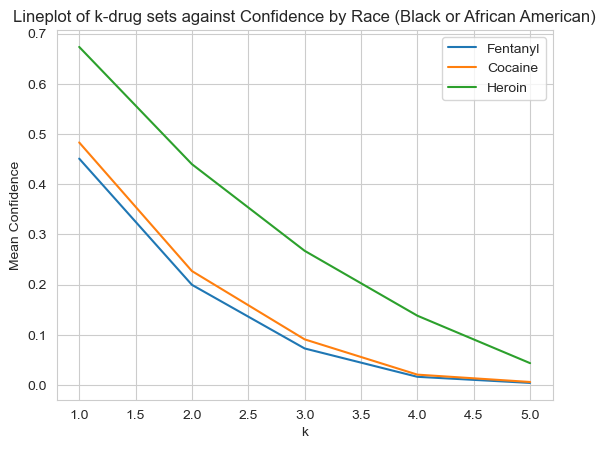

In [23]:
# Now visualise the confidence
measure_by_group('Race', race_tox, race_unique, 'conf', ['Fentanyl', 'Cocaine', 'Heroin'])

In [24]:
# From the supports, we can quickly confirm the hill-shaped dist for both support and confidence. We observe that 
# that Fentanyl more or less follows the same trajectory but for some its shifted. 

# Interestingly, we see that support for Fentanyl reaches a whopping 0.8 (highest) in 'Black or African American', 
# followed by around 0.75 for 'Asian Indian'. For cocaine, heroin there seems to be uncertainty regarding its trajectory in each of the 4 categories, 
# with heroin reaching its lowest for 'Black or African American' and highest for 'White'

# One might also be led to observe that, where we see a high support of fentanyl, we see lesser support for cocaine 
# and heroin. For some, this might have been obvious with the frequency plot in D1 however, seeing this support plot, we 
# might also claim that Fentanyl and Heroin have an inverse relationship. The category 'Black or African American' saw the
# peak of fentanyl consumption and consequently the lowest decline of Heroin.


# This leads us to believe contradictory to what was claimed earlier in D1. 

# We had claimed that conf(n --> White) > conf(n --> Black) > conf(n --> a_i) where a_i denotes all other race categories
# However, we observe somewhat the opposite. For large k, support is greater if not equal for Fentanyl and Cocaine 
# in the case of 'BAA'. Consequently, looking at the confidence plots, we again, though seeing uncertainty in 
# cocaine its confidence is greater than that of the rest. Similarly can be said for Heroin.

In [25]:
# Next on our agenda was trying to back up the fact that many of the drugs are uncorrelated with each other, if not neglibly
# negatively correlated (of the order 10^-2). We will be making use of interestingness measures like lift. 

***Recall:***
$$Lift(A, B) = \frac{P(A, B)}{{P(A)P(B)}}$$

**Intepretation:** If $Lift$ is $\approx$ 1 then highly uncorrelated else correlated. This is due to the fact that any two independant events $A, B$ are independant if and only if $P(A,B) = P(A)P(B)$ $\rightarrow$ $A, B$ are uncorrelated.ed If its greater than 1, then positively correlated and if less than 1 then negatively correlated. 

On the other hand, the interestingness measure lift captures such as correlation in the sense that it tells us whether the LHS influences the RHS positively or negatively. Therefore, using Lift instead of confidence as a criteria for discovering association rules can be more effective.

<AxesSubplot: >

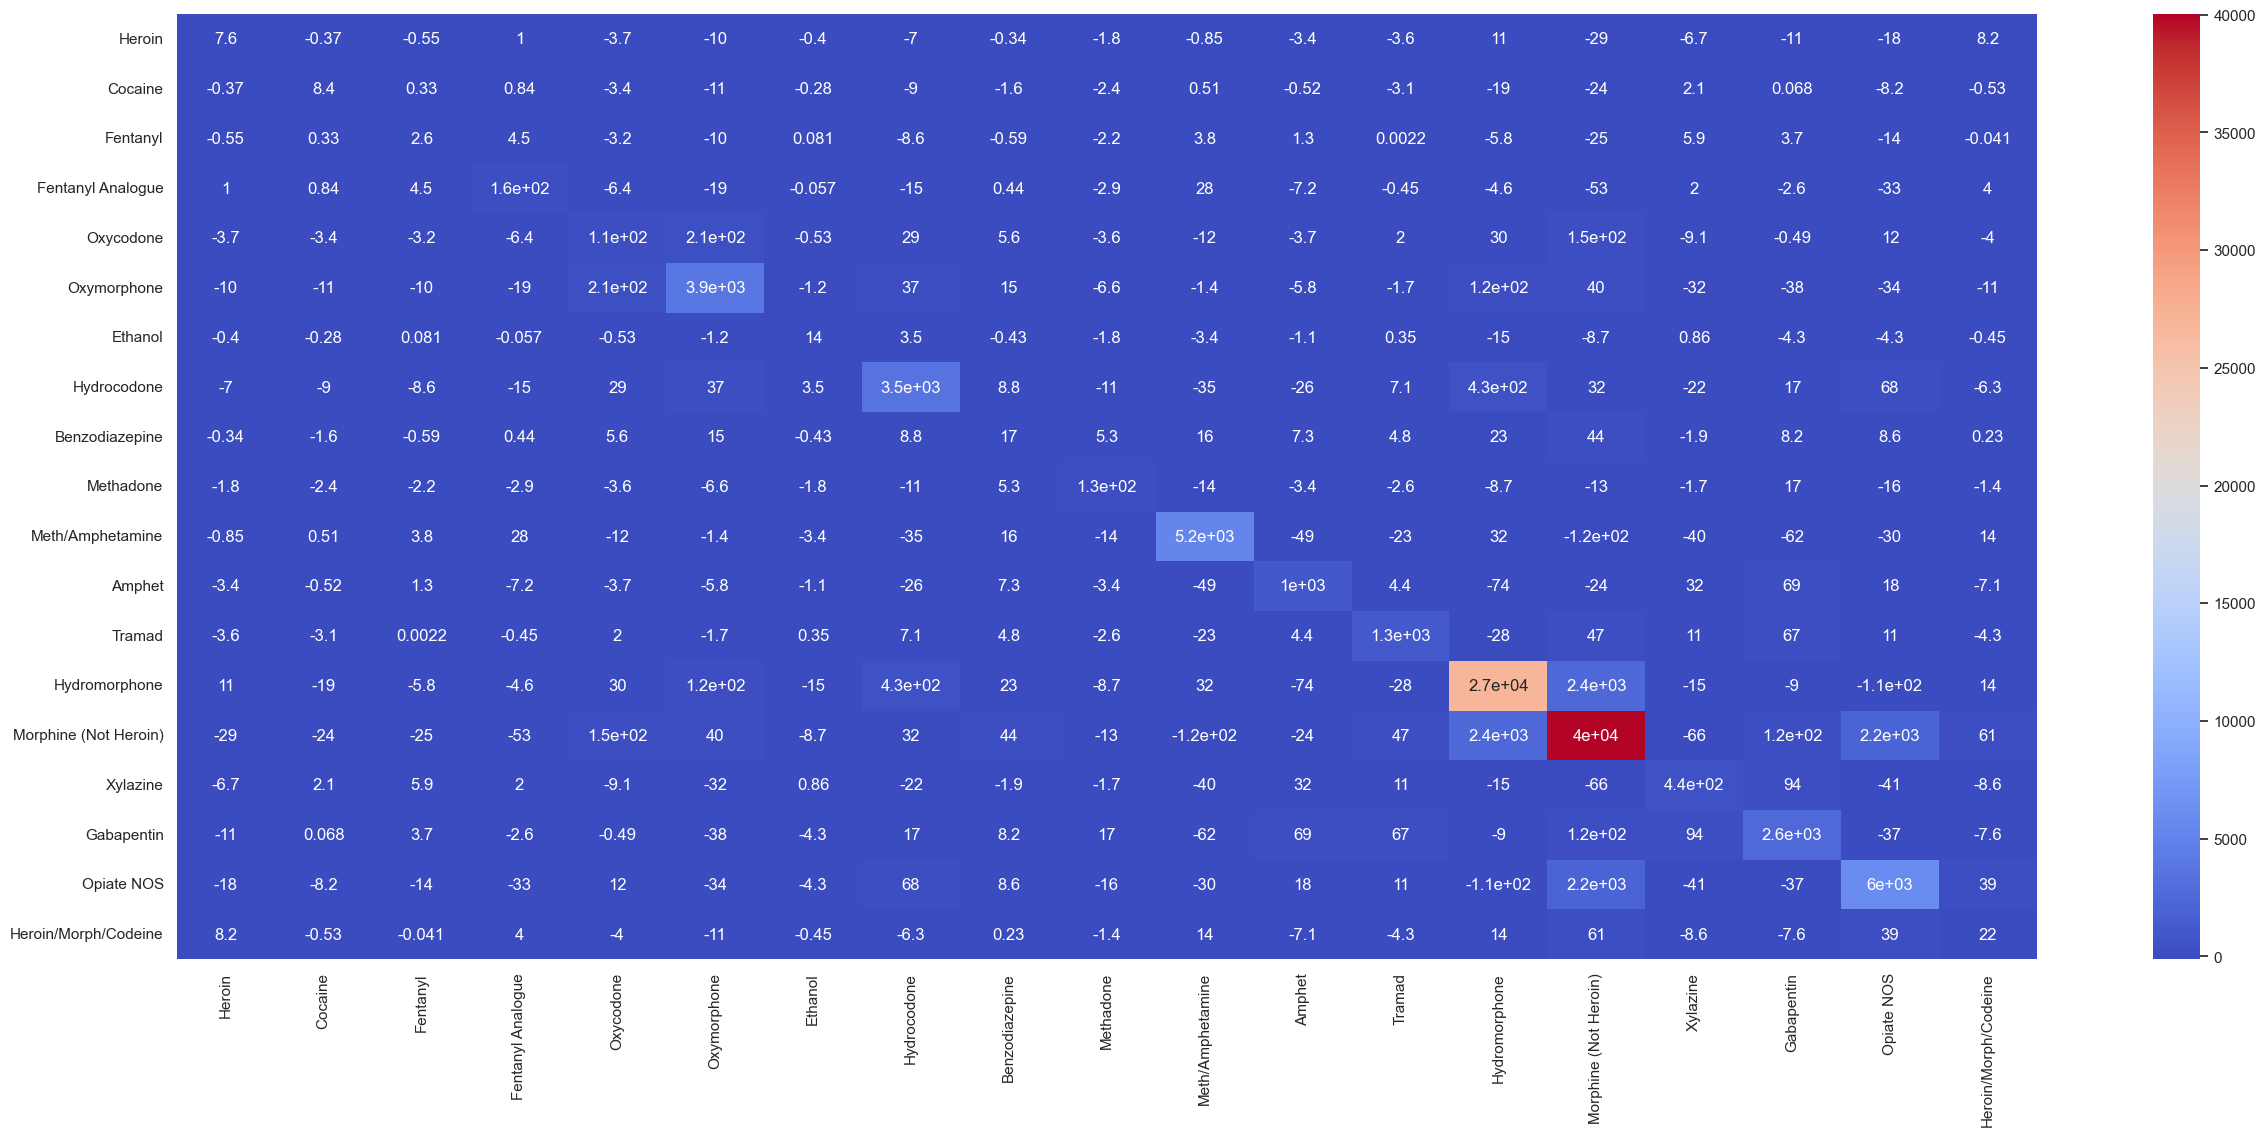

In [26]:
# For this we will be making use of the fact that the mean of each drug column is actually the support due to it being in
# the ECLAT format. 

sns.set(rc={'figure.figsize':(30,12.27)})

support = tox_report.iloc[:, :-4].mean()

# Calculate the support of each pair of drugs
support_pairs = tox_report.iloc[:, :-4].corr()

# Calculate the Lift of each pair of drugs
lift = support_pairs / (support.values.reshape(-1, 1) * support.values)

# Highliting those with Lift == 1
mask = np.isclose(lift, 1, atol=0.01)

# Visualize the matrix as a heatmap
sns.heatmap(lift, annot = True, cmap = 'coolwarm', mask = mask)

In [27]:
# We suprisingly see that many of the attributes are infact not having 0 lift with each other but rather theres a mixture
# of negatively/positive effecting the other drug. This implies that we should not attribute low/high correlation to
# correspondigly low/high lift score.

# It is possible to have a situation where two variables have low or zero correlation, but still have a 
# strong association in terms of their co-occurrence, which is what Lift measures. Correlation measures the linear 
# relationship between two variables, while Lift measures the strength of association between two variables in terms 
# of their co-occurrence or joint distribution, i.e. the distribution of the itemsets. 

# Therefore, it is important to consider both the correlation and Lift measures together when analyzing associations 
# between variables. A low correlation does not necessarily imply a low association, and a high correlation does 
# not necessarily imply a high association, in terms of co-occurrence or joint distribution. 

# With regards to these caveats, we conclude that the the low correlation implies that are not related to each other 
# in the intrinsic sense however they may have a higher lift score specifying that both are jointly cosumed nontheless. 
# For e.g consider Methadone and Oxymorphone. Their correlation is -0.00094 approximately 0. However, 
# Lift(Methadone, Oxymorphene) is -6.6 < 1 showing that Methadone negatively affects its joint occurence with 
# Oxymorphene and so on

# However, there a few small noticable results. Consider Lift(Fentanyl Analogue, Heroin) == 1. This shows that per
# the principle of independancy, that both are independant of each other and hence uncorrelated with each other. Here
# we can safely imply one from the other but not the converse. This can also be seen in the correlation heatmap in D1,
# where their correlation is nearly 0.

In [28]:
# Let's explore 'Cause of Death', 'Manner of Death. Recall that we had deduced that 'Manner of Death' is not of 
# particular interest due to it belonging to the category "Accident" 97-98% of the time. On the other hand, we had our 
# hands full with exploring 'Cause of Death'. We had filtered the 'Cause of Death' to categories "AFI, MDT, HI, AHI" which 
# seemingly had the most influence among other 6000 or so categories. 

# Before, we start off with their frequent pattern mining and association rule mining, let's qucilkly import our tox_report
# filtered with these categories from D1.

causedeath_tox = pd.read_csv('cause.csv', index_col = False)
causedeath_tox

Unnamed: 0  Heroin  Cocaine  Fentanyl  Fentanyl Analogue  Oxycodone  \
0             2       1        0         0                  0          0   
1             3       1        0         0                  0          0   
2             4       0        0         1                  0          0   
3             9       1        0         0                  0          0   
4            10       0        0         1                  0          0   
..          ...     ...      ...       ...                ...        ...   
793        9027       0        0         1                  0          0   
794        9046       0        0         1                  0          0   
795        9140       0        1         1                  0          0   
796        9185       0        0         1                  0          0   
797        9190       0        0         1                  0          0   

     Oxymorphone  Ethanol  Hydrocodone  Benzodiazepine  ...  \
0              0        0            0               0  ...   
1              0        0            0               0  ...   
2              0        0            0               0  ...   
3              0        0            0               0  ...   
4              0        0            0               0  ...   
..           ...      ...          ...             ...  ...   
793            0        0            0               0  ...   
794            0        0            0               0  ...   
795            0        0            0               0  ...   
796            0        0            0               0  ...   
797            0        0            0               0  ...   

     Morphine (Not Heroin)  Xylazine  Gabapentin  Opiate NOS  \
0                        0         0           0           0   
1                        0         0           0           0   
2                        0         0           0           0   
3                        0         0           0           0   
4                        0         0           0           0   
..                     ...       ...         ...         ...   
793                      0         0           0           0   
794                      0         0           0           0   
795                      0         0           0           0   
796                      0         0           0           0   
797                      0         0           0           0   

     Heroin/Morph/Codeine  Other Opioid  Any Opioid  Other  count  \
0                       0             0           0      0      1   
1                       0             0           0      0      1   
2                       0             0           1      0      2   
3                       0             0           0      0      1   
4                       0             0           0      0      1   
..                    ...           ...         ...    ...    ...   
793                     0             0           1      0      2   
794                     0             0           1      0      2   
795                     0             0           1      0      3   
796                     0             0           1      0      2   
797                     0             0           1      0      2   

                  Cause of Death  
0            Heroin Intoxication  
1      Acute Heroin Intoxication  
2    Acute Fentanyl Intoxication  
3            Heroin Intoxication  
4    Acute Fentanyl Intoxication  
..                           ...  
793  Acute Fentanyl Intoxication  
794  Acute Fentanyl Intoxication  
795  Acute Fentanyl Intoxication  
796  Acute Fentanyl Intoxication  
797  Acute Fentanyl Intoxication  

[798 rows x 25 columns]

In [29]:
# Now we will be converting this into ECLAT with the addition of the 'Cause of Death'. 

for uni in causedeath_tox['Cause of Death'].unique():
    causedeath_tox[uni] = np.where(causedeath_tox['Cause of Death'] == uni, 1, 0)
causedeath_tox

Unnamed: 0  Heroin  Cocaine  Fentanyl  Fentanyl Analogue  Oxycodone  \
0             2       1        0         0                  0          0   
1             3       1        0         0                  0          0   
2             4       0        0         1                  0          0   
3             9       1        0         0                  0          0   
4            10       0        0         1                  0          0   
..          ...     ...      ...       ...                ...        ...   
793        9027       0        0         1                  0          0   
794        9046       0        0         1                  0          0   
795        9140       0        1         1                  0          0   
796        9185       0        0         1                  0          0   
797        9190       0        0         1                  0          0   

     Oxymorphone  Ethanol  Hydrocodone  Benzodiazepine  ...  \
0              0        0            0               0  ...   
1              0        0            0               0  ...   
2              0        0            0               0  ...   
3              0        0            0               0  ...   
4              0        0            0               0  ...   
..           ...      ...          ...             ...  ...   
793            0        0            0               0  ...   
794            0        0            0               0  ...   
795            0        0            0               0  ...   
796            0        0            0               0  ...   
797            0        0            0               0  ...   

     Heroin/Morph/Codeine  Other Opioid  Any Opioid  Other  count  \
0                       0             0           0      0      1   
1                       0             0           0      0      1   
2                       0             0           1      0      2   
3                       0             0           0      0      1   
4                       0             0           0      0      1   
..                    ...           ...         ...    ...    ...   
793                     0             0           1      0      2   
794                     0             0           1      0      2   
795                     0             0           1      0      3   
796                     0             0           1      0      2   
797                     0             0           1      0      2   

                  Cause of Death  Heroin Intoxication  \
0            Heroin Intoxication                    1   
1      Acute Heroin Intoxication                    0   
2    Acute Fentanyl Intoxication                    0   
3            Heroin Intoxication                    1   
4    Acute Fentanyl Intoxication                    0   
..                           ...                  ...   
793  Acute Fentanyl Intoxication                    0   
794  Acute Fentanyl Intoxication                    0   
795  Acute Fentanyl Intoxication                    0   
796  Acute Fentanyl Intoxication                    0   
797  Acute Fentanyl Intoxication                    0   

     Acute Heroin Intoxication  Acute Fentanyl Intoxication  \
0                            0                            0   
1                            1                            0   
2                            0                            1   
3                            0                            0   
4                            0                            1   
..                         ...                          ...   
793                          0                            1   
794                          0                            1   
795                          0                            1   
796                          0                            1   
797                          0                            1   

     Multiple Drug Toxicity  
0                         0  
1   

In [30]:
# Dropping unncessary columns:
cause_tox = causedeath_tox.copy()
cause_tox.drop(['Unnamed: 0', 'Other Opioid', 'Any Opioid', 'Other', 'count', 'Cause of Death'], axis = 1, inplace = True)
cause_tox

Heroin  Cocaine  Fentanyl  Fentanyl Analogue  Oxycodone  Oxymorphone  \
0         1        0         0                  0          0            0   
1         1        0         0                  0          0            0   
2         0        0         1                  0          0            0   
3         1        0         0                  0          0            0   
4         0        0         1                  0          0            0   
..      ...      ...       ...                ...        ...          ...   
793       0        0         1                  0          0            0   
794       0        0         1                  0          0            0   
795       0        1         1                  0          0            0   
796       0        0         1                  0          0            0   
797       0        0         1                  0          0            0   

     Ethanol  Hydrocodone  Benzodiazepine  Methadone  ...  Hydromorphone  \
0          0            0               0          0  ...              0   
1          0            0               0          0  ...              0   
2          0            0               0          0  ...              0   
3          0            0               0          0  ...              0   
4          0            0               0          0  ...              0   
..       ...          ...             ...        ...  ...            ...   
793        0            0               0          0  ...              0   
794        0            0               0          0  ...              0   
795        0            0               0          0  ...              0   
796        0            0               0          0  ...              0   
797        0            0               0          0  ...              0   

     Morphine (Not Heroin)  Xylazine  Gabapentin  Opiate NOS  \
0                        0         0           0           0   
1                        0         0           0           0   
2                        0         0           0           0   
3                        0         0           0           0   
4                        0         0           0           0   
..                     ...       ...         ...         ...   
793                      0         0           0           0   
794                      0         0           0           0   
795                      0         0           0           0   
796                      0         0           0           0   
797                      0         0           0           0   

     Heroin/Morph/Codeine  Heroin Intoxication  Acute Heroin Intoxication  \
0                       0                    1                          0   
1                       0                    0                          1   
2                       0                    0                          0   
3                       0                    1                          0   
4                       0                    0                          0   
..                    ...                  ...                        ...   
793                     0                    0                          0   
794                     0                    0                          0   
795                     0                    0                          0   
796                     0                    0                          0   
797                     0                    0                          0   

     Acute Fentanyl Intoxication  Multiple Drug Toxicity  
0                              0                       0  
1                              0                       0  
2                              1                       0  
3                              0                       0  
4                              1                       0  
..                           ...                     ...  
793                            1                       0  
7

In [31]:
# Now let's get the frequent itemsets with the minimum possible support since for now we don't care about the minimum
# support rather how they behave with k

freq_causedrug_sets = fpgrowth(cause_tox, min_support = (0.01/100), use_colnames = True)
freq_causedrug_sets.sort_values('support', ascending = False)
freq_causedrug_sets

support                                           itemsets
0    0.384712                                           (Heroin)
1    0.162907                              (Heroin Intoxication)
2    0.151629                        (Acute Heroin Intoxication)
3    0.526316                                         (Fentanyl)
4    0.521303                      (Acute Fentanyl Intoxication)
..        ...                                                ...
247  0.001253        (Oxycodone, Amphet, Multiple Drug Toxicity)
248  0.001253   (Oxycodone, Amphet, Benzodiazepine, Oxymorphone)
249  0.001253  (Oxycodone, Amphet, Multiple Drug Toxicity, Ox...
250  0.001253  (Oxycodone, Amphet, Multiple Drug Toxicity, Be...
251  0.001253  (Oxycodone, Oxymorphone, Multiple Drug Toxicit...

[252 rows x 2 columns]

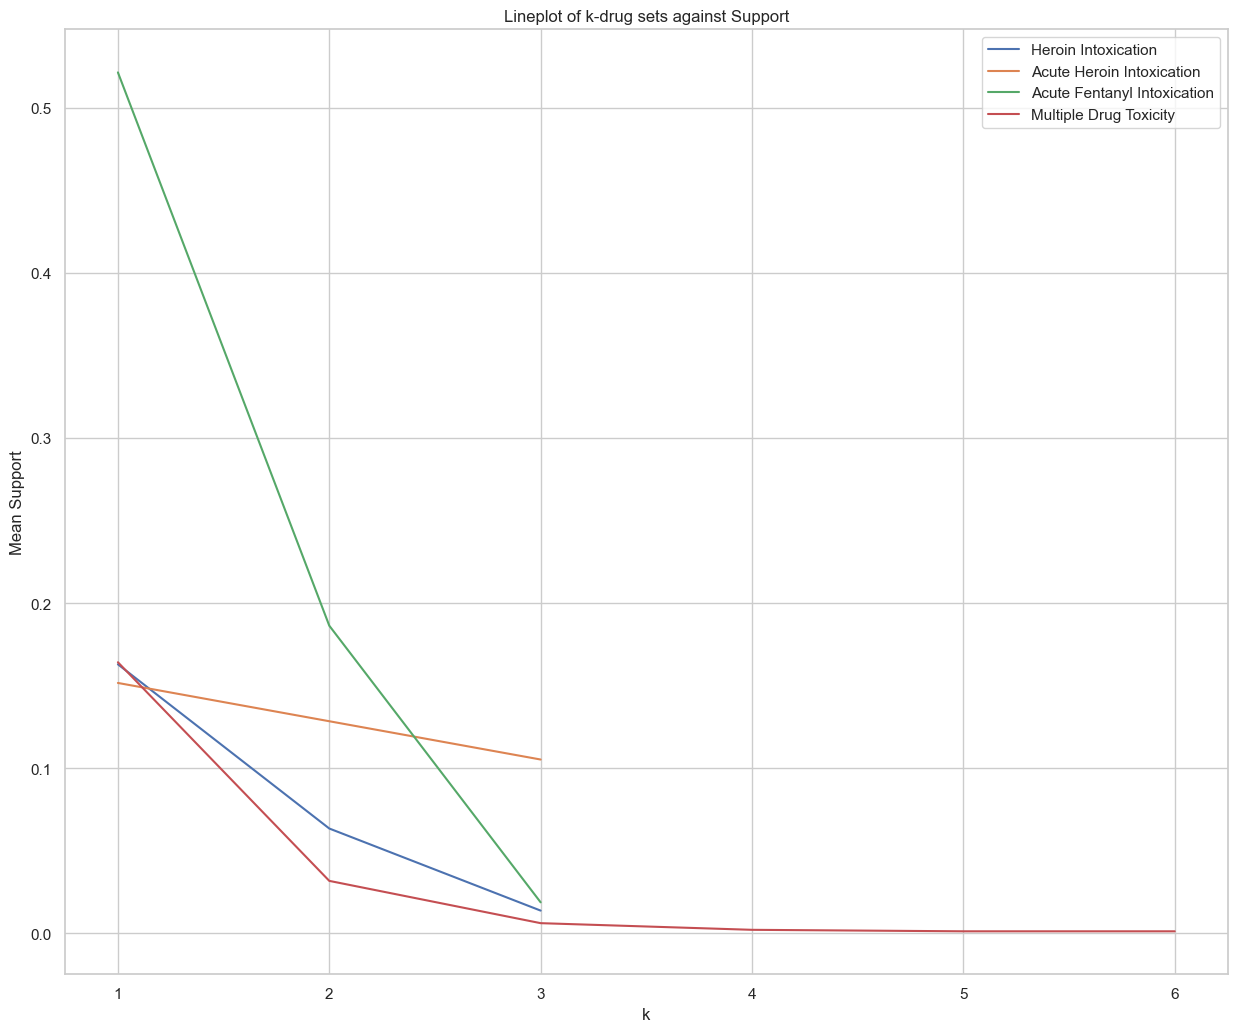

In [33]:
# Previously in D1, we simply had observed how frequency of each cause of death category with n. One of our insights was 
# was conf(AHI --> n) > conf(HI --> n) and conf(MDT --> n) > conf(AHI --> n) for large n. Here, not only we will be able
# to test out these claims but rather use the tools frequent patter mining provides us with and really dive deep into 
# what drugs are really causing the type of death we see through confidence, lift, support and its behaviour with k.

sns.set(rc={'figure.figsize':(15,12.27)})

# Let's start by simply observing the 4 categories indiviually their support and confidence
drug_supp_plot(freq_causedrug_sets, list(cause_tox.columns[-4:]))

In [34]:
# Let's get the association rules w.r.t to confidence. Again similar reason for why the threshold is what it is
rules_causedrug_sets = association_rules(freq_causedrug_sets, metric = 'confidence', min_threshold = 0.001)
rules_causedrug_sets

antecedents  \
0                        (Heroin)   
1                      (Fentanyl)   
2                        (Heroin)   
3           (Heroin Intoxication)   
4     (Acute Heroin Intoxication)   
...                           ...   
2047                  (Oxycodone)   
2048                (Oxymorphone)   
2049     (Multiple Drug Toxicity)   
2050             (Benzodiazepine)   
2051                     (Amphet)   

                                            consequents  antecedent support  \
0                                            (Fentanyl)            0.384712   
1                                              (Heroin)            0.526316   
2                                 (Heroin Intoxication)            0.384712   
3                                              (Heroin)            0.162907   
4                                              (Heroin)            0.151629   
...                                                 ...                 ...   
2047  (Oxymorphone, Amphet, Multiple Drug Toxicity, ...            0.050125   
2048  (Oxycodone, Amphet, Multiple Drug Toxicity, Be...            0.023810   
2049   (Oxycodone, Oxymorphone, Benzodiazepine, Amphet)            0.164160   
2050  (Oxycodone, Oxymorphone, Multiple Drug Toxicit...            0.057644   
2051  (Oxycodone, Oxymorphone, Multiple Drug Toxicit...            0.006266   

      consequent support   support  confidence       lift  leverage  \
0               0.526316  0.001253    0.003257   0.006189 -0.201227   
1               0.384712  0.001253    0.002381   0.006189 -0.201227   
2               0.162907  0.162907    0.423453   2.599349  0.100235   
3               0.384712  0.162907    1.000000   2.599349  0.100235   
4               0.384712  0.151629    1.000000   2.599349  0.093296   
...                  ...       ...         ...        ...       ...   
2047            0.001253  0.001253    0.025000  19.950000  0.001190   
2048            0.001253  0.001253    0.052632  42.000000  0.001223   
2049            0.001253  0.001253    0.007634   6.091603  0.001047   
2050            0.001253  0.001253    0.021739  17.347826  0.001181   
2051            0.013784  0.001253    0.200000  14.509091  0.001167   

      conviction  
0       0.475232  
1       0.616757  
2       1.451907  
3            inf  
4            inf  
...          ...  
2047    1.024356  
2048    1.054233  
2049    1.006430  
2050    1.020941  
2051    1.232769  

[2052 rows x 9 columns]

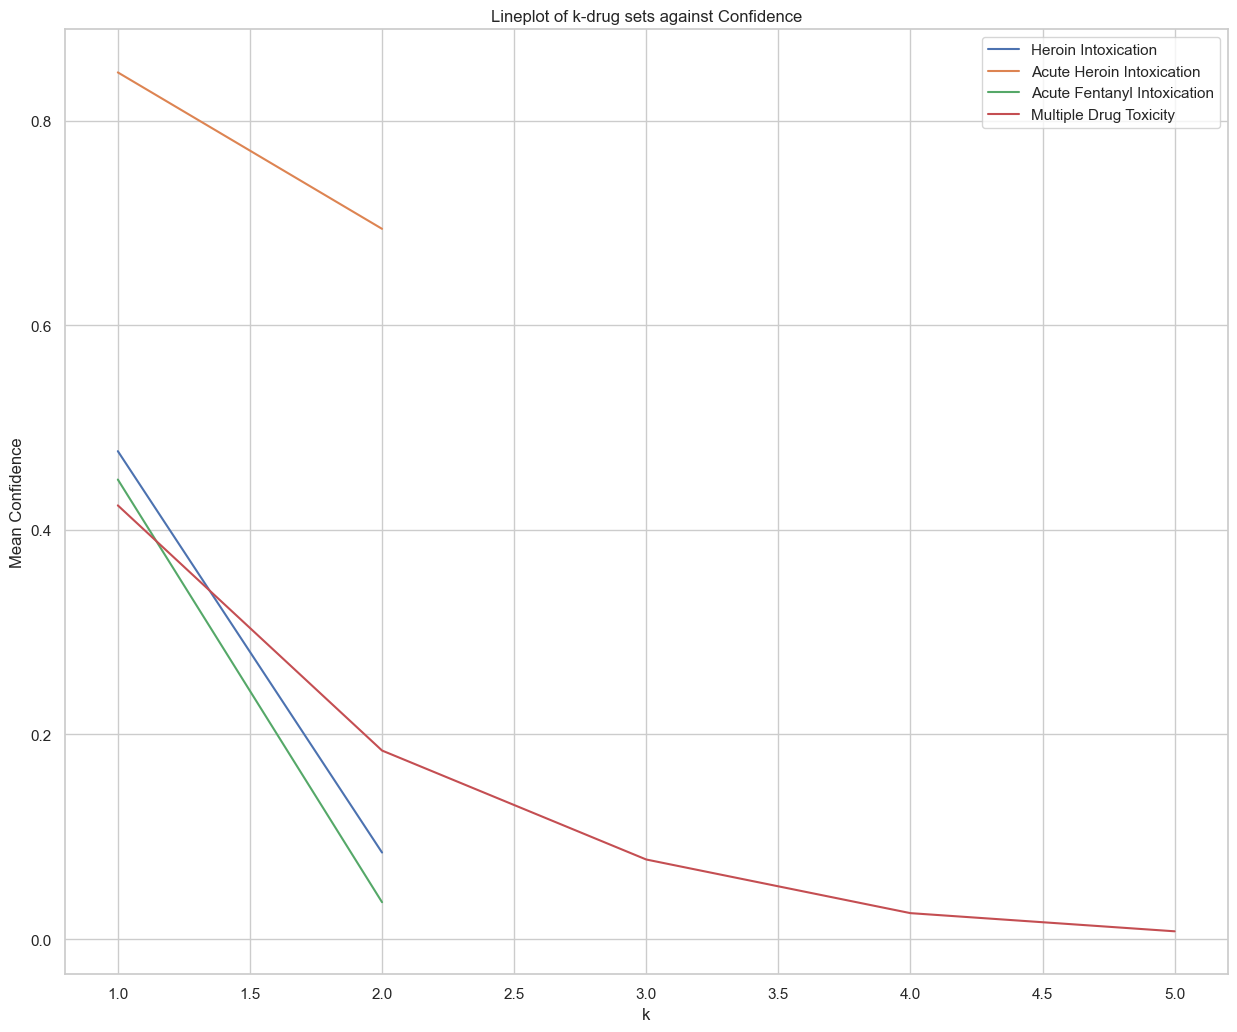

In [35]:
# Visualisation
drug_conf_plot(rules_causedrug_sets, list(cause_tox.columns[-4:]))

In [36]:
# A quick glance at the confidence plot shows that indeed conf(AHI --> n) > conf(HI --> n) for all k. In fact, its power 
# when it comes to joint occurence with drugs for small drugs overtakes even the high support AFI but for small k. This
# suggests its strong influence in such areas which we werent able to correctly observe in D1 when we dismissed it for 
# not having a significant support as can be seen in the support visualisation. However, its great that we were able to 
# finally see both sides and extract a new insight.

# Nonethless, seeing the support graph, as seen in D1, MDT and AFI stand out signifcantly than the rest. For AFI, we see 
# the familiar result that its support is siginificantly higher than the rest but we see its "longeivty" is not that 
# high (non-existent after k = 3). On the other hand, MDT though relatively less support compared to AHI and HI, its 
# longevity is considerably greater than the rest (lasting till k = 6). 

# This proves the fact that for small n, we have AFI as the "criminal" but for large n we see that MDT is the only viable
# option. Consequently, we observe from the confidence plot that conf(MDT --> k) > conf(AFI --> k) for almost all k
# (except for k = 1). This may have seen obvious from the name "Multiple.." however empirically observation wass neccessary
# nontheless

# Cocaine though we see its somewhat relatively greater support than MDT and greater confidence than AFI, it doesnt seem 
# to hold much interesting insights besides what we observe. 

# On the basis of these observations lets move forward with how the newly filtered categories i.e "MDT, AFI, AHI", let's 
# observe how our classic trio of "Fentanyl, Cocaine, Heroin" behave under such groups. Doing so will give us never seen 
# before of what drug really is behind such type of deaths and at what stage does one take precedence over the other.

# Let's make use of our dataframe causedeath_tox and remove unncessary columns
causedeath_tox.drop(causedeath_tox.columns[-4:], axis = 1, inplace = True)
causedeath_tox.drop(['Unnamed: 0'], axis = 1, inplace = True)
causedeath_tox

Heroin  Cocaine  Fentanyl  Fentanyl Analogue  Oxycodone  Oxymorphone  \
0         1        0         0                  0          0            0   
1         1        0         0                  0          0            0   
2         0        0         1                  0          0            0   
3         1        0         0                  0          0            0   
4         0        0         1                  0          0            0   
..      ...      ...       ...                ...        ...          ...   
793       0        0         1                  0          0            0   
794       0        0         1                  0          0            0   
795       0        1         1                  0          0            0   
796       0        0         1                  0          0            0   
797       0        0         1                  0          0            0   

     Ethanol  Hydrocodone  Benzodiazepine  Methadone  ...  \
0          0            0               0          0  ...   
1          0            0               0          0  ...   
2          0            0               0          0  ...   
3          0            0               0          0  ...   
4          0            0               0          0  ...   
..       ...          ...             ...        ...  ...   
793        0            0               0          0  ...   
794        0            0               0          0  ...   
795        0            0               0          0  ...   
796        0            0               0          0  ...   
797        0            0               0          0  ...   

     Morphine (Not Heroin)  Xylazine  Gabapentin  Opiate NOS  \
0                        0         0           0           0   
1                        0         0           0           0   
2                        0         0           0           0   
3                        0         0           0           0   
4                        0         0           0           0   
..                     ...       ...         ...         ...   
793                      0         0           0           0   
794                      0         0           0           0   
795                      0         0           0           0   
796                      0         0           0           0   
797                      0         0           0           0   

     Heroin/Morph/Codeine  Other Opioid  Any Opioid  Other  count  \
0                       0             0           0      0      1   
1                       0             0           0      0      1   
2                       0             0           1      0      2   
3                       0             0           0      0      1   
4                       0             0           0      0      1   
..                    ...           ...         ...    ...    ...   
793                     0             0           1      0      2   
794                     0             0           1      0      2   
795                     0             0           1      0      3   
796                     0             0           1      0      2   
797                     0             0           1      0      2   

                  Cause of Death  
0            Heroin Intoxication  
1      Acute Heroin Intoxication  
2    Acute Fentanyl Intoxication  
3            Heroin Intoxication  
4    Acute Fentanyl Intoxication  
..                           ...  
793  Acute Fentanyl Intoxication  
794  Acute Fentanyl Intoxication  
795  Acute Fentanyl Intoxication  
796  Acute Fentanyl Intoxication  
797  Acute Fentanyl Intoxication  

[798 rows x 24 columns]

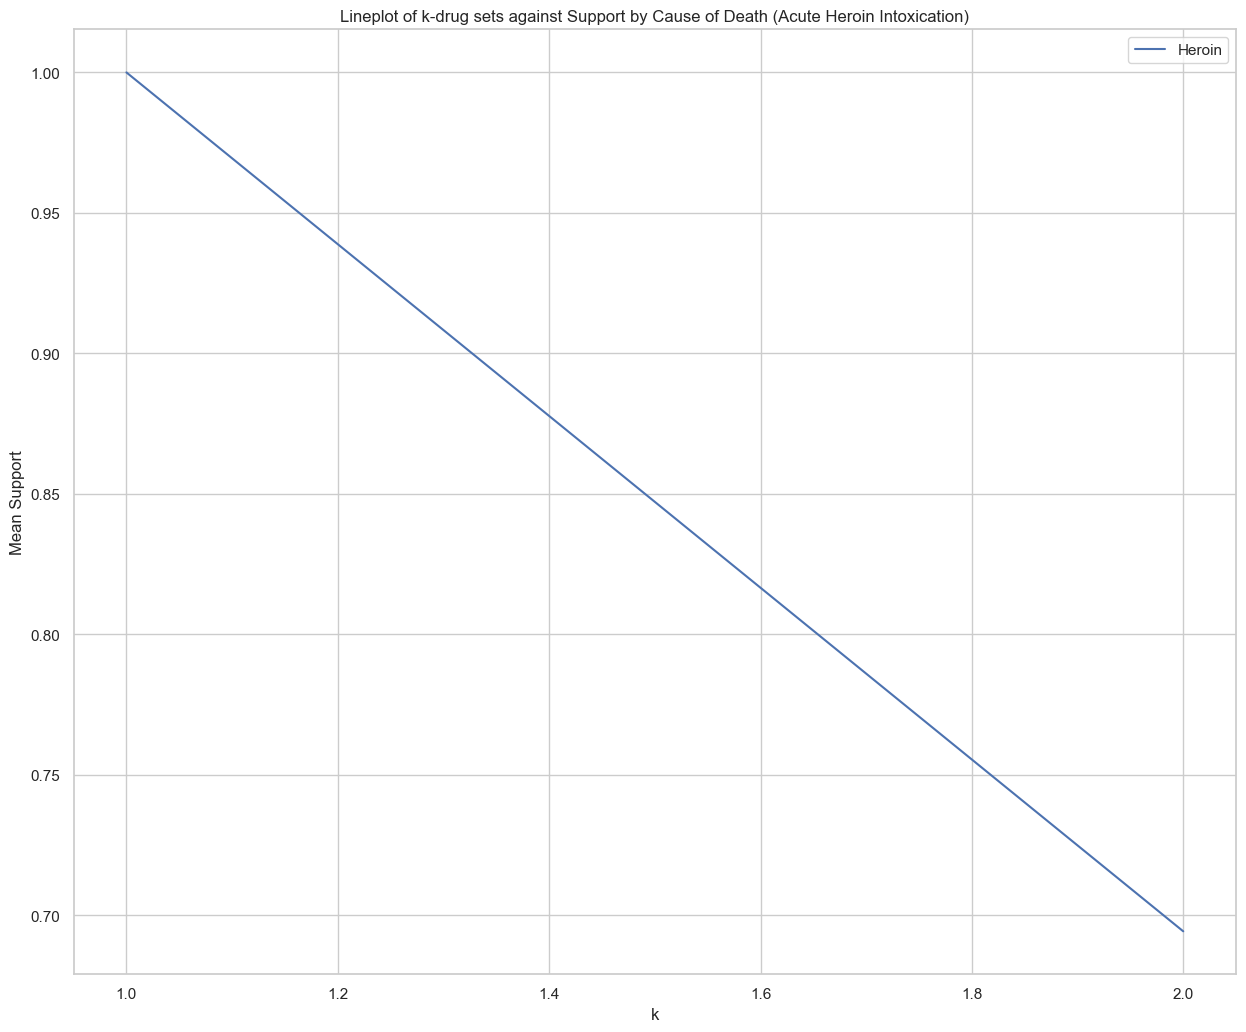

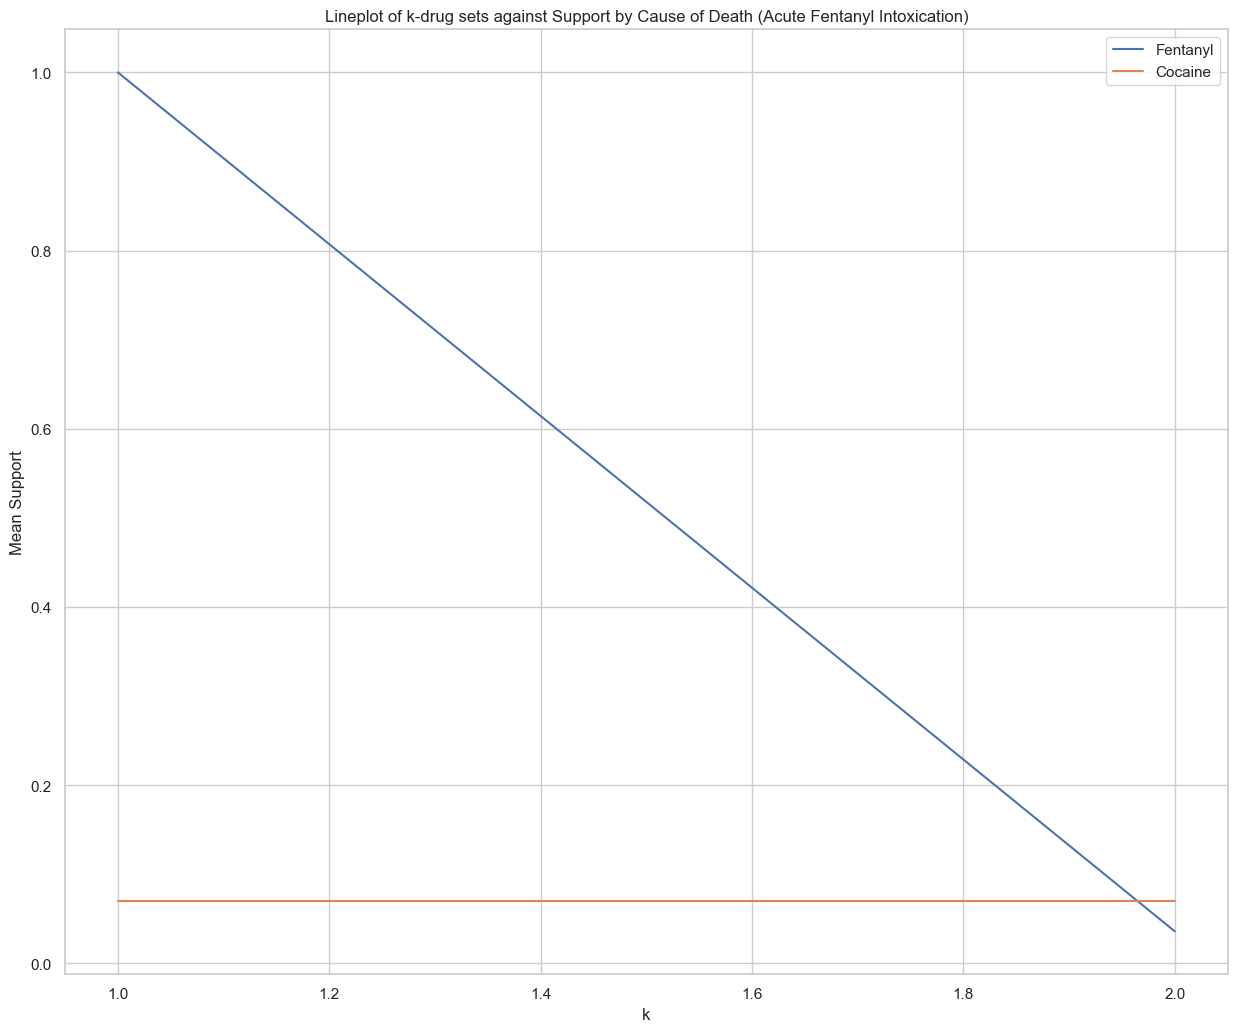

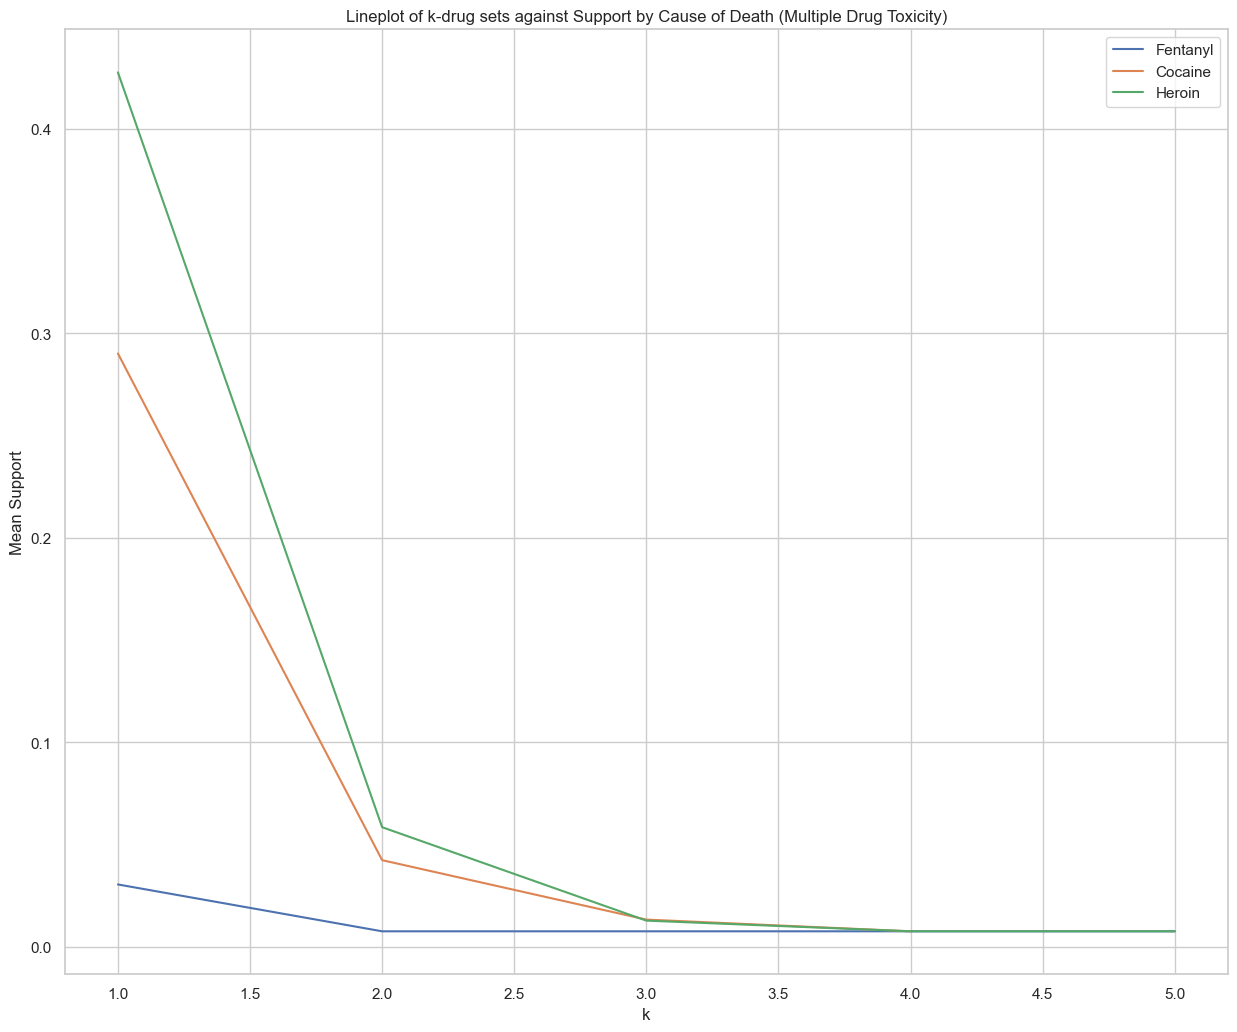

In [37]:
# Now let's call the measure group function:
measure_by_group('Cause of Death', causedeath_tox, causedeath_tox['Cause of Death'].unique()[1:], 'supp', 
                 ['Fentanyl', 'Cocaine', 'Heroin'])

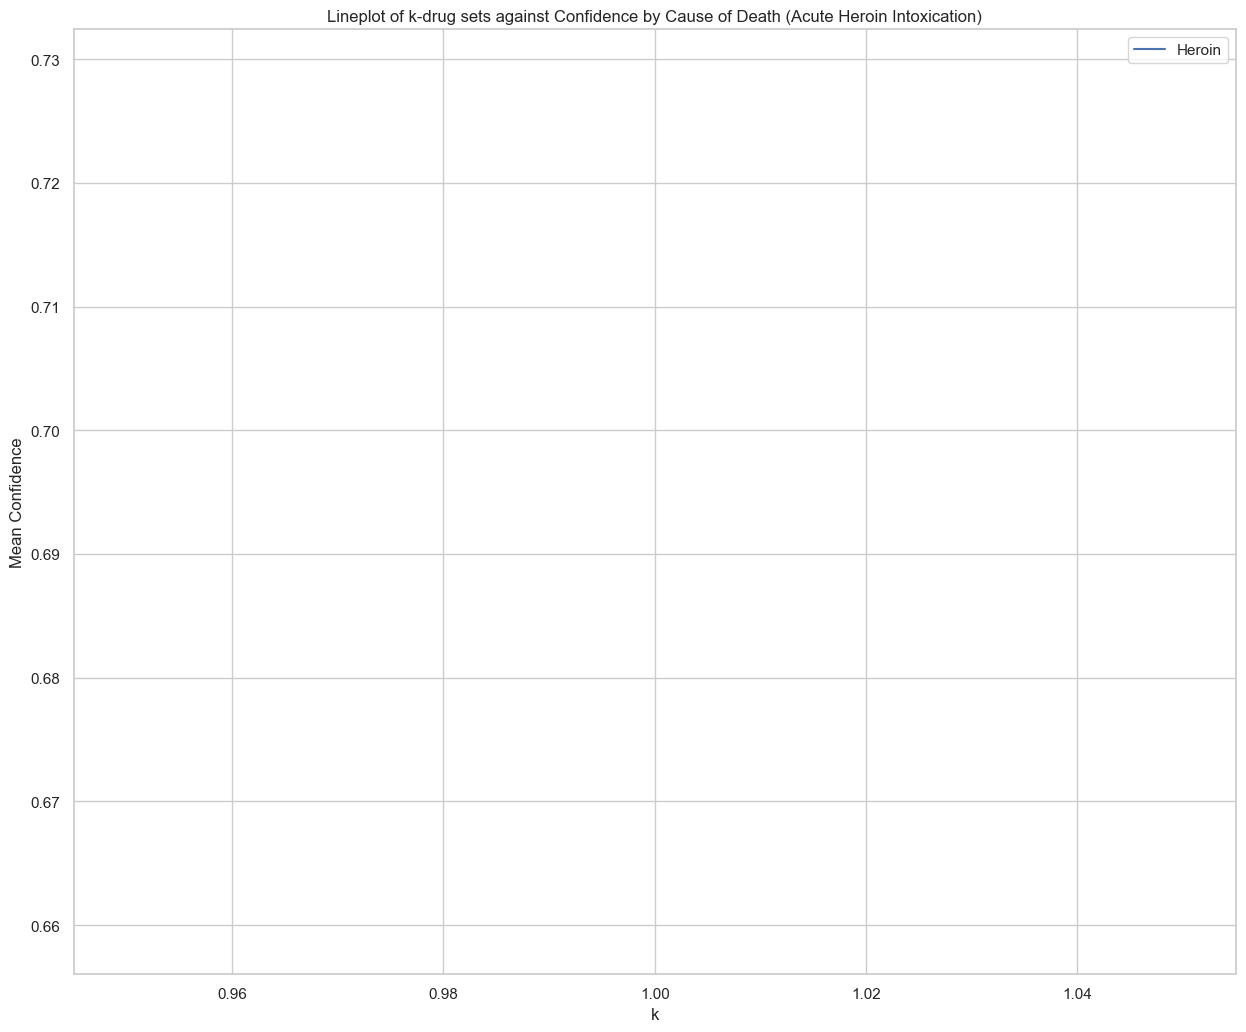

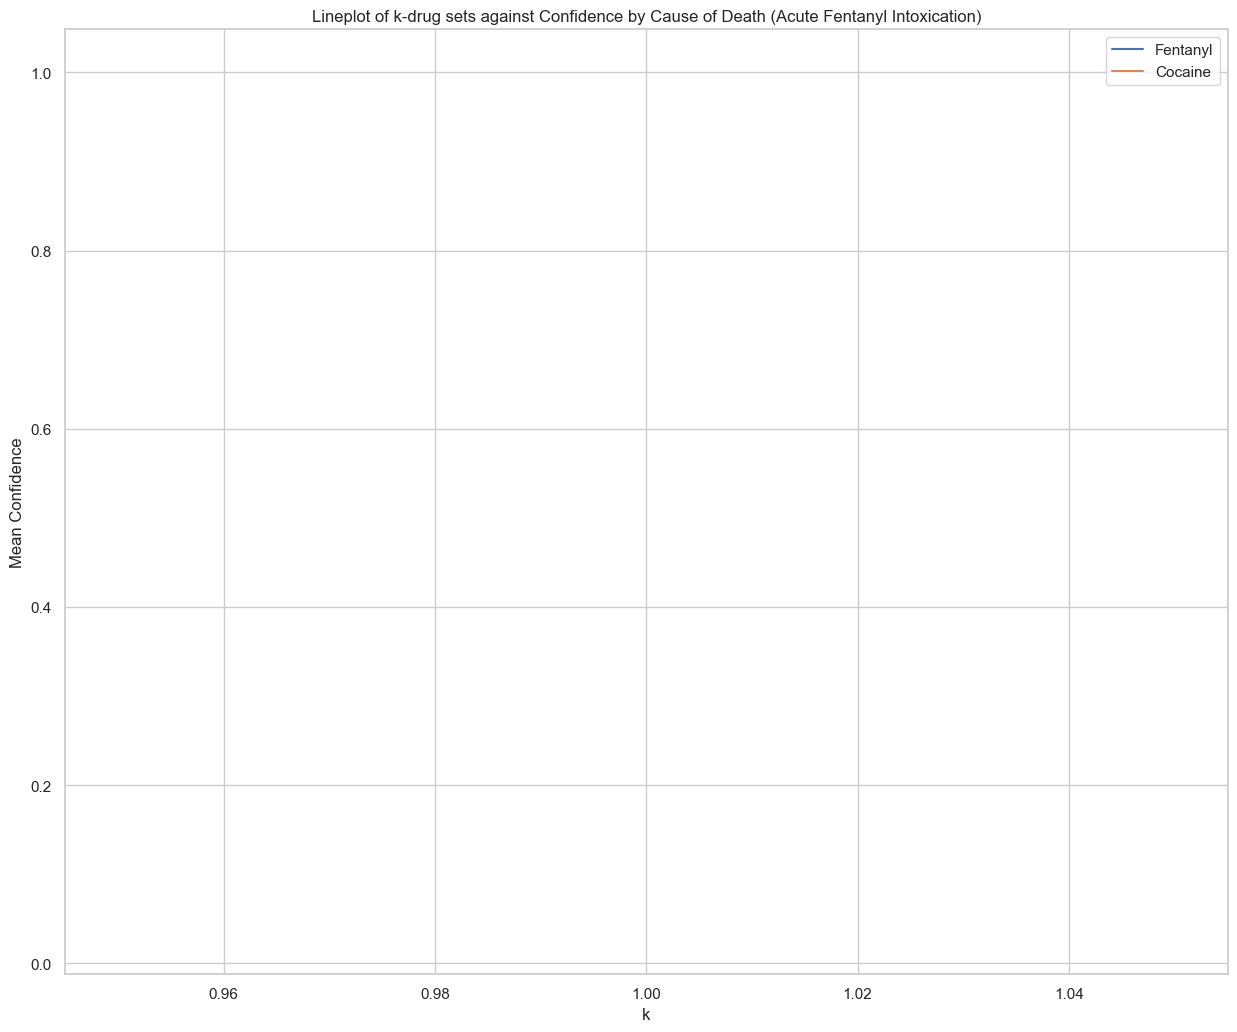

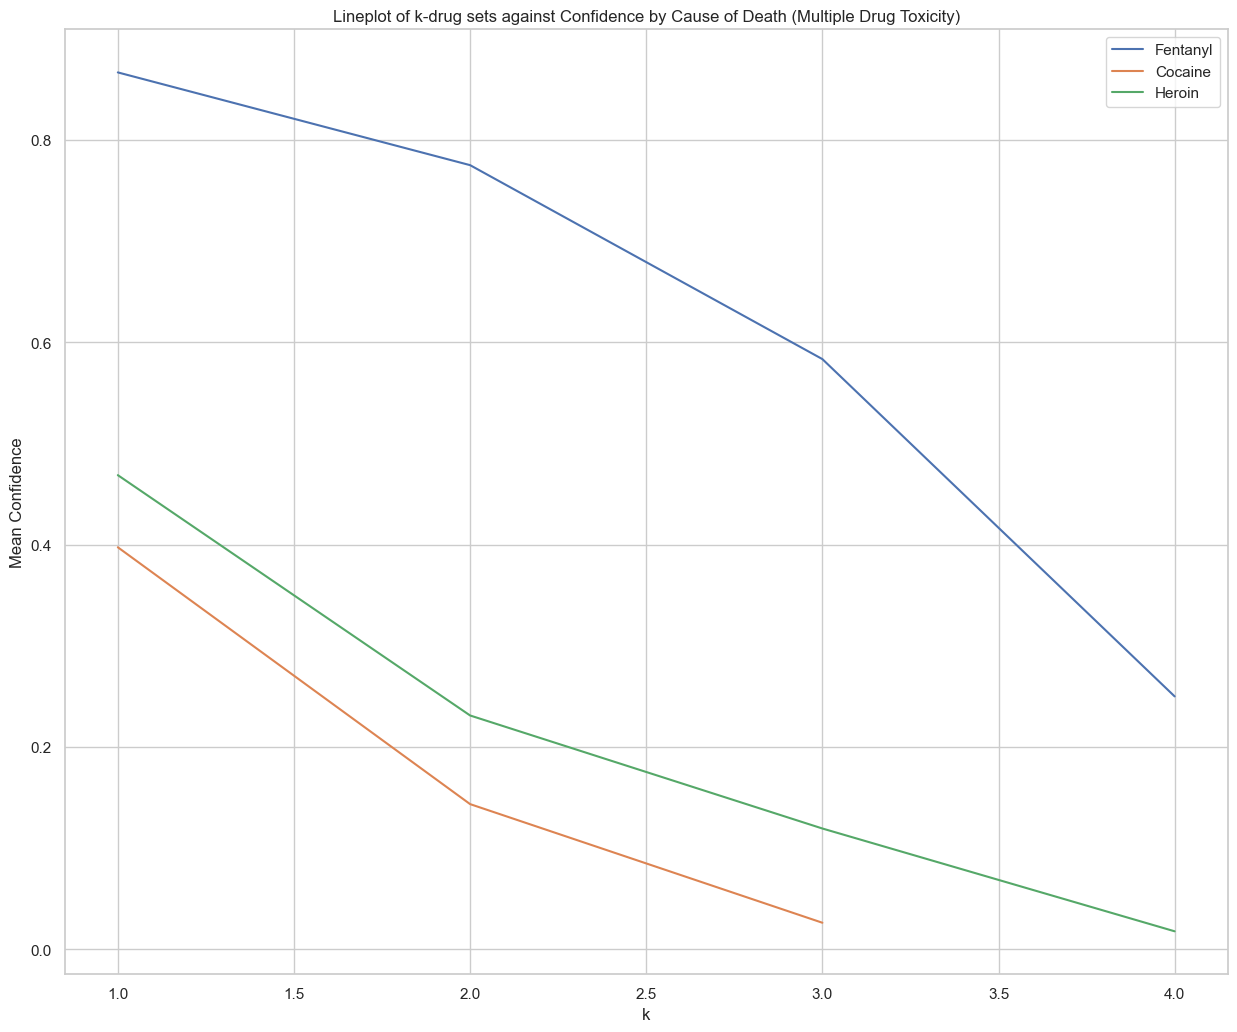

In [38]:
measure_by_group('Cause of Death', causedeath_tox, causedeath_tox['Cause of Death'].unique()[1:], 'conf',
                 ['Fentanyl', 'Cocaine', 'Heroin'])

In [39]:
# Interestingly we observe that for AHI, there seems to be only "Heroin" at play among "Fentanyl, Cocaine and Heroin". This
# suggests that there may well be some other drug which is also influencing here but since we are not concerned with any
# other drug out of these three, its effect is not seen. However, nontheless this shows that supp('Heroin|AHI') is greater
# than the other drugs respective parts. This can be backed up the confidence plot which is empty hence showing that 
# heroin is not affecting the joint occurence with Fentanyl and Cocaine given AHI. Hence conf(Heroin --> Fentanyl/Cocaine)
# given AHI is literally non-existent! In otherwords for AHI, the main reason, though seems obvious is Heroin.

# Moving on to AFI, not suprisingly we see a big role of Fentanyl and somewhat of Cocaine (nearly 0). This suggests
# that supp(Fentanyl | AFI) > supp(Cocaine | AFI). However, suprisingly, looking at the confidence plot, its empty! 
# This for now seems a big puzzle however,  one reason for this could be that among the three drugs, AFI is mainly 
# correlated with Fentanyl and and since we are concerned with confidence scores where L.H.S is a single itemset, we dont 
# see any confidence measures with k > 1. If we had done so, we might have seen some for where L.H.S is (Fentanyl, Cocaine), 
# due to their somewhat small join occurence measure. 
# (Make sure to write about this in the report in limitations i.e. include more drugs)

# Lastly, but not the least, MDT, for some maybe obvious but is the only drug among the three types of deaths 
# where each drug is most prevalent in join-occurence. With regards to the support graph, we see that cocaine and heroin
# overake fentanyl meaning supp(Cocaine & Heroin | MDT) > supp(Fentanyl | MDT). However, one point to note is that 
# while we were seeing the hill-shaped curve for Cocaine and Heroin, we see an ever so slightly increasing support for 
# Fentanyl. This bump is not yet fully explained but we might come to it later. Recall, we were sometimes interested 
# in the "longevity" effect of a drug. Here we observe that Heroin has the highest lasting influence. This suggests that
# the drug MDT is actually more concerned with Heroin as its main cause at higher k compared to Fentanyl for small k

# Looking at the conf plot, we see one more interesting result. For MDT, the ability to affect joint occurence of Fentanyl
# with cocaine and heroin is quite high which further goes to show the neccessary effect of Heroin and Cocaine with MDT. 
# Consequently, we see a decreased confidence for the other two. All in all we infer that conf(x --> Heroin/Cocaine), 
# where x can be any drug; is likely to be the highest if the person has MDT. In otherwords, Heroin followed by Cocaine 
# followed by Fentanyl can be the order of increasing causation influence on MDT. 


In [40]:
# According to the path in D1, we started doing some district level analysis particularly for 'Cause of Death' with 
# categories of AFI and MDT. With additional information we have extracted from above for both MDT and AFI, let's 
# see if we get any more useful information when doing district level analysis. But first let's recall one visualisation
# from D1.

state_death = pd.read_csv('statedeath.csv')
state_death.rename(columns = {'Death City': 'Count', 'Unnamed: 0': 'Death City'}, inplace = True)
state_death

Death City  Count
0     HARTFORD   1083
1    NEW HAVEN    765
2    WATERBURY    728
3   BRIDGEPORT    625
4  NEW BRITAIN    360
5      BRISTOL    251
6   NEW LONDON    246
7      NORWICH    244
8      MERIDEN    233
9      DANBURY    232

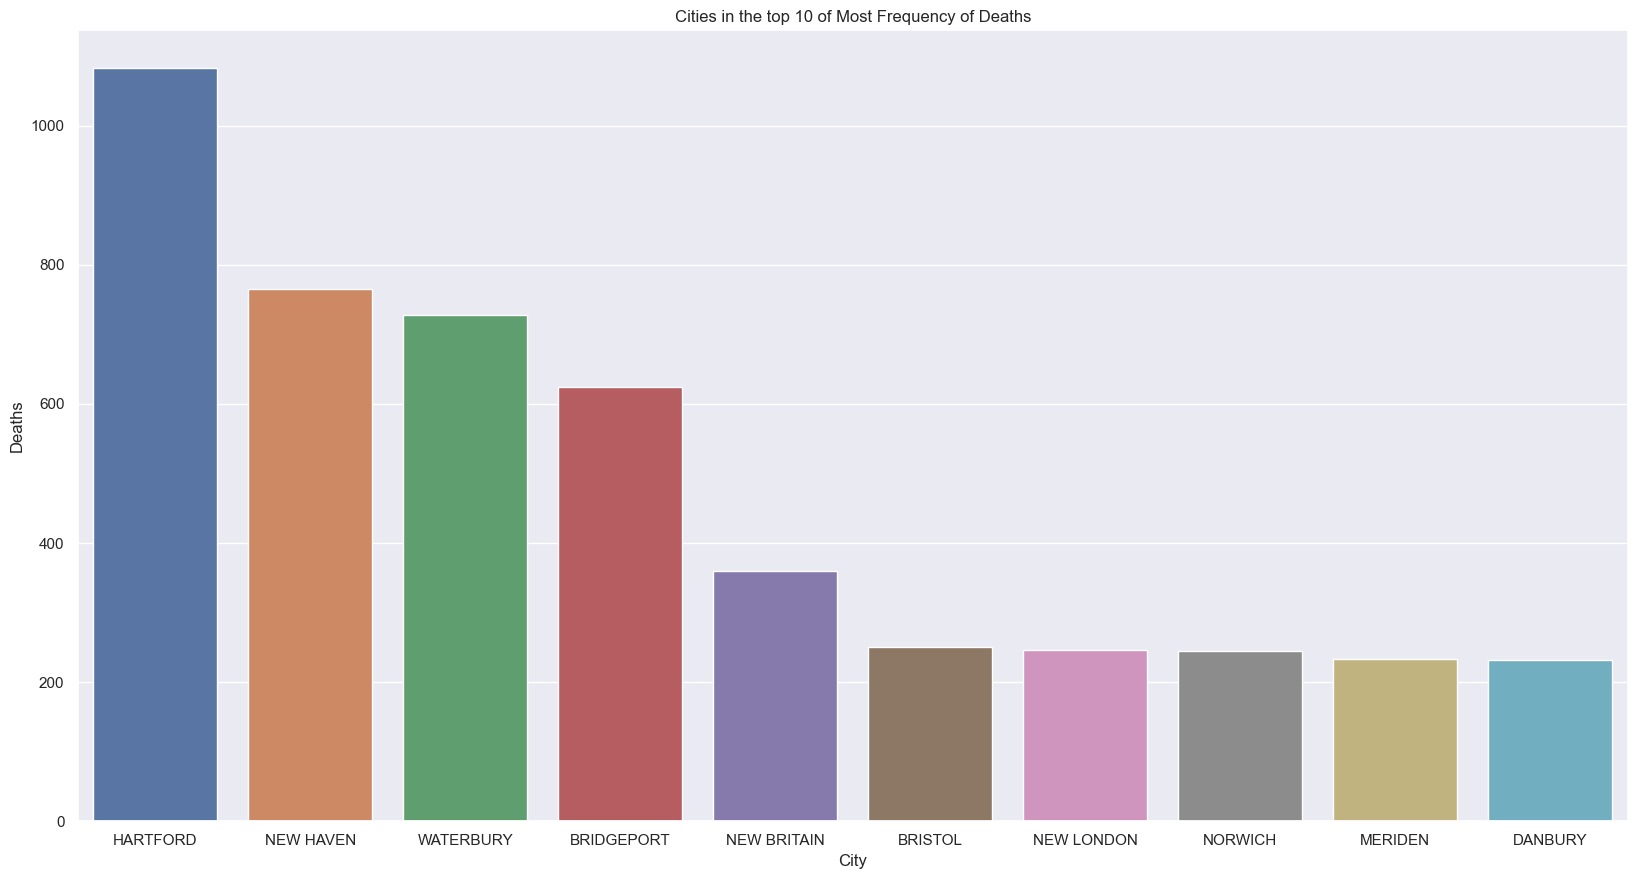

In [41]:
# Let's plot the bar graph
sns.set(rc={'figure.figsize':(20,10.27)})

fig, axes = plt.subplots()

ax1 = sns.barplot(x = state_death['Death City'], y = state_death['Count'])
ax1.set(title = 'Cities in the top 10 of Most Frequency of Deaths', xlabel = "City", ylabel = "Deaths")
plt.show()

In [42]:
# For now let's keep such relative frequencies of deaths by cities in mind.

# Now let's import another dataset which has the toxicity report with the addition of cities and the cause of death. 
# For more information on how this data was constructed please refer to D1.

tox_states = pd.read_csv('tox_states.csv')
tox_states.drop(tox_states.columns[0], axis = 1, inplace = True)
tox_states

Heroin  Cocaine  Fentanyl  Fentanyl Analogue  Oxycodone  Oxymorphone  \
0         0        0         1                  0          0            0   
1         1        0         0                  0          0            0   
2         0        0         1                  0          0            0   
3         0        0         0                  0          1            1   
4         0        0         1                  0          0            0   
..      ...      ...       ...                ...        ...          ...   
384       0        0         1                  0          0            0   
385       0        0         1                  0          0            0   
386       0        0         1                  0          0            0   
387       0        0         1                  0          0            0   
388       0        0         1                  0          0            0   

     Ethanol  Hydrocodone  Benzodiazepine  Methadone  ...  Xylazine  \
0          0            0               0          0  ...         0   
1          0            0               1          0  ...         0   
2          0            0               0          0  ...         0   
3          0            0               1          1  ...         0   
4          0            0               0          0  ...         0   
..       ...          ...             ...        ...  ...       ...   
384        0            0               0          0  ...         0   
385        0            0               0          0  ...         0   
386        0            0               0          0  ...         0   
387        0            0               0          0  ...         0   
388        0            0               0          0  ...         0   

     Gabapentin  Opiate NOS  Heroin/Morph/Codeine  Other Opioid  Any Opioid  \
0             0           0                     0             0           1   
1             0           0                     0             0           0   
2             0           0                     0             0           1   
3             0           0                     0             0           0   
4             0           0                     0             0           1   
..          ...         ...                   ...           ...         ...   
384           0           0                     0             0           1   
385           0           0                     0             0           1   
386           0           0                     0             0           1   
387           0           0                     0             0           1   
388           0           0                     0             0           1   

     Other  count  Residence City               Cause of Death  
0        0      2       WOODSTOCK  Acute Fentanyl Intoxication  
1        0      2          MONROE       Multiple Drug Toxicity  
2        0      2       NEW HAVEN  Acute Fentanyl Intoxication  
3        0      4       STRATFORD       Multiple Drug Toxicity  
4        0      2      NEW LONDON  Acute Fentanyl Intoxication  
..     ...    ...             ...                          ...  
384      0      2       WOODSTOCK  Acute Fentanyl Intoxication  
385      0      2         BRISTOL  Acute Fentanyl Intoxication  
386      0      2          HAMDEN  Acute Fentanyl Intoxication  
387      0      2        ROCKFALL  Acute Fentanyl Intoxication  
388      0      2      MANCHESTER  Acute Fentanyl Intoxication  

[389 rows x 25 columns]

In [43]:
len(tox_states['Residence City'].unique())

94

In [44]:
# Now let's right get into the classic support/confidence analysis of first only 'Residence City' and then coupled with the
# toxicity report. However theres a small caveat. Unlike before where we had a few categories of the grouping attribute
# like in Sex or Race, here thats not the case. We have over 90 such categoires. Therefore, converting such a dataframe
# into ECLAT will prove to be insensible as we will have more than 400 attributes. And like we studied in CS 432, this 
# can become a problem known as "Curse of Dimensionality". Normally, one might be tempted to do PCA to resolve such an issue
# but there are some attributes that we definetly dont want to lose. Therefore, a compromise has to be reached. 

# We will be handling this situation from two different angles.

# 1) We have to filter the list of drugs somehow and the cities somehow. We will be doing the former part by utilizing 
# the correlation heatmap we made in D1. We will not recall that here to avoid redundancy. What we will be doing is we will
# only choose those drugs whose correlation with the "count" variable is > 0.2 (arbitary threshold (comes in limitation))
# With respect to that, we see that we get the drugs "Heroin, Cocaine, Fentanyl, Fentanyl Analogue, Ethanol
# Benzodiazepine, Heroin/Morphine/Codeine". For the latter, we will be including only those cities that appear in the 
# top 10 shown by the bar graph above. However, this can be crucial oversight, omitting more than 70% of the cities. 
# However, let's recall our discussion from D1 on why we were doing district level analysis. We were primarily concerned
# with finding the root cause of such type of deaths, most common drug associated with it and consequently cities 
# vulnerable to this. This is where our second angle comes in. 

# 2) We will carrying out cluster analysis on the features cause of death and cities. If you recall from D1, we had 
# visualised the instances of MDT and AFT by cities and had observed that most instances of such deaths were happening 
# right in the centre of conneticut whose cities formed a crucial cluster for such activities. Moreover, we had observed
# that those cities were also seen in the above bar graph. All in all, if we were to prove that this cluster is indeed 
# prominent for such cases, our approach in 1) will be justified. 

# Therefore let's get right into it and filter the dataset according to 1). Note we will not be modifying it, instead we 
# will be creating a copy and changing that. The original will be used for clustering.

tox_cluster = tox_states.copy()
# Filtering the drugs
retain_col = ['Heroin', 'Cocaine', 'Fentanyl', 'Fentanyl Analogue', 'Ethanol', 'Benzodiazepine', 'Heroin/Morphine/Codeine',
             'Residence City', 'Cause of Death']
tox_states.drop(columns = [col for col in tox_states.columns if col not in retain_col], axis = 1, inplace = True)
tox_states

Heroin  Cocaine  Fentanyl  Fentanyl Analogue  Ethanol  Benzodiazepine  \
0         0        0         1                  0        0               0   
1         1        0         0                  0        0               1   
2         0        0         1                  0        0               0   
3         0        0         0                  0        0               1   
4         0        0         1                  0        0               0   
..      ...      ...       ...                ...      ...             ...   
384       0        0         1                  0        0               0   
385       0        0         1                  0        0               0   
386       0        0         1                  0        0               0   
387       0        0         1                  0        0               0   
388       0        0         1                  0        0               0   

    Residence City               Cause of Death  
0        WOODSTOCK  Acute Fentanyl Intoxication  
1           MONROE       Multiple Drug Toxicity  
2        NEW HAVEN  Acute Fentanyl Intoxication  
3        STRATFORD       Multiple Drug Toxicity  
4       NEW LONDON  Acute Fentanyl Intoxication  
..             ...                          ...  
384      WOODSTOCK  Acute Fentanyl Intoxication  
385        BRISTOL  Acute Fentanyl Intoxication  
386         HAMDEN  Acute Fentanyl Intoxication  
387       ROCKFALL  Acute Fentanyl Intoxication  
388     MANCHESTER  Acute Fentanyl Intoxication  

[389 rows x 8 columns]

In [45]:
# Filtering the Cities
tox_states = tox_states[tox_states['Residence City'].isin(state_death['Death City'].unique())]
tox_states

Heroin  Cocaine  Fentanyl  Fentanyl Analogue  Ethanol  Benzodiazepine  \
2         0        0         1                  0        0               0   
4         0        0         1                  0        0               0   
7         0        0         1                  0        0               0   
9         0        0         1                  0        0               0   
12        0        1         0                  0        0               0   
..      ...      ...       ...                ...      ...             ...   
379       0        0         0                  0        1               1   
381       0        0         1                  0        0               0   
382       0        0         1                  0        0               0   
383       0        0         1                  0        0               0   
385       0        0         1                  0        0               0   

    Residence City               Cause of Death  
2        NEW HAVEN  Acute Fentanyl Intoxication  
4       NEW LONDON  Acute Fentanyl Intoxication  
7          DANBURY  Acute Fentanyl Intoxication  
9         HARTFORD  Acute Fentanyl Intoxication  
12         MERIDEN       Multiple Drug Toxicity  
..             ...                          ...  
379     NEW LONDON       Multiple Drug Toxicity  
381       HARTFORD  Acute Fentanyl Intoxication  
382        BRISTOL  Acute Fentanyl Intoxication  
383       HARTFORD  Acute Fentanyl Intoxication  
385        BRISTOL  Acute Fentanyl Intoxication  

[184 rows x 8 columns]

In [46]:
# Now let's convert into ECLAT format
for city in tox_states['Residence City'].unique():
    tox_states[city] = np.where(tox_states['Residence City'] == city, 1, 0)
for cause in tox_states['Cause of Death'].unique():
    tox_states[cause] = np.where(tox_states['Cause of Death'] == city, 1, 0)
tox_states

Heroin  Cocaine  Fentanyl  Fentanyl Analogue  Ethanol  Benzodiazepine  \
2         0        0         1                  0        0               0   
4         0        0         1                  0        0               0   
7         0        0         1                  0        0               0   
9         0        0         1                  0        0               0   
12        0        1         0                  0        0               0   
..      ...      ...       ...                ...      ...             ...   
379       0        0         0                  0        1               1   
381       0        0         1                  0        0               0   
382       0        0         1                  0        0               0   
383       0        0         1                  0        0               0   
385       0        0         1                  0        0               0   

    Residence City               Cause of Death  NEW HAVEN  NEW LONDON  \
2        NEW HAVEN  Acute Fentanyl Intoxication          1           0   
4       NEW LONDON  Acute Fentanyl Intoxication          0           1   
7          DANBURY  Acute Fentanyl Intoxication          0           0   
9         HARTFORD  Acute Fentanyl Intoxication          0           0   
12         MERIDEN       Multiple Drug Toxicity          0           0   
..             ...                          ...        ...         ...   
379     NEW LONDON       Multiple Drug Toxicity          0           1   
381       HARTFORD  Acute Fentanyl Intoxication          0           0   
382        BRISTOL  Acute Fentanyl Intoxication          0           0   
383       HARTFORD  Acute Fentanyl Intoxication          0           0   
385        BRISTOL  Acute Fentanyl Intoxication          0           0   

     DANBURY  HARTFORD  MERIDEN  NEW BRITAIN  BRIDGEPORT  WATERBURY  BRISTOL  \
2          0         0        0            0           0          0        0   
4          0         0        0            0           0          0        0   
7          1         0        0            0           0          0        0   
9          0         1        0            0           0          0        0   
12         0         0        1            0           0          0        0   
..       ...       ...      ...          ...         ...        ...      ...   
379        0         0        0            0           0          0        0   
381        0         1        0            0           0          0        0   
382        0         0        0            0           0          0        1   
383        0         1        0            0           0          0        0   
385        0         0        0            0           0          0        1   

     NORWICH  Acute Fentanyl Intoxication  Multiple Drug Toxicity  
2          0                            0                       0  
4          0                            0                       0  
7          0                            0                       0  
9          0                            0                       0  
12         0                            0                       0  
..       ...                          ...                     ...  
379        0                            0                       0  
381        0                            0                       0  
382        0                            0                       0  
383        0                            0                       0  
385        0                            0                       0  

[184 rows x 20 columns]

In [47]:
# Let's drop unncessary columns and reset_index
x, y, z = tox_states['Residence City'], tox_states['Cause of Death'], tox_states.iloc[:, 0:6]
tox_states.drop(['Residence City', 'Cause of Death'], axis = 1, inplace = True)
tox_states.reset_index(drop = True, inplace = True)
tox_states

Heroin  Cocaine  Fentanyl  Fentanyl Analogue  Ethanol  Benzodiazepine  \
0         0        0         1                  0        0               0   
1         0        0         1                  0        0               0   
2         0        0         1                  0        0               0   
3         0        0         1                  0        0               0   
4         0        1         0                  0        0               0   
..      ...      ...       ...                ...      ...             ...   
179       0        0         0                  0        1               1   
180       0        0         1                  0        0               0   
181       0        0         1                  0        0               0   
182       0        0         1                  0        0               0   
183       0        0         1                  0        0               0   

     NEW HAVEN  NEW LONDON  DANBURY  HARTFORD  MERIDEN  NEW BRITAIN  \
0            1           0        0         0        0            0   
1            0           1        0         0        0            0   
2            0           0        1         0        0            0   
3            0           0        0         1        0            0   
4            0           0        0         0        1            0   
..         ...         ...      ...       ...      ...          ...   
179          0           1        0         0        0            0   
180          0           0        0         1        0            0   
181          0           0        0         0        0            0   
182          0           0        0         1        0            0   
183          0           0        0         0        0            0   

     BRIDGEPORT  WATERBURY  BRISTOL  NORWICH  Acute Fentanyl Intoxication  \
0             0          0        0        0                            0   
1             0          0        0        0                            0   
2             0          0        0        0                            0   
3             0          0        0        0                            0   
4             0          0        0        0                            0   
..          ...        ...      ...      ...                          ...   
179           0          0        0        0                            0   
180           0          0        0        0                            0   
181           0          0        1        0                            0   
182           0          0        0        0                            0   
183           0          0        1        0                            0   

     Multiple Drug Toxicity  
0                         0  
1                         0  
2                         0  
3                         0  
4                         0  
..                      ...  
179                       0  
180                       0  
181                       0  
182                       0  
183                       0  

[184 rows x 18 columns]

In [48]:
tox_states.columns[6:16]

Index(['NEW HAVEN', 'NEW LONDON', 'DANBURY', 'HARTFORD', 'MERIDEN',
       'NEW BRITAIN', 'BRIDGEPORT', 'WATERBURY', 'BRISTOL', 'NORWICH'],
      dtype='object')

In [49]:
# Now let's do FPM and Association Rule Mining!
freq_toxstates_sets = fpgrowth(tox_states, min_support = (0.01/100), use_colnames = True)
freq_toxstates_sets

support                                      itemsets
0    0.755435                                    (Fentanyl)
1    0.125000                                   (NEW HAVEN)
2    0.059783                                  (NEW LONDON)
3    0.038043                                     (DANBURY)
4    0.250000                                    (HARTFORD)
..        ...                                           ...
111  0.005435  (WATERBURY, Cocaine, Benzodiazepine, Heroin)
112  0.059783                           (NORWICH, Fentanyl)
113  0.005435                            (Ethanol, NORWICH)
114  0.005435                            (Cocaine, NORWICH)
115  0.005435                   (Ethanol, Cocaine, NORWICH)

[116 rows x 2 columns]

In [50]:
# Now let's get the rules by confidence before we analyse them
rules_toxstates_sets = association_rules(freq_toxstates_sets, metric = 'confidence', min_threshold = 0.001)
rules_toxstates_sets

antecedents         consequents  antecedent support  \
0            (Fentanyl)         (NEW HAVEN)            0.755435   
1           (NEW HAVEN)          (Fentanyl)            0.125000   
2          (NEW LONDON)          (Fentanyl)            0.059783   
3            (Fentanyl)        (NEW LONDON)            0.755435   
4             (Ethanol)        (NEW LONDON)            0.076087   
..                  ...                 ...                 ...   
541  (Ethanol, NORWICH)           (Cocaine)            0.005435   
542  (Cocaine, NORWICH)           (Ethanol)            0.005435   
543           (Ethanol)  (Cocaine, NORWICH)            0.076087   
544           (Cocaine)  (Ethanol, NORWICH)            0.114130   
545           (NORWICH)  (Ethanol, Cocaine)            0.070652   

     consequent support   support  confidence       lift  leverage  conviction  
0              0.125000  0.086957    0.115108   0.920863 -0.007473    0.988821  
1              0.755435  0.086957    0.695652   0.920863 -0.007473    0.803571  
2              0.755435  0.038043    0.636364   0.842381 -0.007118    0.672554  
3              0.059783  0.038043    0.050360   0.842381 -0.007118    0.990077  
4              0.059783  0.016304    0.214286   3.584416  0.011756    1.196640  
..                  ...       ...         ...        ...       ...         ...  
541            0.114130  0.005435    1.000000   8.761905  0.004815         inf  
542            0.076087  0.005435    1.000000  13.142857  0.005021         inf  
543            0.005435  0.005435    0.071429  13.142857  0.005021    1.071070  
544            0.005435  0.005435    0.047619   8.761905  0.004815    1.044293  
545            0.021739  0.005435    0.076923   3.538462  0.003899    1.059783  

[546 rows x 9 columns]

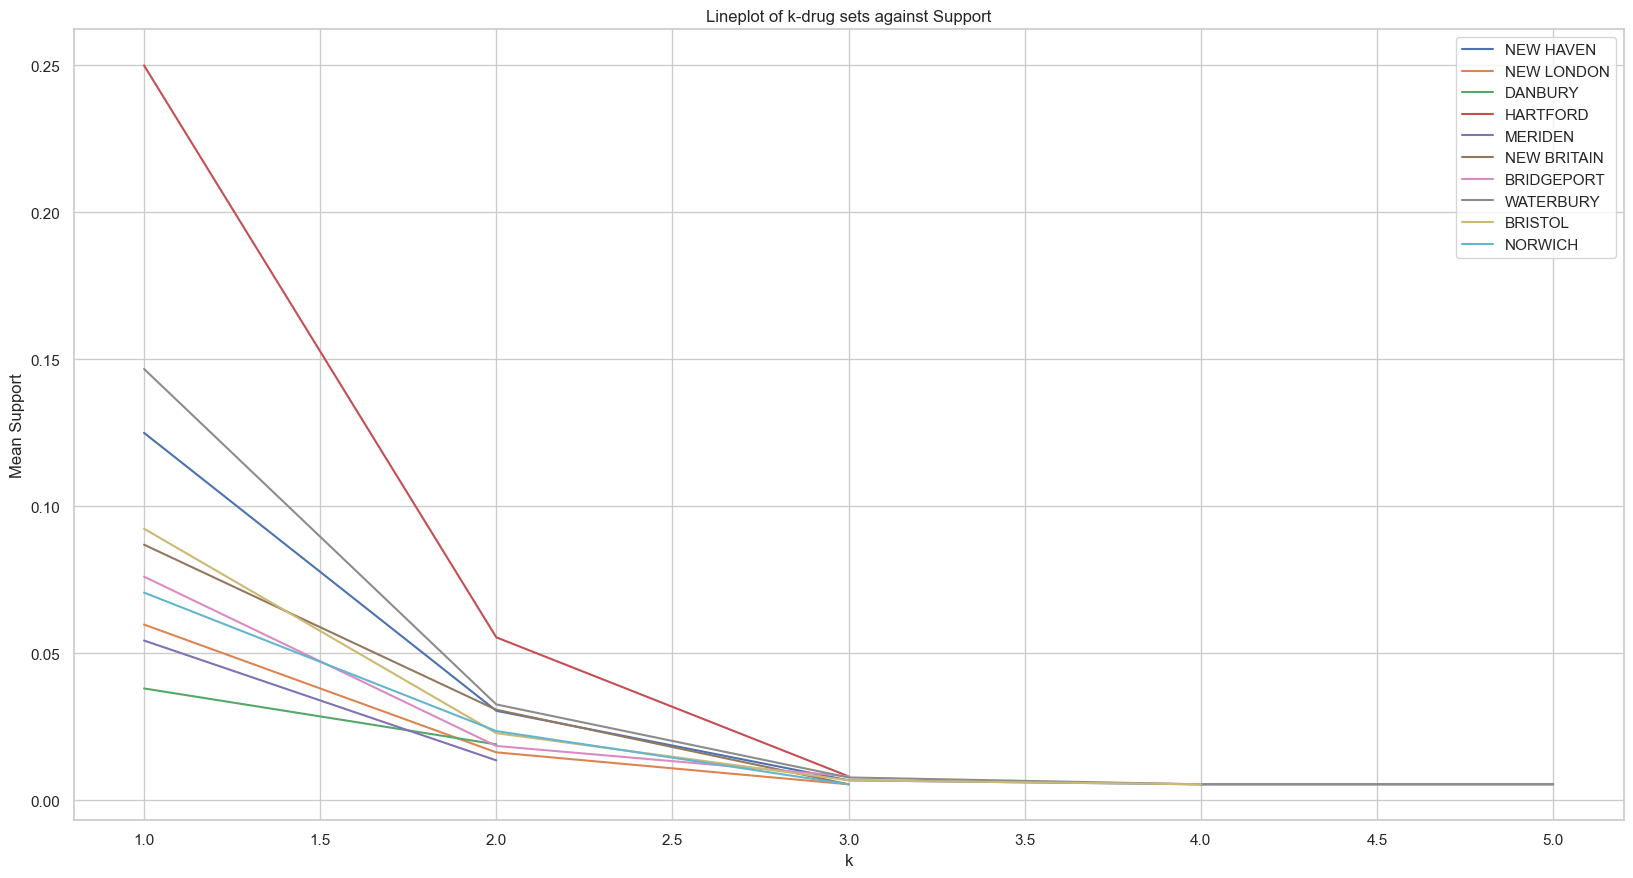

In [51]:
# Ok now let's first check the support/confidence by cities only
drug_supp_plot(freq_toxstates_sets, list(tox_states.columns[6:16]))

In [52]:
# Analysis:
# First of all looking at the support plot, we clearly observe a significant support for Hartford which can clearly be seen
# by the bar graph as well. However, instead of simply observing their relative supports, let's look at one interesting
# aspect which keeps popping up in our analysis i.e. "longevity". Most of the cities even including high support ones like
# Hartford only come in 3-itemsets max. This suggest that their influence though significant for some doesn't extend that
# much as compared to "Waterbury, New Haven, Bristol", which extend to 4 and even 5 itemsets. Therefore, all in all, we
# expect such cities with high supports and great longevity to be especially be in the main cluster later on. 

# Moving on to the confidence plot, by now we have already seen how one mingles with the other beautifully. We see that
# New Haven, Waterbury, Bristol have the highest confidence showing how much impact they play in joint-occurences with
# AFI/MDT or any drug. And suprisingly we see Hartford at the bottom which may imply that its influence is short-lived

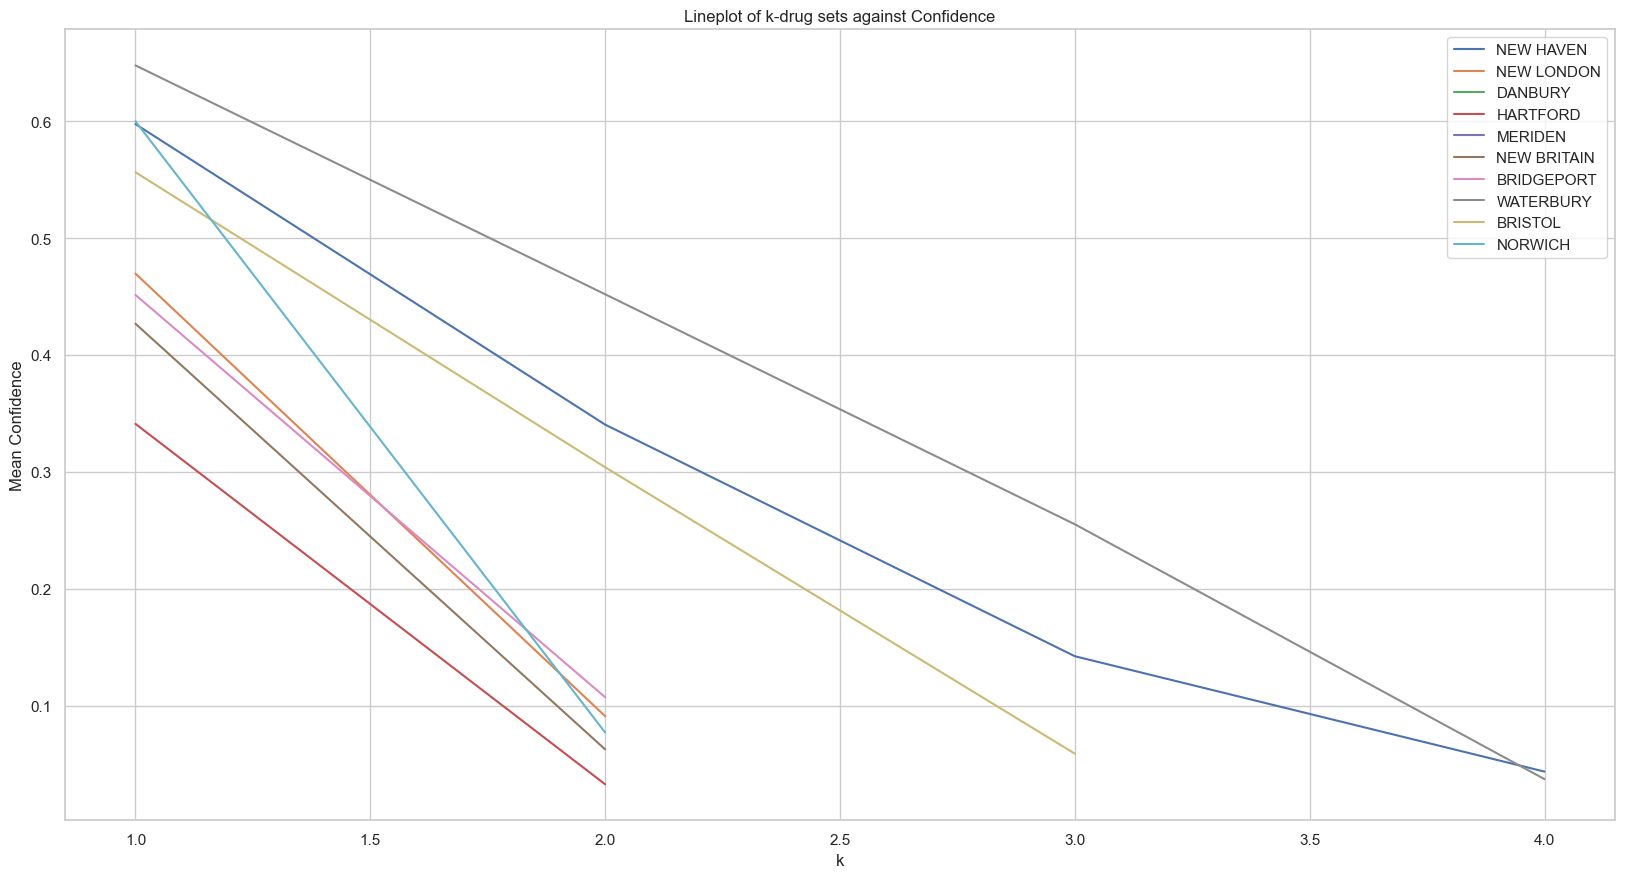

In [53]:
# Confidence
drug_conf_plot(rules_toxstates_sets, list(tox_states.columns[6:16]))

In [54]:
tox_states_city = pd.concat([z, x], axis = 1)
tox_states_city

Heroin  Cocaine  Fentanyl  Fentanyl Analogue  Ethanol  Benzodiazepine  \
2         0        0         1                  0        0               0   
4         0        0         1                  0        0               0   
7         0        0         1                  0        0               0   
9         0        0         1                  0        0               0   
12        0        1         0                  0        0               0   
..      ...      ...       ...                ...      ...             ...   
379       0        0         0                  0        1               1   
381       0        0         1                  0        0               0   
382       0        0         1                  0        0               0   
383       0        0         1                  0        0               0   
385       0        0         1                  0        0               0   

    Residence City  
2        NEW HAVEN  
4       NEW LONDON  
7          DANBURY  
9         HARTFORD  
12         MERIDEN  
..             ...  
379     NEW LONDON  
381       HARTFORD  
382        BRISTOL  
383       HARTFORD  
385        BRISTOL  

[184 rows x 7 columns]

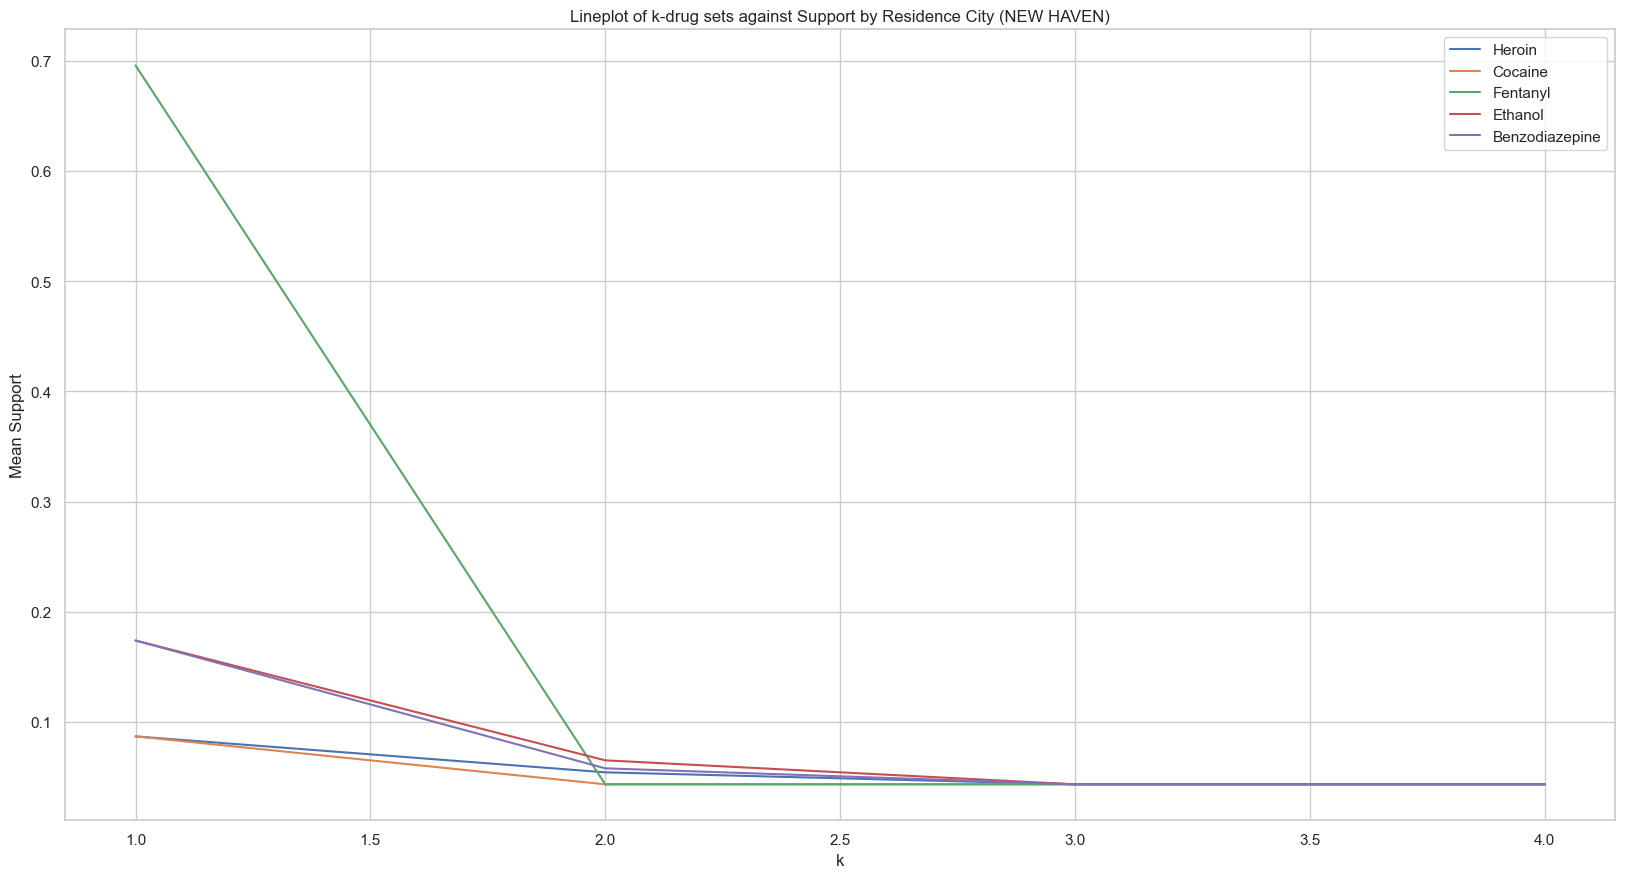

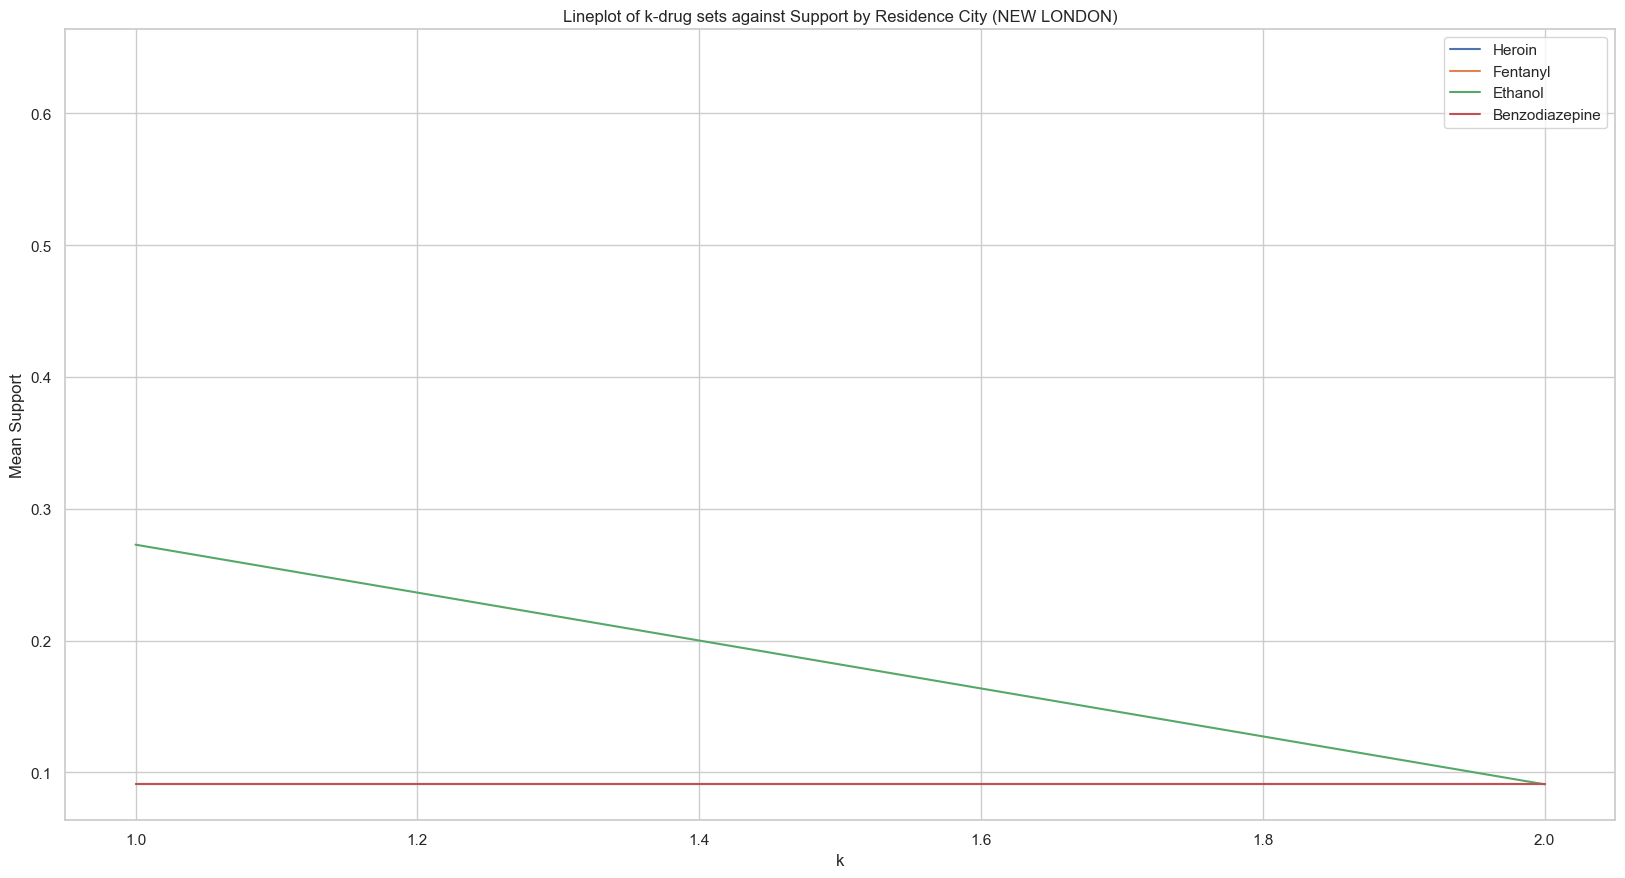

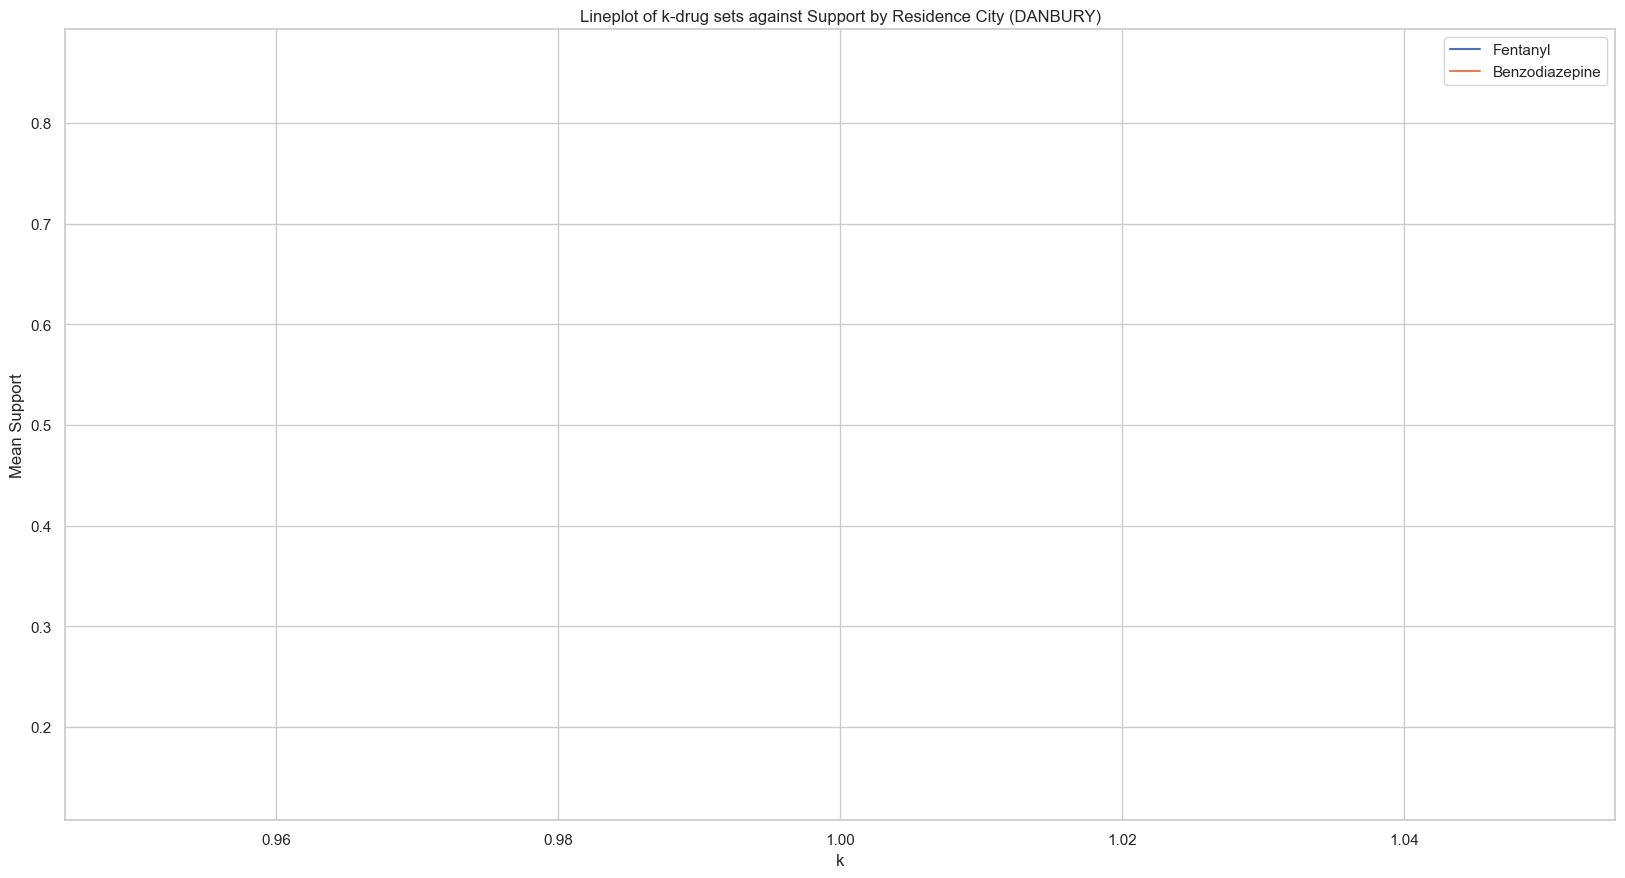

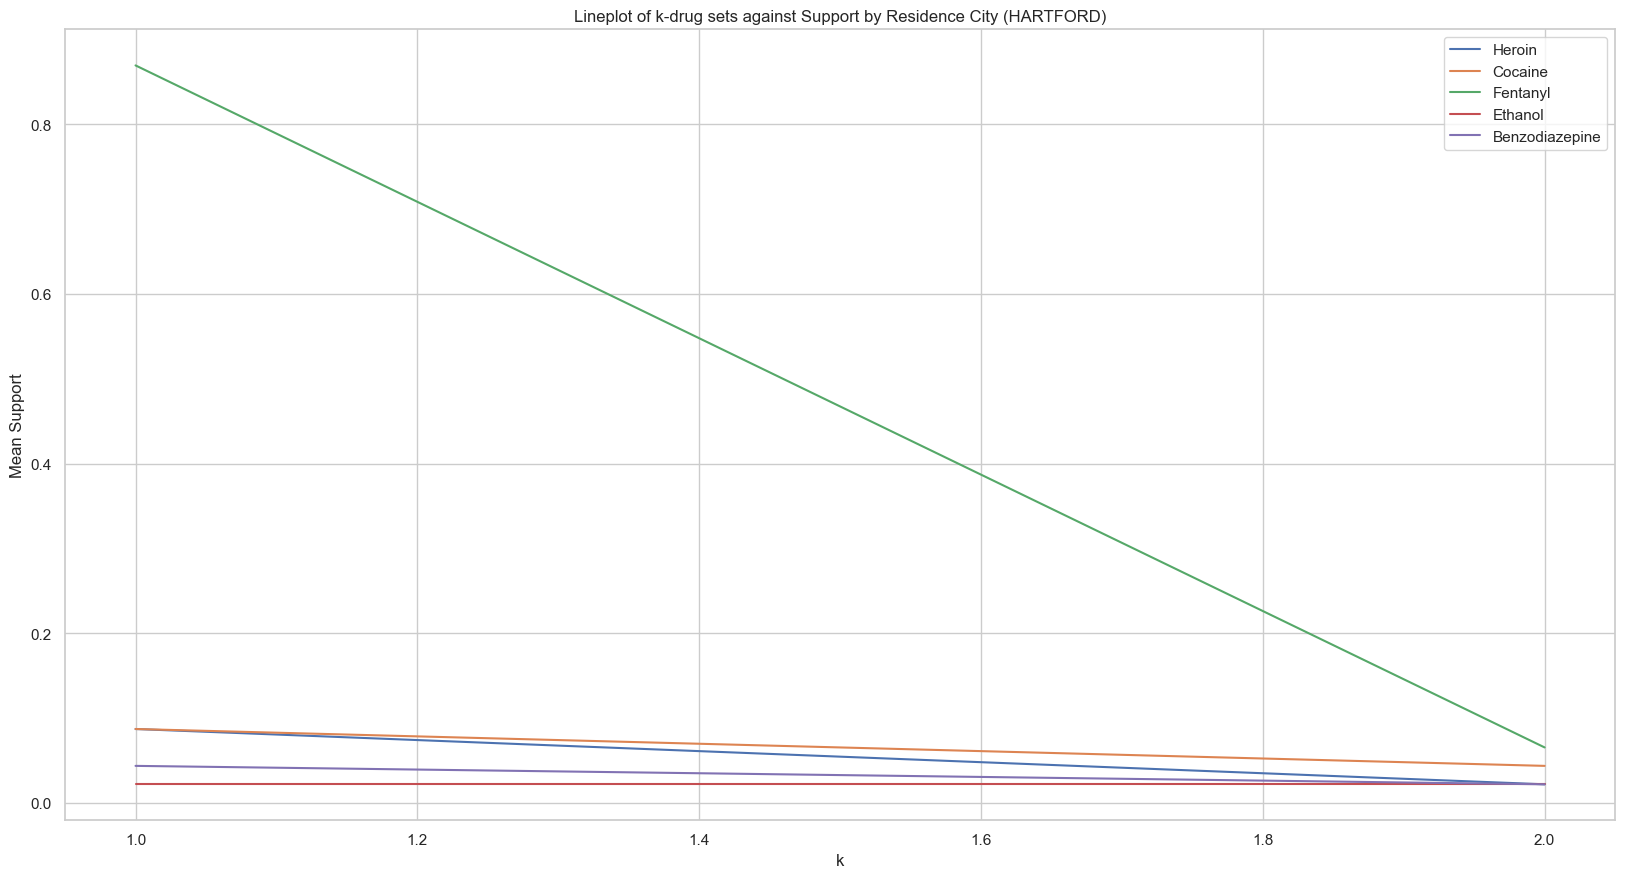

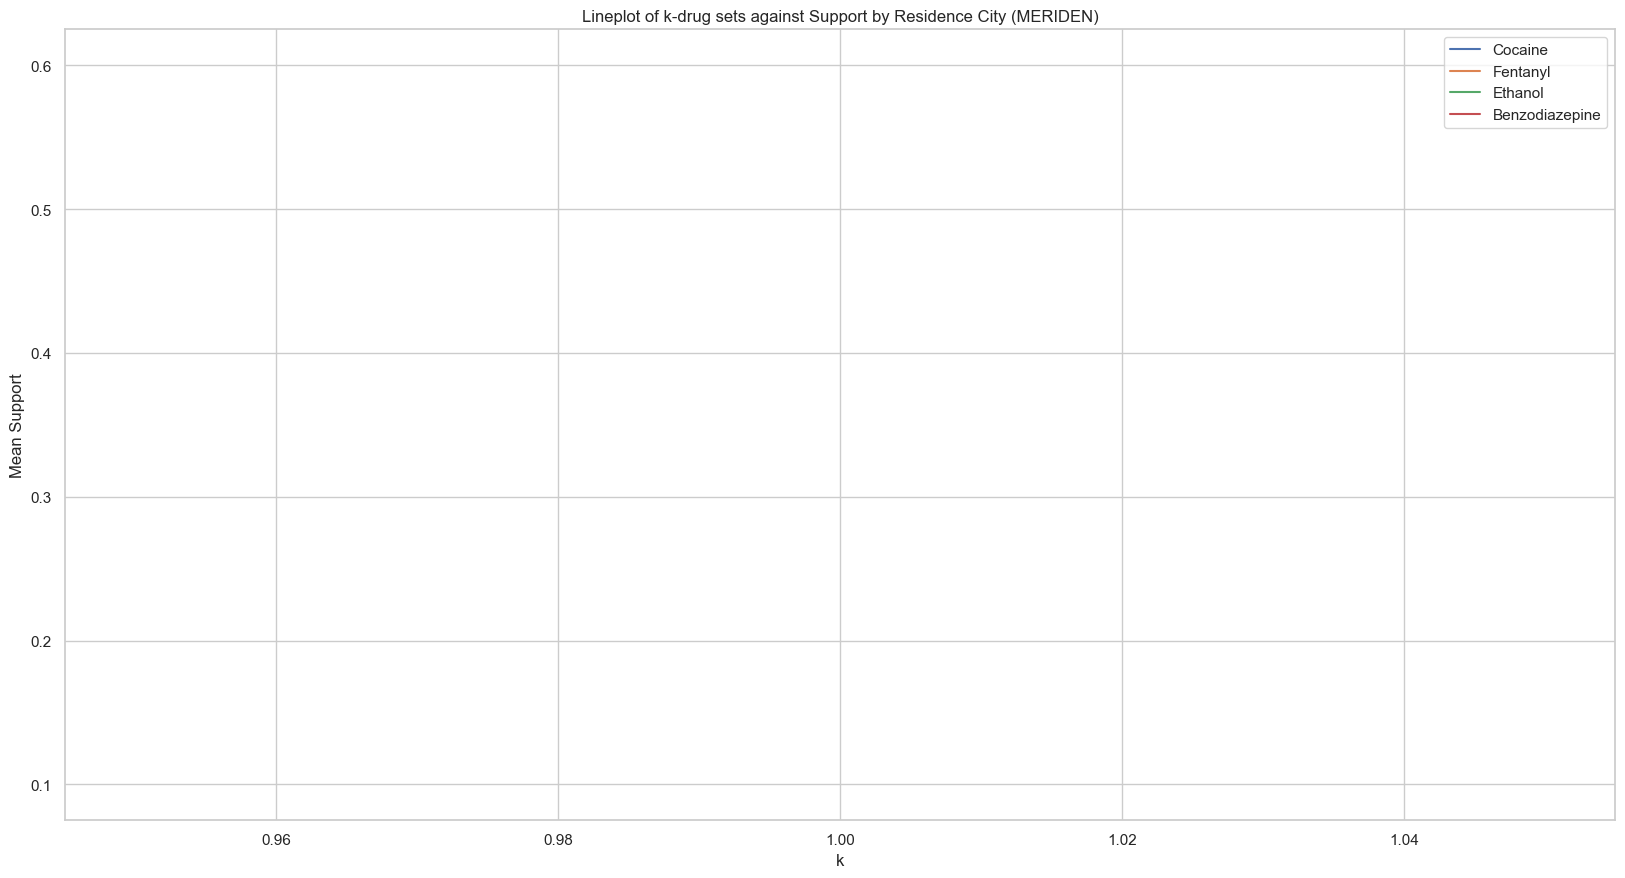

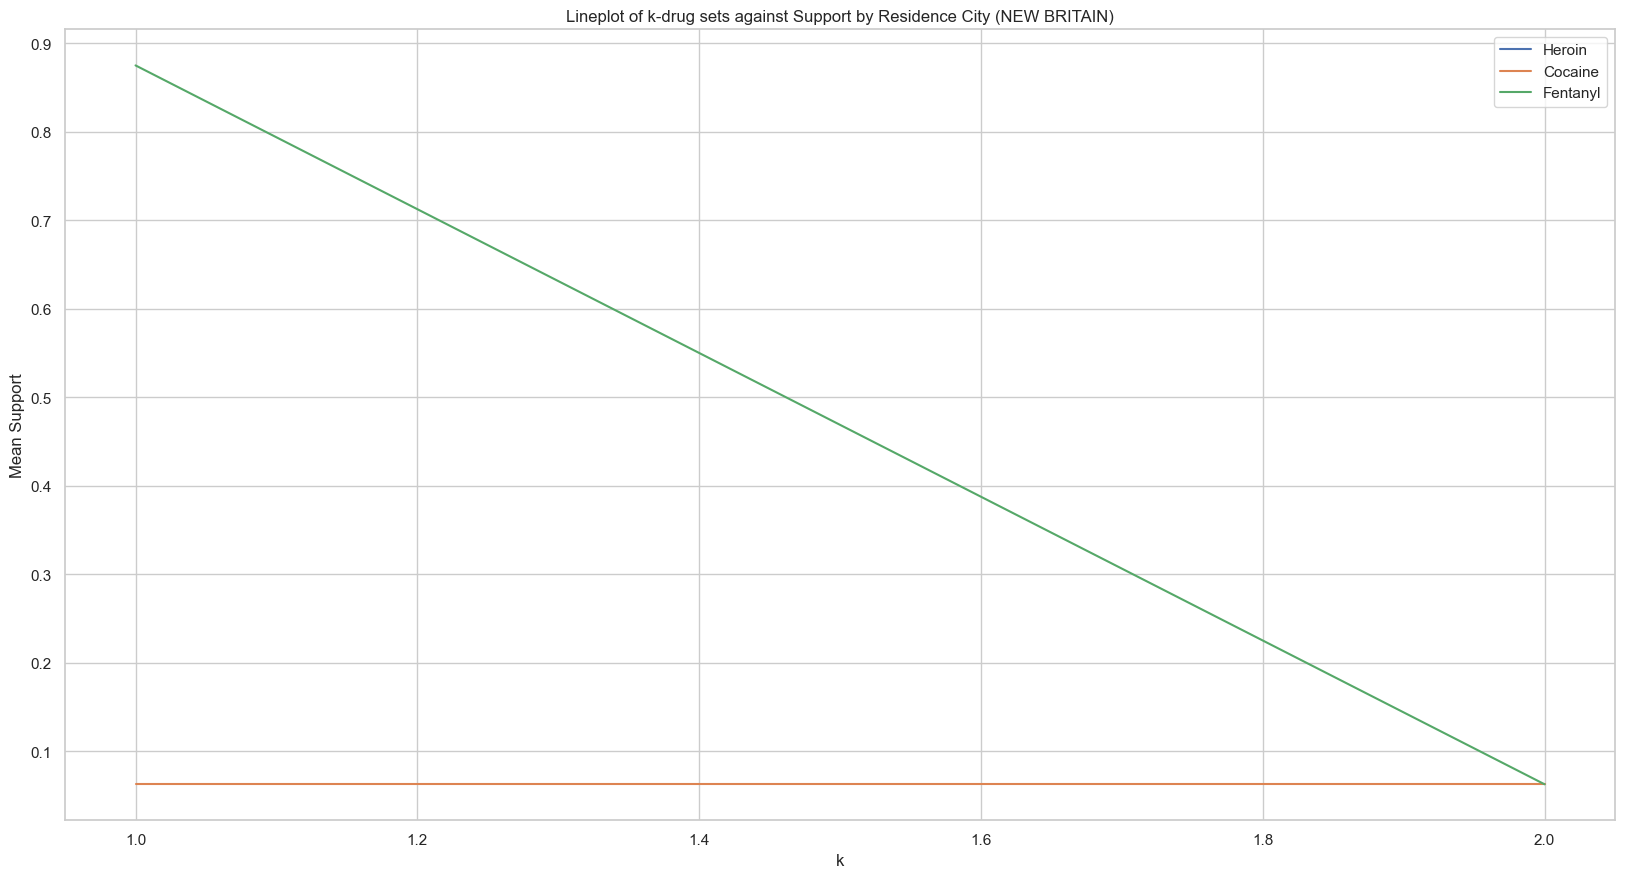

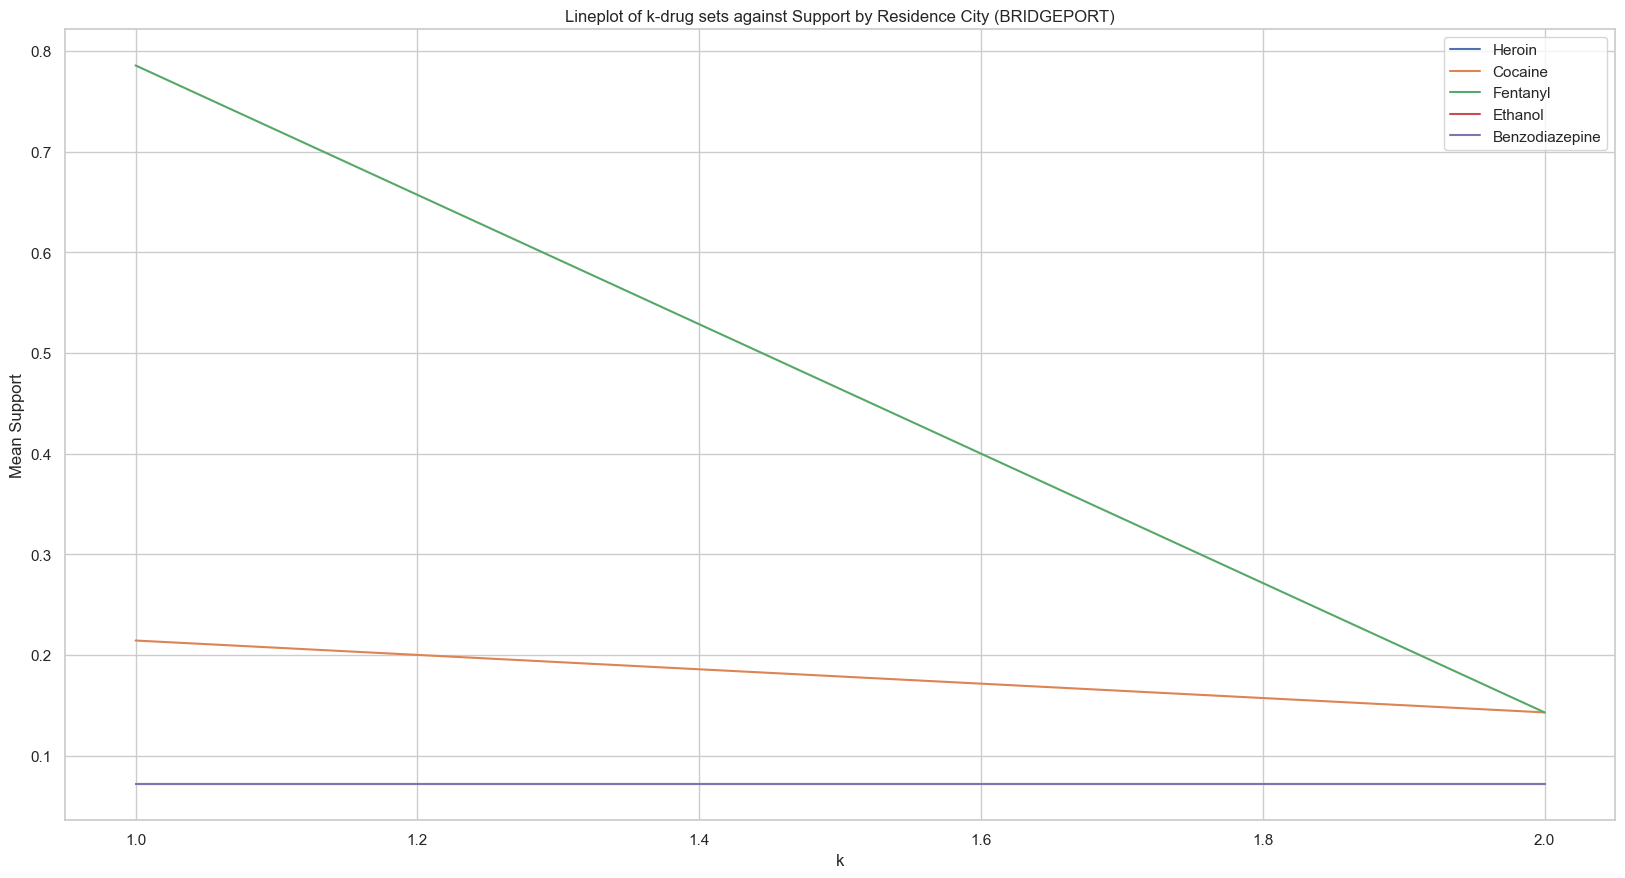

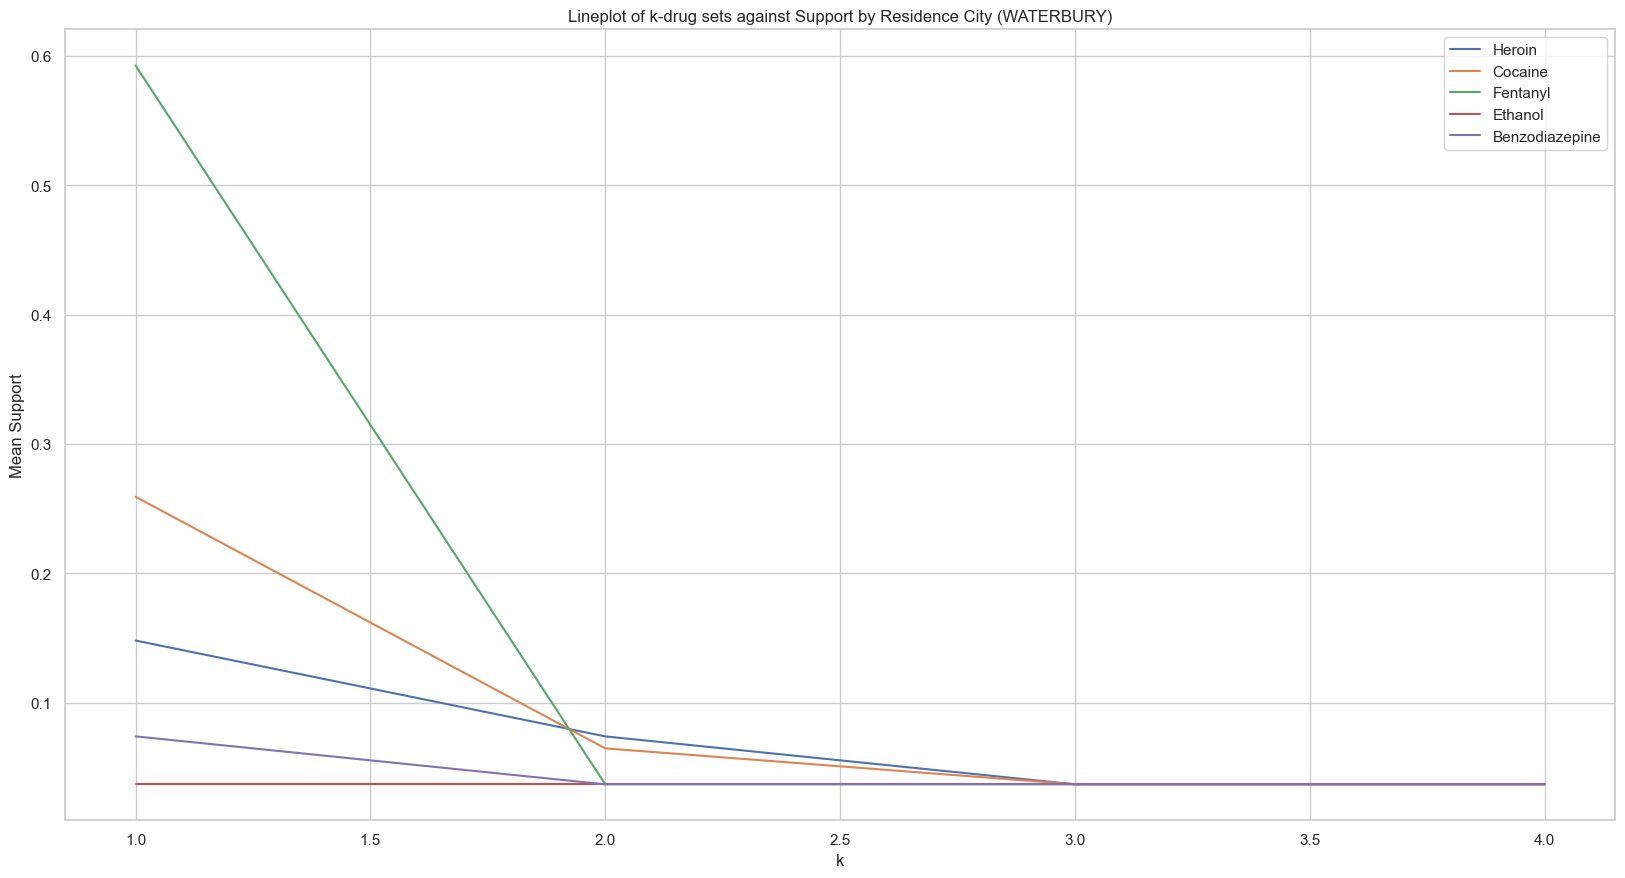

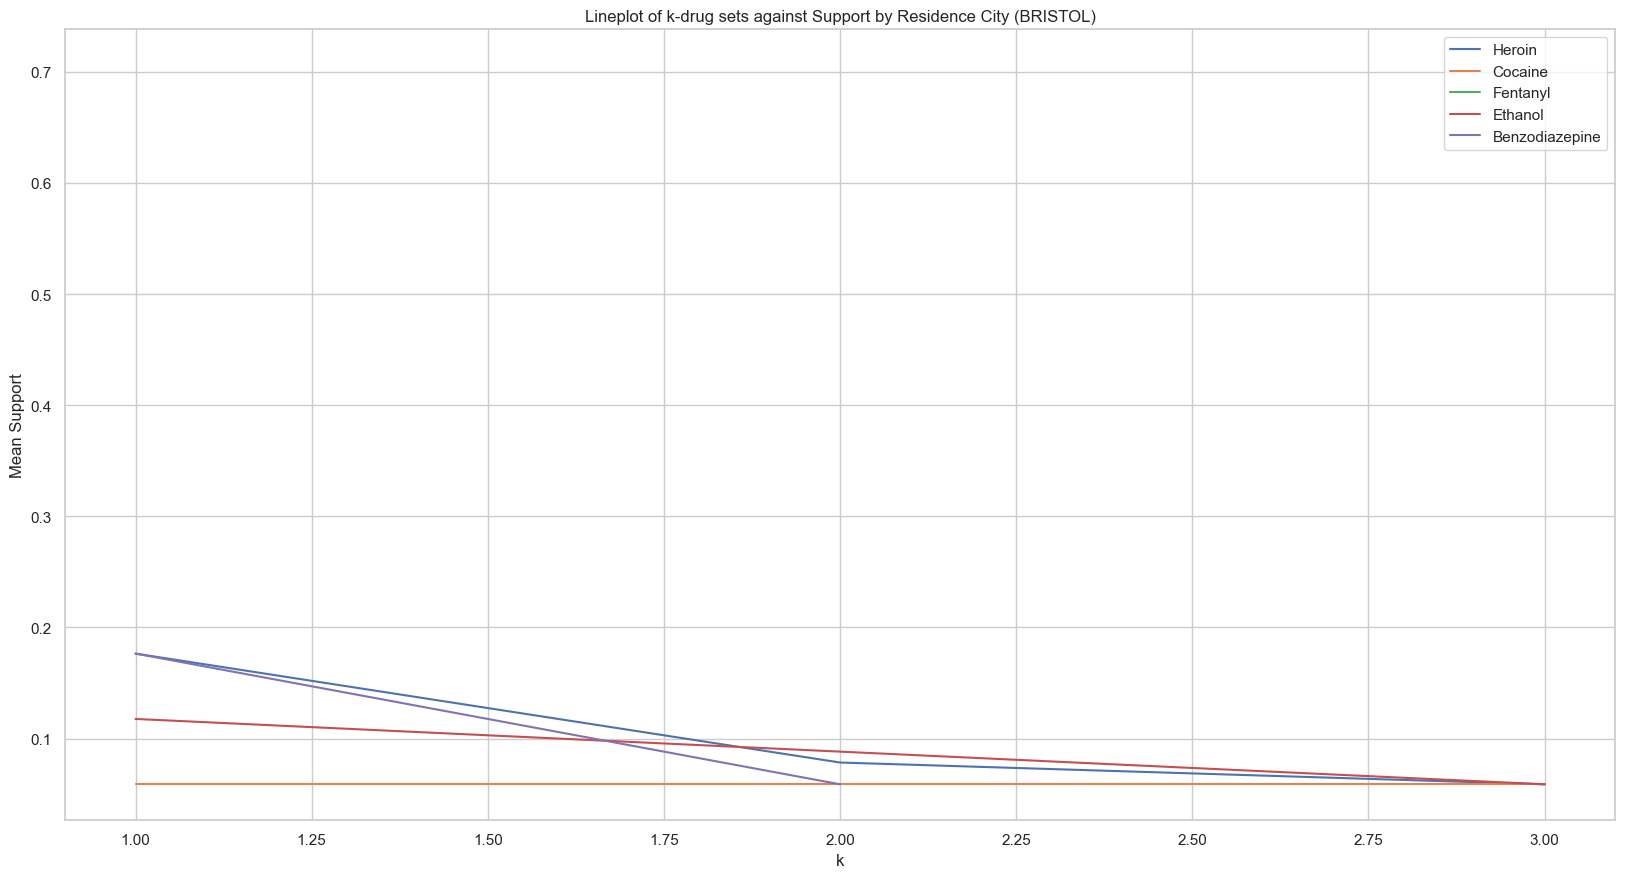

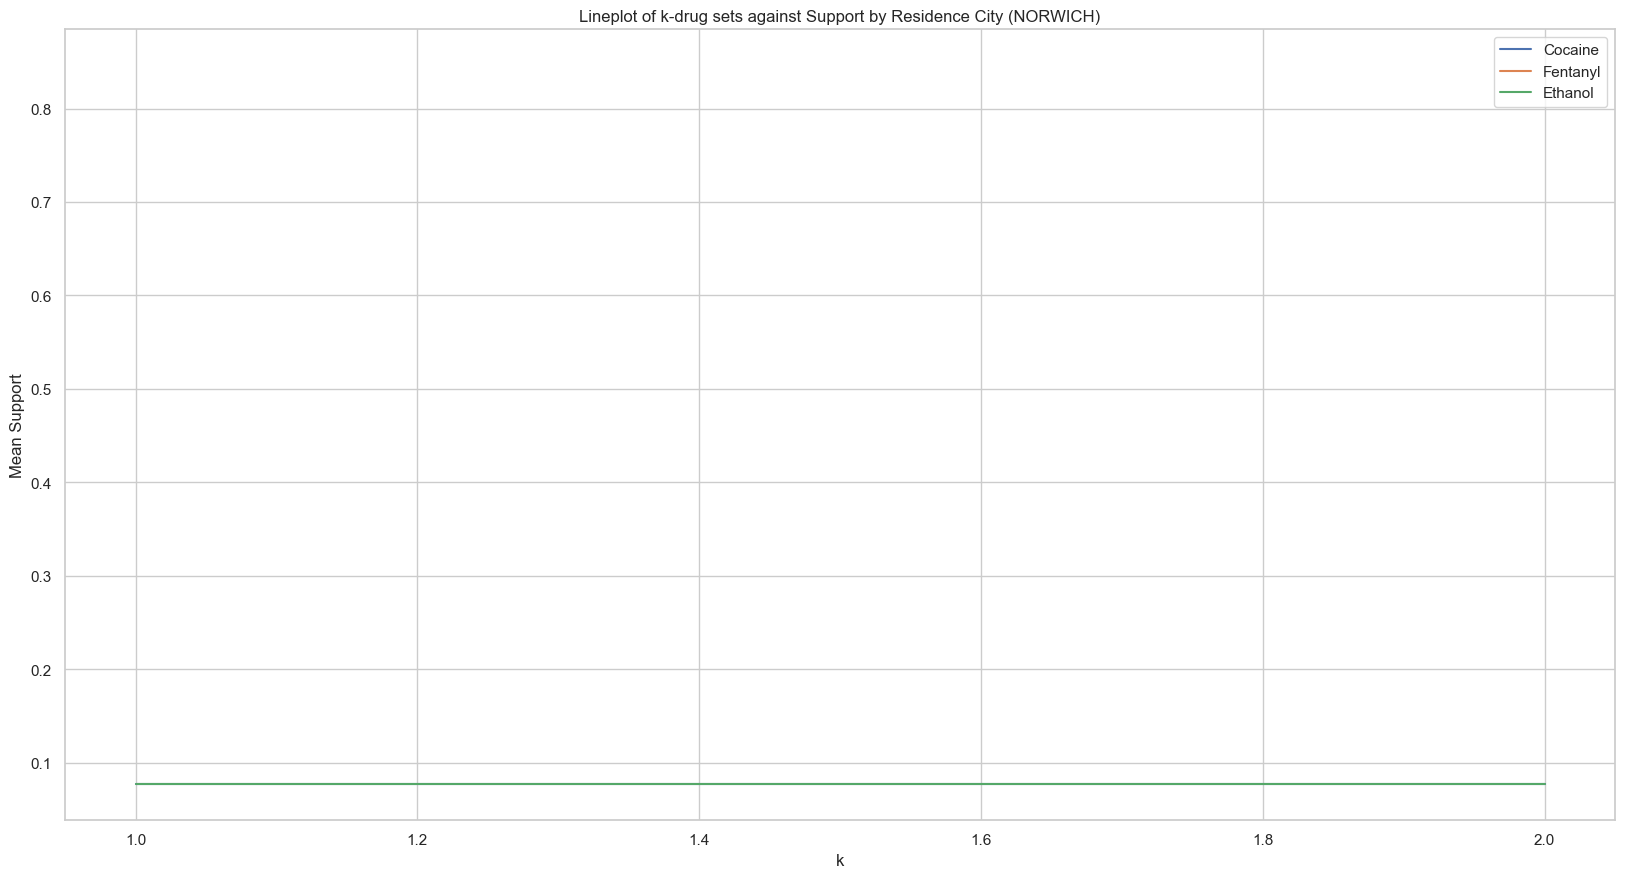

In [55]:
# Now that we have analysed each city indiviually, let's observe how do they behave under 'Cause of Death' and each of 
# the drugs.
# Adding city for grouping
tox_states_city = pd.concat([z, x], axis = 1)
measure_by_group('Residence City', tox_states_city, tox_states_city['Residence City'].unique(), 'supp',
                 list(tox_states_city.columns[:6]), tox_states_city)


In [56]:
# Looking at the group-wise counts of drug consumption by cities, to keep our analysis concise and to the point, we observe
# that Danbury, Meriden is the only city to not have such consumptions of drugs therefore, we can safely say that its not relevant
# at least to our prupose. Moreover, we observe that Hartofrd, New Haven, Waterbury, Bristol we observe many variations in 
# the support of many of the drugs and especially for the last three, we see the their "longeivty" aspect we explored 
# above. This shows that these cities relative to nelgible to almost no consumption cities like Norwich, New London
# depcit a prominent place for such drug consumption. Bridgeport, New Britain, on the other hand are interesting cases.
# Much of the drugs are not consumed, however, supp(Fentanyl|Bridgeport/New Britain) seems to be overwhelmingly greater than
# the rest. 

# To further evaluate on these observations we will be making good use of the geo-spatial visualisation we did in D1.

# For New Haven, Bristol, Hartford, Waterbury we observe >= 10 (40 for Hartford!) cases for MDT at the least and >= 5 cases for AFI.
# Thus, we can safely say that, though obvious that places where supp(n) is high, there are high chances of MDT. An 
# interesting point to note is that Bristol which has lowest of the Fentanyl support among these, still has 12 cases of MDT
# which is the more or less the same as compared to the rest. This may suggest that its not actually the quantity of each
# drug that matters but rather the number of drugs. Again it might seem obvious but good to see it empiricially. But 
# nontheless where we see high cases of MDT, we see a high support for fentanyl i.e. conf(Fentanyl --> MDT) is high.

# Not suprsingly Norwich, New Londen have barely 5 cases of MDT which is depicted by their relative low support and low n

# For Bridgeport, New Britain, we observe suprisingly high cases of MDT (>= 10) even though its n is quite less. 
# This could either be an anomaly or a confirmation of what we claimed earlier. 

# Perhaps, the most unique or one could say bizarre anomaly is that of Meriden. Its plot though empty, depciting little to
# no consumption of drugs, shows 6 cases of MDT and 4 cases of AFI. This may well be due to the fact that we had filtered
# many of the drugs as per our approach and hence lost valuable information. That was expected and hence for now, we will 
# consider it as an outlier. Later when we do cluster analysis, hopefully the picture becomes clear

In [57]:
# Cluster Analysis:
# Now that we have done the above analysis, its tome to check whether our filter was a wise choice or not. If indeed, the
# clusters formed match with our observations above, we have somehwat made a sensible choice otherwise, we would have to 
# accept it as it is and count under our limitations

In [58]:
# Let's recall our dataframe:
tox_cluster

Heroin  Cocaine  Fentanyl  Fentanyl Analogue  Oxycodone  Oxymorphone  \
0         0        0         1                  0          0            0   
1         1        0         0                  0          0            0   
2         0        0         1                  0          0            0   
3         0        0         0                  0          1            1   
4         0        0         1                  0          0            0   
..      ...      ...       ...                ...        ...          ...   
384       0        0         1                  0          0            0   
385       0        0         1                  0          0            0   
386       0        0         1                  0          0            0   
387       0        0         1                  0          0            0   
388       0        0         1                  0          0            0   

     Ethanol  Hydrocodone  Benzodiazepine  Methadone  ...  Xylazine  \
0          0            0               0          0  ...         0   
1          0            0               1          0  ...         0   
2          0            0               0          0  ...         0   
3          0            0               1          1  ...         0   
4          0            0               0          0  ...         0   
..       ...          ...             ...        ...  ...       ...   
384        0            0               0          0  ...         0   
385        0            0               0          0  ...         0   
386        0            0               0          0  ...         0   
387        0            0               0          0  ...         0   
388        0            0               0          0  ...         0   

     Gabapentin  Opiate NOS  Heroin/Morph/Codeine  Other Opioid  Any Opioid  \
0             0           0                     0             0           1   
1             0           0                     0             0           0   
2             0           0                     0             0           1   
3             0           0                     0             0           0   
4             0           0                     0             0           1   
..          ...         ...                   ...           ...         ...   
384           0           0                     0             0           1   
385           0           0                     0             0           1   
386           0           0                     0             0           1   
387           0           0                     0             0           1   
388           0           0                     0             0           1   

     Other  count  Residence City               Cause of Death  
0        0      2       WOODSTOCK  Acute Fentanyl Intoxication  
1        0      2          MONROE       Multiple Drug Toxicity  
2        0      2       NEW HAVEN  Acute Fentanyl Intoxication  
3        0      4       STRATFORD       Multiple Drug Toxicity  
4        0      2      NEW LONDON  Acute Fentanyl Intoxication  
..     ...    ...             ...                          ...  
384      0      2       WOODSTOCK  Acute Fentanyl Intoxication  
385      0      2         BRISTOL  Acute Fentanyl Intoxication  
386      0      2          HAMDEN  Acute Fentanyl Intoxication  
387      0      2        ROCKFALL  Acute Fentanyl Intoxication  
388      0      2      MANCHESTER  Acute Fentanyl Intoxication  

[389 rows x 25 columns]

In [59]:
cluster_data = pd.read_csv('state_wise_deaths.csv')
cluster_data.drop(cluster_data.columns[0], axis = 1, inplace = True)
cluster_data.rename(columns = {'city': 'Residence City'}, inplace = True)
cluster_data

Residence City  AFI  MDT
0         ANSONIA    2    2
1    BEACON FALLS    2    0
2          BERLIN    4    4
3         BETHANY    2    0
4          BETHEL    0    2
..            ...  ...  ...
89    WILLIMANTIC    2    3
90        WINDHAM    2    0
91        WINDSOR    6    0
92  WINDSOR LOCKS    7    2
93      WOODSTOCK    6    0

[94 rows x 3 columns]

In [60]:
city_encoded = pd.get_dummies(cluster_data['Residence City'])

# merge the encoded city names with the original pivot table
cluster_table_encoded = pd.concat([cluster_data, city_encoded], axis = 1)

# scale the pivot table
scaler = StandardScaler()
cluster_table_scaled = scaler.fit_transform(cluster_table_encoded.iloc[:, 1:3])

# perform clustering using K-means
kmeans = KMeans(n_clusters = 5, random_state = 0).fit(cluster_table_scaled)

# add the cluster labels to the pivot table
cluster_data['cluster_label'] = kmeans.labels_

# print the pivot table with cluster labels
print(cluster_data)

   Residence City  AFI  MDT  cluster_label
0         ANSONIA    2    2              0
1    BEACON FALLS    2    0              4
2          BERLIN    4    4              0
3         BETHANY    2    0              4
4          BETHEL    0    2              0
..            ...  ...  ...            ...
89    WILLIMANTIC    2    3              0
90        WINDHAM    2    0              4
91        WINDSOR    6    0              4
92  WINDSOR LOCKS    7    2              0
93      WOODSTOCK    6    0              4

[94 rows x 4 columns]


In [61]:
# Visualising the clusters
# However, there's a caveat.
# To cluster cities based on the srrying imilarity of their cause of death, you can use a clustering algorithm like DBSCAN. 
# However, since you only have two unique causes of death, clustering may not be the best approach. Therefore, we will be
# using the original dataframe which had relatively more cities. This will still work since the intrinsic
# clusters should not change theoretically if the similarity lies there. Moreover, for cluster visualisation, we will be 
# making use of latitude and longitude we had used in D1. Note this is just the above data but with the addition of the
# geographical coardinates

coard_data = pd.read_csv('geo_states.csv')
coard_data.drop(coard_data.columns[0:24], axis = 1, inplace = True)
coard_data

Residence City               Cause of Death   Latitude  Longitude
0        WOODSTOCK  Acute Fentanyl Intoxication  41.950652 -71.977285
1           MONROE       Multiple Drug Toxicity  41.331612 -73.206797
2        NEW HAVEN  Acute Fentanyl Intoxication  41.308252 -72.924161
3        STRATFORD       Multiple Drug Toxicity  41.200888 -73.131323
4       NEW LONDON  Acute Fentanyl Intoxication  41.355167 -72.099561
..             ...                          ...        ...        ...
384      WOODSTOCK  Acute Fentanyl Intoxication  41.950652 -71.977285
385        BRISTOL  Acute Fentanyl Intoxication  41.673037 -72.945791
386         HAMDEN  Acute Fentanyl Intoxication  41.382918 -72.907743
387       ROCKFALL  Acute Fentanyl Intoxication  41.530602 -72.695000
388     MANCHESTER  Acute Fentanyl Intoxication  41.770668 -72.520868

[389 rows x 4 columns]

In [62]:
# Merging with data to get coardinates for later visualisation of clusters

coard_data.drop(['Cause of Death'], axis = 1, inplace = True)
coard_merged = pd.merge(cluster_data, coard_data, on = 'Residence City')
coard_merged

Residence City  AFI  MDT  cluster_label   Latitude  Longitude
0          ANSONIA    2    2              0  41.341980 -73.078296
1          ANSONIA    2    2              0  41.341980 -73.078296
2     BEACON FALLS    2    0              4  41.444336 -73.060658
3           BERLIN    4    4              0  41.626049 -72.749301
4           BERLIN    4    4              0  41.626049 -72.749301
..             ...  ...  ...            ...        ...        ...
384  WINDSOR LOCKS    7    2              0  41.924953 -72.627177
385  WINDSOR LOCKS    7    2              0  41.924953 -72.627177
386      WOODSTOCK    6    0              4  41.950652 -71.977285
387      WOODSTOCK    6    0              4  41.950652 -71.977285
388      WOODSTOCK    6    0              4  41.950652 -71.977285

[389 rows x 6 columns]

In [63]:
# dropping duplicates:
coard_merged.drop_duplicates(subset = 'Residence City', inplace = True)
coard_merged.reset_index(drop = True, inplace = True)
coard_merged

Residence City  AFI  MDT  cluster_label   Latitude  Longitude
0         ANSONIA    2    2              0  41.341980 -73.078296
1    BEACON FALLS    2    0              4  41.444336 -73.060658
2          BERLIN    4    4              0  41.626049 -72.749301
3         BETHANY    2    0              4  41.428339 -72.994834
4          BETHEL    0    2              0  41.371727 -73.407448
..            ...  ...  ...            ...        ...        ...
89    WILLIMANTIC    2    3              0  41.711724 -72.211975
90        WINDHAM    2    0              4  41.699744 -72.157703
91        WINDSOR    6    0              4  41.852781 -72.643790
92  WINDSOR LOCKS    7    2              0  41.924953 -72.627177
93      WOODSTOCK    6    0              4  41.950652 -71.977285

[94 rows x 6 columns]

In [64]:
import folium

# K-Means

# create a map centered at the geographical center of the US
m = folium.Map(location = [41.6, -72.7], zoom_start = 9)

# define a list of colors for 10 clusters
colors = ['red', 'blue', 'green', 'orange', 'purple']

# add a marker for each city with a different color for different clusters
for i, row in coard_merged.iterrows():
    color = colors[row['cluster_label']]
    if row['MDT'] and row['AFI'] >= 2:
        popup = f'City: {row["Residence City"]}, MDT = {row["MDT"]}, AFI = {row["AFI"]}'
        folium.Marker(location = [row['Latitude'], row['Longitude']], popup = popup, icon = folium.Icon(color=color)).add_to(m)

# display the map
m


In [65]:
# We can definetly see some cluster being formed right in the centre as per our previous observations hence, we might 
# be able to overgo our assumption for doing 1). Note: We also see a dense cluster being formed towards south-west 
# where we see some hints of cities we previously said are unsure where they belong. Note: Cities of the same clusters but
# pretty far apart will be ignored as per our assumption

In [66]:
# The choice of clustering algorithm depends on the nature of your data and the problem you are trying to solve.

# K-modes is a clustering algorithm that is specifically designed for clustering categorical data, 
# whereas K-means is suitable for numerical data. If your data consists of categorical variables, K-modes might be a 
# better choice than K-means.

# DBSCAN is a density-based clustering algorithm that can be used to find clusters of arbitrary shape. 
# It can also identify outliers in the data. DBSCAN is a good choice when the clusters are not well-separated or 
# when the data is noisy.

In [67]:
# Kmodes
from kmodes.kmodes import KModes

# Define the number of clusters
n_clusters = 5

# Create an instance of the KModes algorithm
km = KModes(n_clusters = n_clusters)

# Fit the algorithm to the data
cluster_labels = km.fit_predict(cluster_table_scaled)

# Add the cluster labels to the dataframe
cluster_data['Cluster Kmode'] = cluster_labels
coard_merged['Cluster Kmode'] = cluster_labels

# Visualisation with KModes clustering
# create a map centered at the geographical center of the US
m = folium.Map(location = [41.6, -72.7], zoom_start = 9)

# define a list of colors for 10 clusters
colors = ['red', 'blue', 'green', 'orange', 'purple']

# add a marker for each city with a different color for different clusters
for i, row in coard_merged.iterrows():
    color = colors[row['Cluster Kmode']]
    if row['MDT'] and row['AFI'] >= 2:
        popup = f'City: {row["Residence City"]}, MDT = {row["MDT"]}, AFI = {row["AFI"]}'
        folium.Marker(location = [row['Latitude'], row['Longitude']], popup = popup, icon = folium.Icon(color=color)).add_to(m)

# display the map
m


In [68]:
# DBSCAN
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.5, min_samples = 7)

# Fit the algorithm to the data

cluster_labels = dbscan.fit_predict(cluster_table_scaled)

# Add the cluster labels to the dataframe
cluster_data['Cluster DBSCAN'] = cluster_labels
coard_merged['Cluster DBSCAN'] = cluster_labels

# Visualisation with KModes clustering
# create a map centered at the geographical center of the US
m = folium.Map(location = [41.6, -72.7], zoom_start = 9)

# define a list of colors for 10 clusters
colors = ['red', 'blue', 'green', 'orange', 'purple']

# add a marker for each city with a different color for different clusters
for i, row in coard_merged.iterrows():
    color = colors[row['Cluster DBSCAN']]
    if row['MDT'] and row['AFI'] >= 2:
        popup = f'City: {row["Residence City"]}, MDT = {row["MDT"]}, AFI = {row["AFI"]}'
        folium.Marker(location = [row['Latitude'], row['Longitude']], popup = popup, icon = folium.Icon(color=color)).add_to(m)

# display the map
m


In [69]:
m.save("map.html")


In [75]:
# Denset cluster being formed in the centre (denoted by A-pink color) for all three algorithms. Plus we are now sure of the 
# claim we made in D1. conf(A→{MDT⇑,AFI⇑}) i.e., if the city is in cluster A then its likely it 
# has a high instances of deaths from MDT and AFI

In [76]:
# Time series analysis
# Before we get into the classic support/conf wise analysis of drugs/death types by year, let's recall a simple graph we
# had made in D1, showing number of deaths by year


![My Image](death_year.png)

In [113]:
# Now let's get the dataset which includes toxicity report and year and convert it into ECLAT

tox_year = pd.read_csv('tox_year.csv')
tox_year.drop(tox_year.columns[0], axis = 1, inplace = True)
tox_year
# for city in tox_states['Residence City'].unique():
#     tox_states[city] = np.where(tox_states['Residence City'] == city, 1, 0)
# for cause in tox_states['Cause of Death'].unique():
#     tox_states[cause] = np.where(tox_states['Cause of Death'] == city, 1, 0)
# tox_states

Heroin  Cocaine  Fentanyl  Fentanyl Analogue  Oxycodone  Oxymorphone  \
0          0        1         0                  0          0            0   
1          1        0         0                  0          0            0   
2          1        0         0                  0          0            0   
3          1        0         0                  0          0            0   
4          0        0         1                  0          0            0   
...      ...      ...       ...                ...        ...          ...   
9197       0        1         0                  0          1            0   
9198       0        1         0                  0          0            0   
9199       0        1         0                  0          0            0   
9200       0        1         0                  0          0            0   
9201       0        0         1                  0          0            0   

      Ethanol  Hydrocodone  Benzodiazepine  Methadone  ...  \
0           0            0               0          0  ...   
1           0            0               0          0  ...   
2           0            0               0          0  ...   
3           0            0               0          0  ...   
4           0            0               0          0  ...   
...       ...          ...             ...        ...  ...   
9197        0            0               0          0  ...   
9198        1            0               0          0  ...   
9199        0            0               0          0  ...   
9200        0            0               0          0  ...   
9201        0            0               0          1  ...   

      Morphine (Not Heroin)  Xylazine  Gabapentin  Opiate NOS  \
0                         0         0           0           0   
1                         0         0           0           0   
2                         0         0           0           0   
3                         0         0           0           0   
4                         0         0           0           0   
...                     ...       ...         ...         ...   
9197                      0         0           0           0   
9198                      0         0           0           0   
9199                      0         0           1           0   
9200                      0         0           0           0   
9201                      0         1           0           0   

      Heroin/Morph/Codeine  Other Opioid  Any Opioid  Other  count  year  
0                        0             0           0      0      1  2012  
1                        0             0           0      0      1  2012  
2                        0             0           0      0      1  2014  
3                        0             0           0      0      1  2014  
4                        0             0           1      0      2  2016  
...                    ...           ...         ...    ...    ...   ...  
9197                     0             0           1      0      3  2021  
9198                     0             0           0      0      2  2021  
9199                     0             0           0      0      2  2021  
9200                     0             0           0      0      1  2021  
9201                     0             0           1      0      4  2021  

[9202 rows x 24 columns]

In [114]:
# First to reduce the dimensions of the data let's choose the same drugs we chose for when we were doing district level 
# analysis i.e.
retain_year = ['Heroin', 'Cocaine', 'Fentanyl', 'Fentanyl Analogue', 'Ethanol', 'Benzodiazepine', 'Heroin/Morph/Codeine', 'year']
col = [col for col in tox_year.columns if col not in retain_year]

tox_year.drop(columns = col, axis = 1, inplace = True)

# Creating a copy before ECLAT to be later used in group wise analysis
tox_unfiltered_year = tox_year.copy()

tox_year

Heroin  Cocaine  Fentanyl  Fentanyl Analogue  Ethanol  Benzodiazepine  \
0          0        1         0                  0        0               0   
1          1        0         0                  0        0               0   
2          1        0         0                  0        0               0   
3          1        0         0                  0        0               0   
4          0        0         1                  0        0               0   
...      ...      ...       ...                ...      ...             ...   
9197       0        1         0                  0        0               0   
9198       0        1         0                  0        1               0   
9199       0        1         0                  0        0               0   
9200       0        1         0                  0        0               0   
9201       0        0         1                  0        0               0   

      Heroin/Morph/Codeine  year  
0                        0  2012  
1                        0  2012  
2                        0  2014  
3                        0  2014  
4                        0  2016  
...                    ...   ...  
9197                     0  2021  
9198                     0  2021  
9199                     0  2021  
9200                     0  2021  
9201                     0  2021  

[9202 rows x 8 columns]

In [115]:
# Let's convert it into ECLAT
for year in tox_year['year'].unique():
    tox_year[year] = np.where(tox_year['year'] == year, 1, 0)
tox_year

Heroin  Cocaine  Fentanyl  Fentanyl Analogue  Ethanol  Benzodiazepine  \
0          0        1         0                  0        0               0   
1          1        0         0                  0        0               0   
2          1        0         0                  0        0               0   
3          1        0         0                  0        0               0   
4          0        0         1                  0        0               0   
...      ...      ...       ...                ...      ...             ...   
9197       0        1         0                  0        0               0   
9198       0        1         0                  0        1               0   
9199       0        1         0                  0        0               0   
9200       0        1         0                  0        0               0   
9201       0        0         1                  0        0               0   

      Heroin/Morph/Codeine  year  2012  2014  2016  2017  2015  2018  2013  \
0                        0  2012     1     0     0     0     0     0     0   
1                        0  2012     1     0     0     0     0     0     0   
2                        0  2014     0     1     0     0     0     0     0   
3                        0  2014     0     1     0     0     0     0     0   
4                        0  2016     0     0     1     0     0     0     0   
...                    ...   ...   ...   ...   ...   ...   ...   ...   ...   
9197                     0  2021     0     0     0     0     0     0     0   
9198                     0  2021     0     0     0     0     0     0     0   
9199                     0  2021     0     0     0     0     0     0     0   
9200                     0  2021     0     0     0     0     0     0     0   
9201                     0  2021     0     0     0     0     0     0     0   

      2019  2020  2021  
0        0     0     0  
1        0     0     0  
2        0     0     0  
3        0     0     0  
4        0     0     0  
...    ...   ...   ...  
9197     0     0     1  
9198     0     0     1  
9199     0     0     1  
9200     0     0     1  
9201     0     0     1  

[9202 rows x 18 columns]

In [116]:
# Let's save the year column for use later:
year_col = tox_year['year']
# Drop year
tox_year.drop('year', axis = 1, inplace = True)
# Running FPM and Association Rule Mining and checking it indiviually first
freq_toxyear_sets = fpgrowth(tox_year, min_support = (0.001/100), use_colnames = True)
rules_toxyear_sets = association_rules(freq_toxyear_sets, metric = 'confidence', min_threshold = 0.001)

In [117]:
list(tox_year.columns[-10:])

[2012, 2014, 2016, 2017, 2015, 2018, 2013, 2019, 2020, 2021]

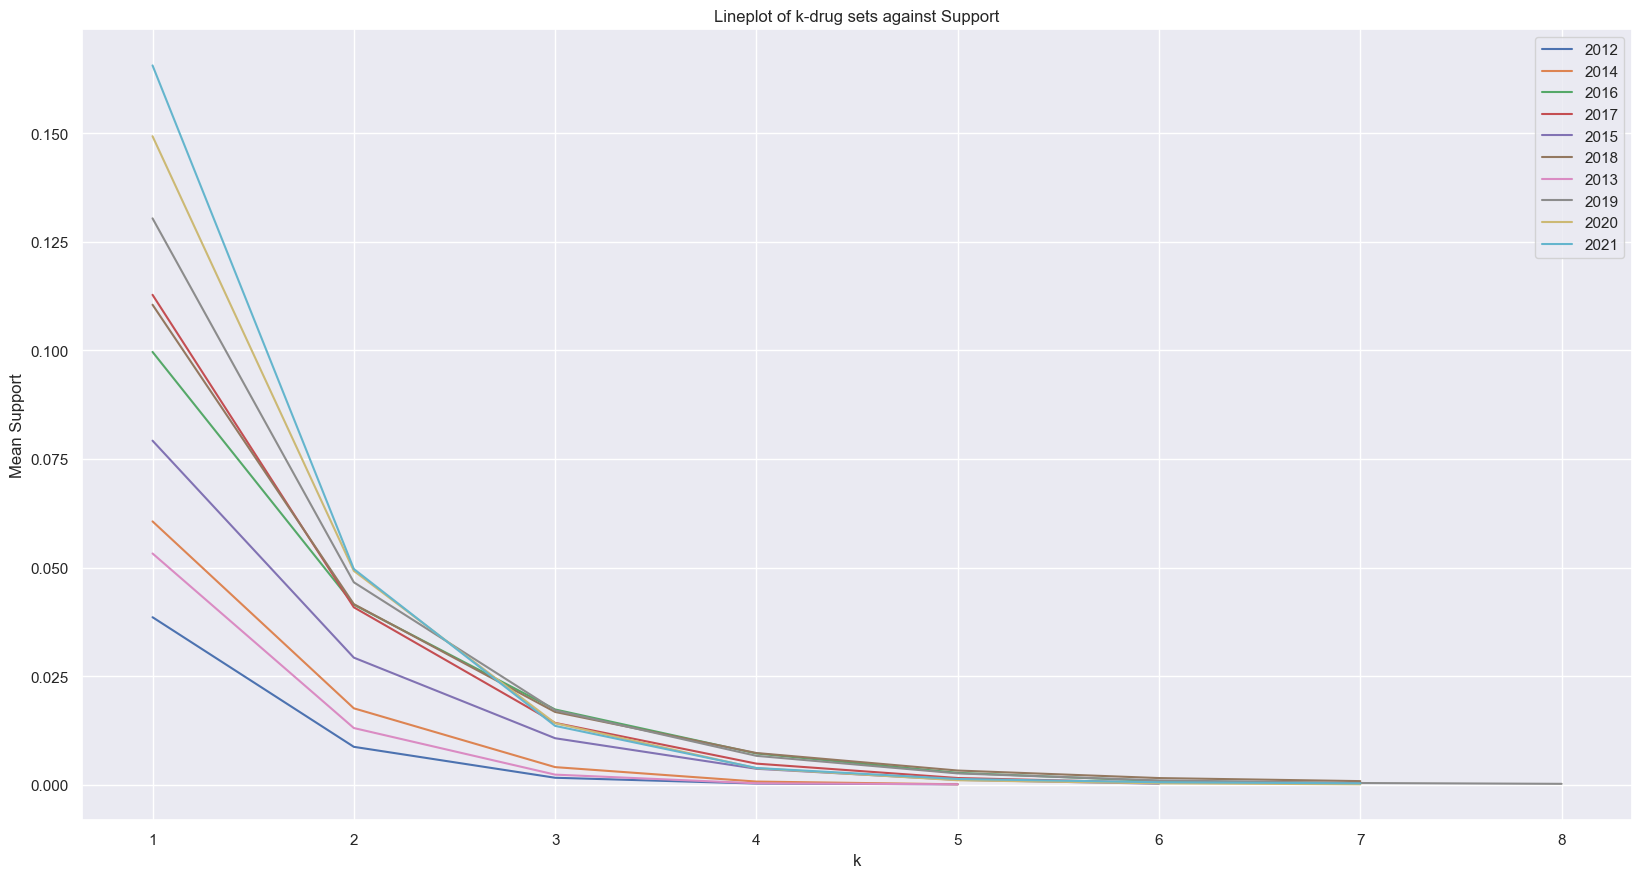

In [118]:
# Visualizing support
drug_supp_plot(freq_toxyear_sets, list(tox_year.columns[-10:]))

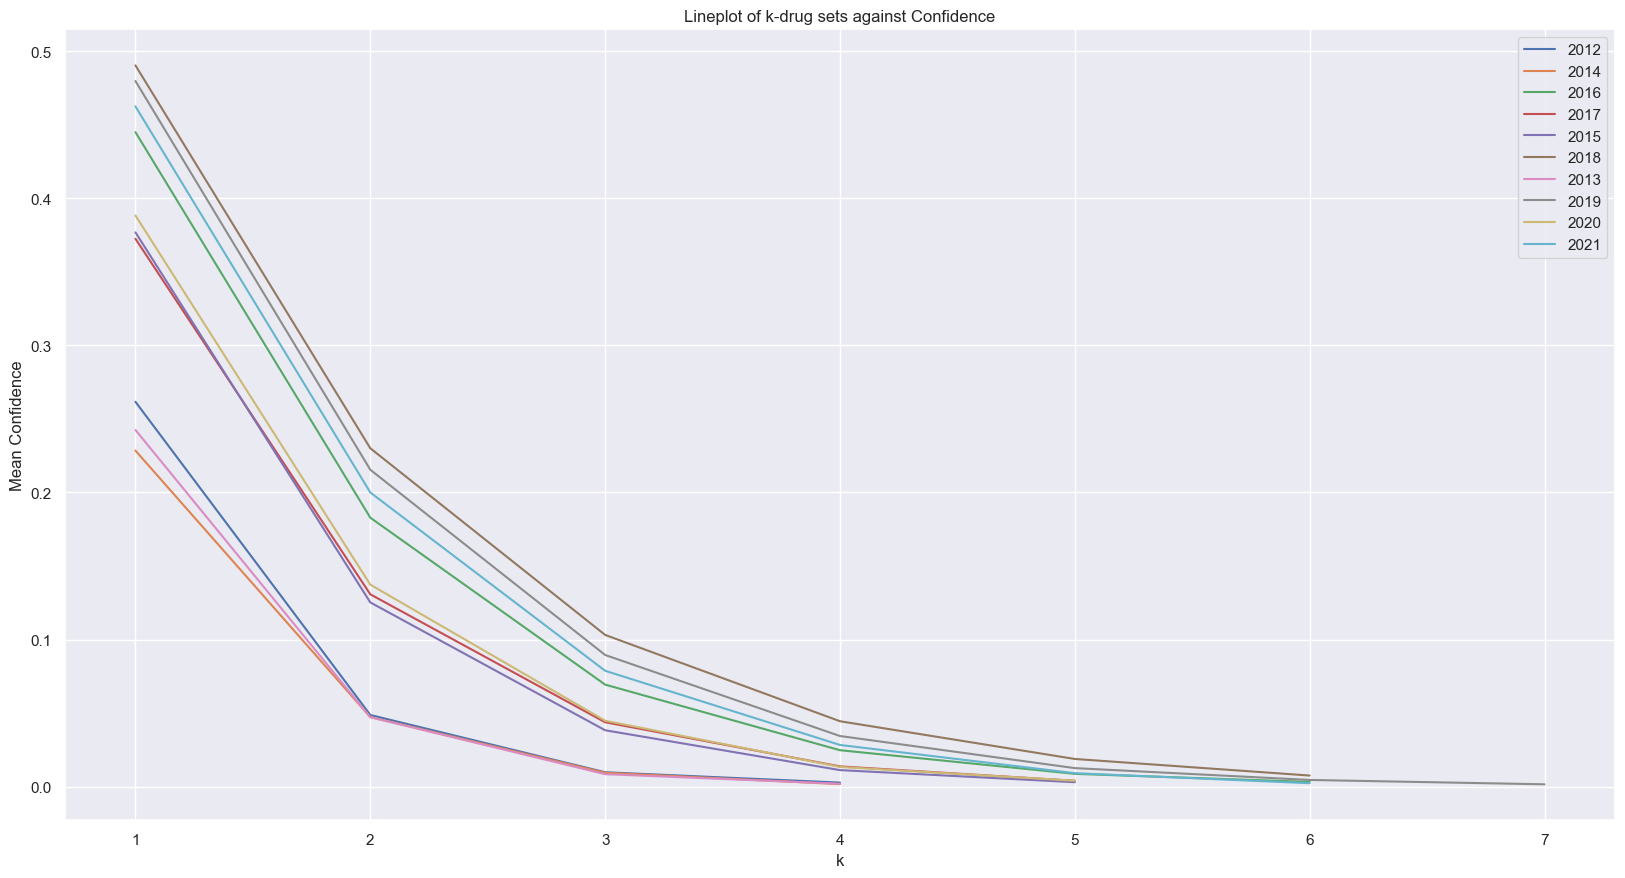

In [119]:
# Visualising Confidence
drug_conf_plot(rules_toxyear_sets, list(tox_year.columns[-10:]))

In [120]:
# Analysis: From the support graph, we can quickly see its a mirror image of the bar graph above. Hence, we can easily
# infer that most deaths take place in 2021 i.e. The supp(2021 | Number of Deaths) > supp(!2021 | Number of Deaths)

# However, as we have been doing so far, besides, support, we are also interested in the longevity i.e its influence in
# joint occuring frequent sets which we observe that 2019, 2020, 2021 have the highest. This may suggest a time when the 
# culture of consuming such drugs was at its peak. 

# This can also be observed from the confidence plot, which shows that 2019, 2020 and 2021 have the highest L.H.S confidence
# implying more the drugs (high n), higher the year i.e. conf(Year --> n) is greater for large n.

# However, this is not the end. We have yet to see its influence on the consumption of the main drugs we have filtered so
# far, specifed by retain_year variable. Once we have done that, we will be able to link our findings till now with 'Cause
# of Death', 'District' to check where, when and why did a particular drug was popular in consumption and correspondingly
# death_type by year which we have also determined to be the following from D1.

# Most common cause of death each year: year
# 2012         (2012, Multiple Drug Toxicity)
# 2013            (2013, Heroin Intoxication)
# 2014            (2014, Heroin Intoxication)
# 2015          (2015, Acute Heroin Toxicity)
# 2016    (2016, Acute Fentanyl Intoxication)
# 2017    (2017, Acute Fentanyl Intoxication)
# 2018    (2018, Acute Fentanyl Intoxication)
# 2019    (2019, Acute Fentanyl Intoxication)
# 2020    (2020, Acute Fentanyl Intoxication)
# 2021    (2021, Acute Fentanyl Intoxication)
# Name: Cause of Death, dtype: object

In [121]:
# Let's use the following dataframe

tox_unfiltered_year

Heroin  Cocaine  Fentanyl  Fentanyl Analogue  Ethanol  Benzodiazepine  \
0          0        1         0                  0        0               0   
1          1        0         0                  0        0               0   
2          1        0         0                  0        0               0   
3          1        0         0                  0        0               0   
4          0        0         1                  0        0               0   
...      ...      ...       ...                ...      ...             ...   
9197       0        1         0                  0        0               0   
9198       0        1         0                  0        1               0   
9199       0        1         0                  0        0               0   
9200       0        1         0                  0        0               0   
9201       0        0         1                  0        0               0   

      Heroin/Morph/Codeine  year  
0                        0  2012  
1                        0  2012  
2                        0  2014  
3                        0  2014  
4                        0  2016  
...                    ...   ...  
9197                     0  2021  
9198                     0  2021  
9199                     0  2021  
9200                     0  2021  
9201                     0  2021  

[9202 rows x 8 columns]

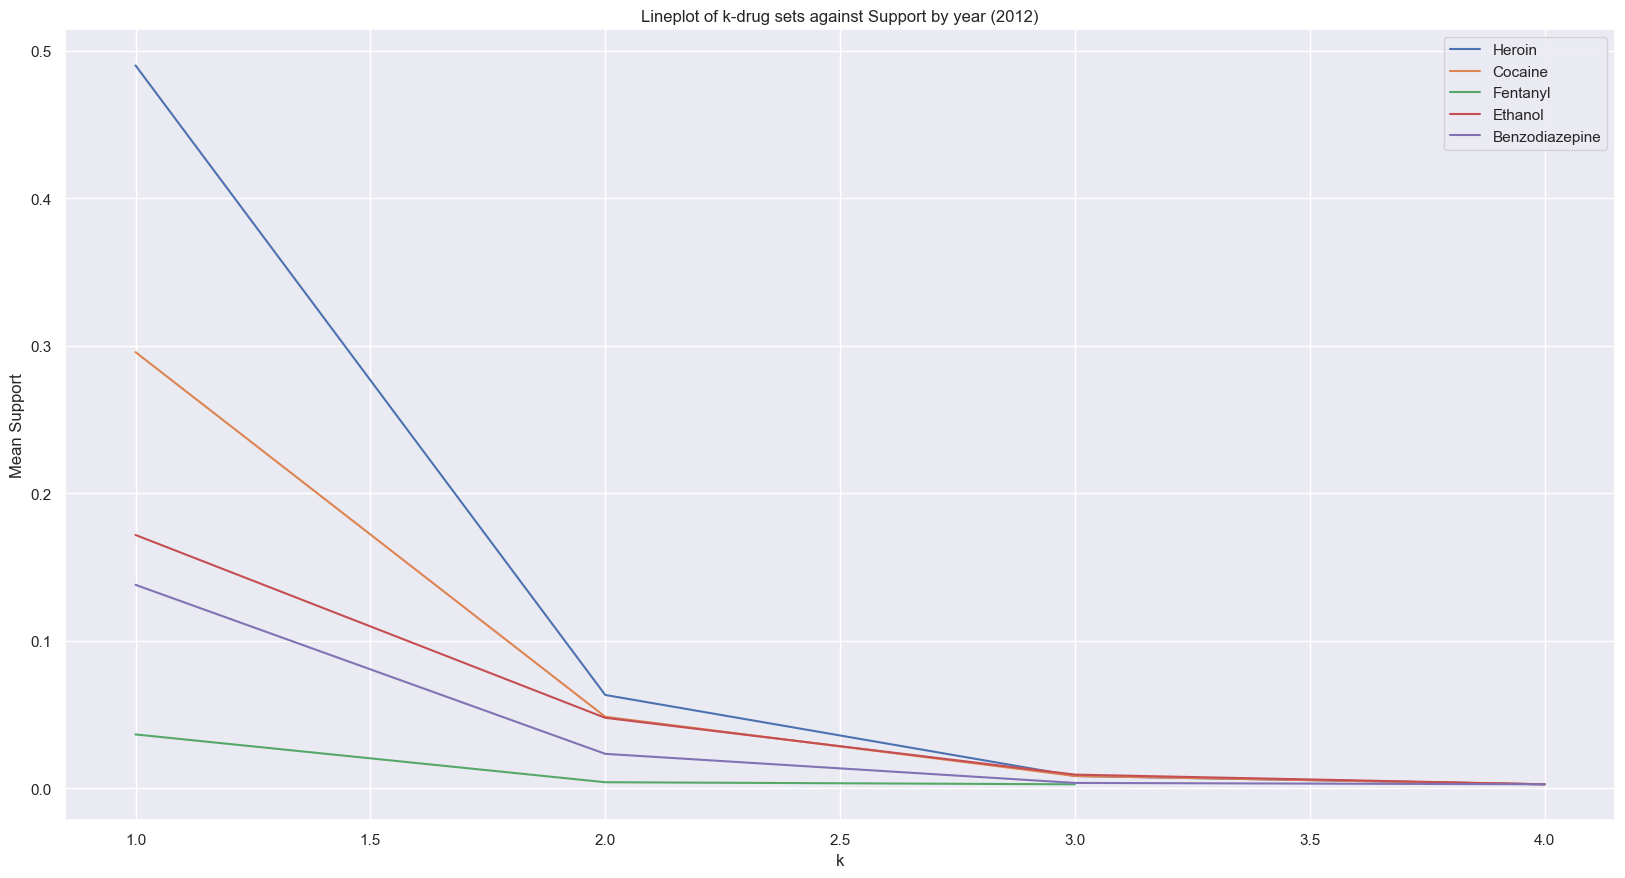

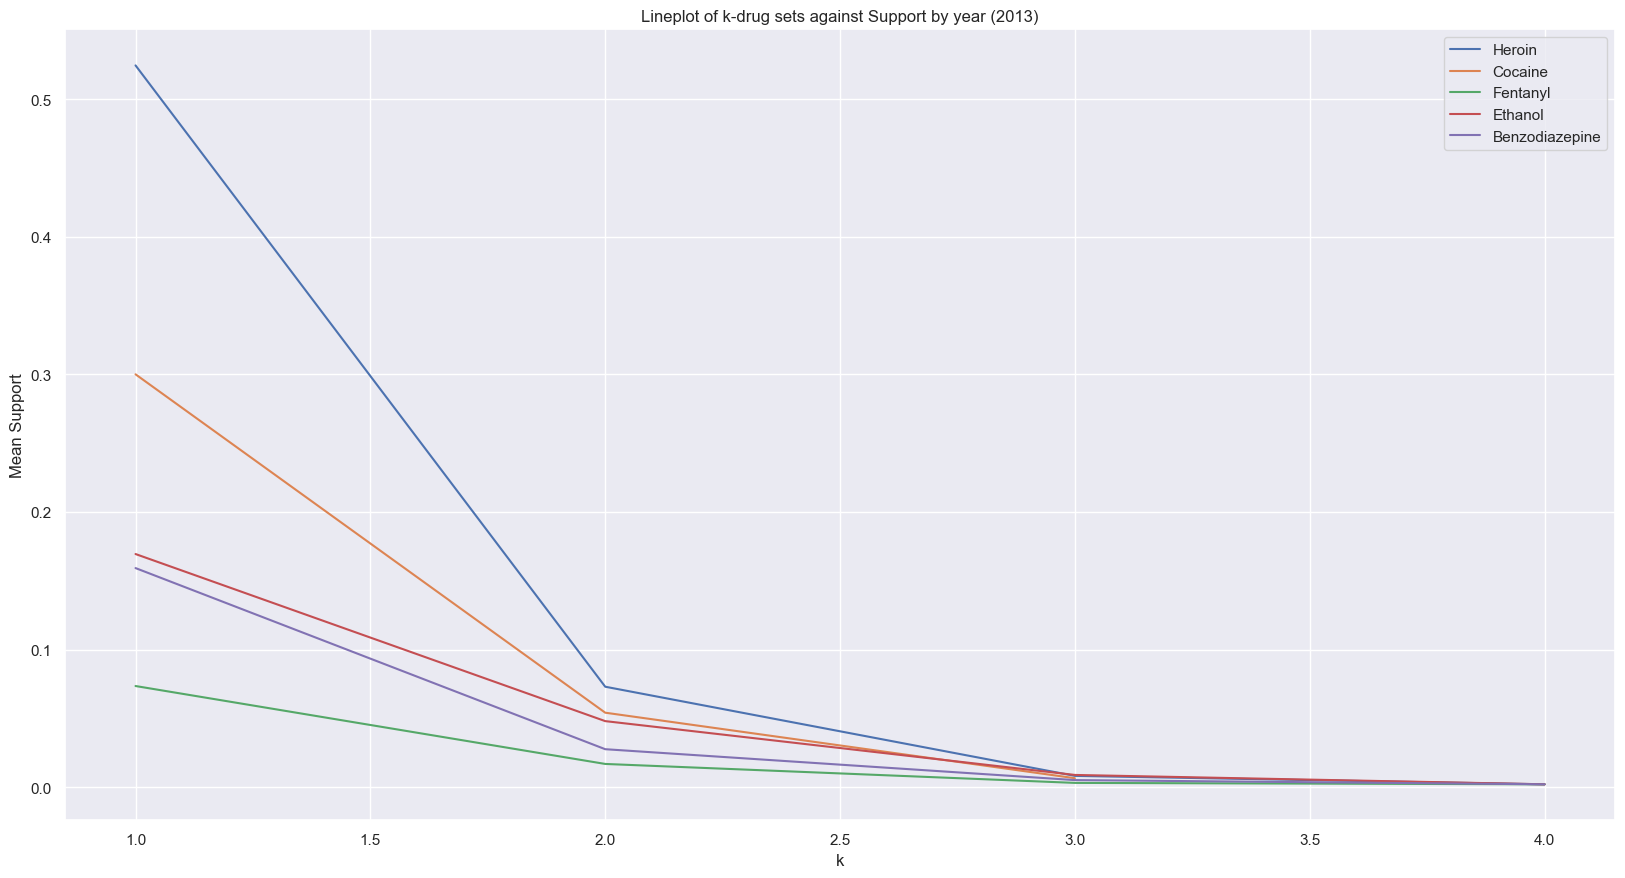

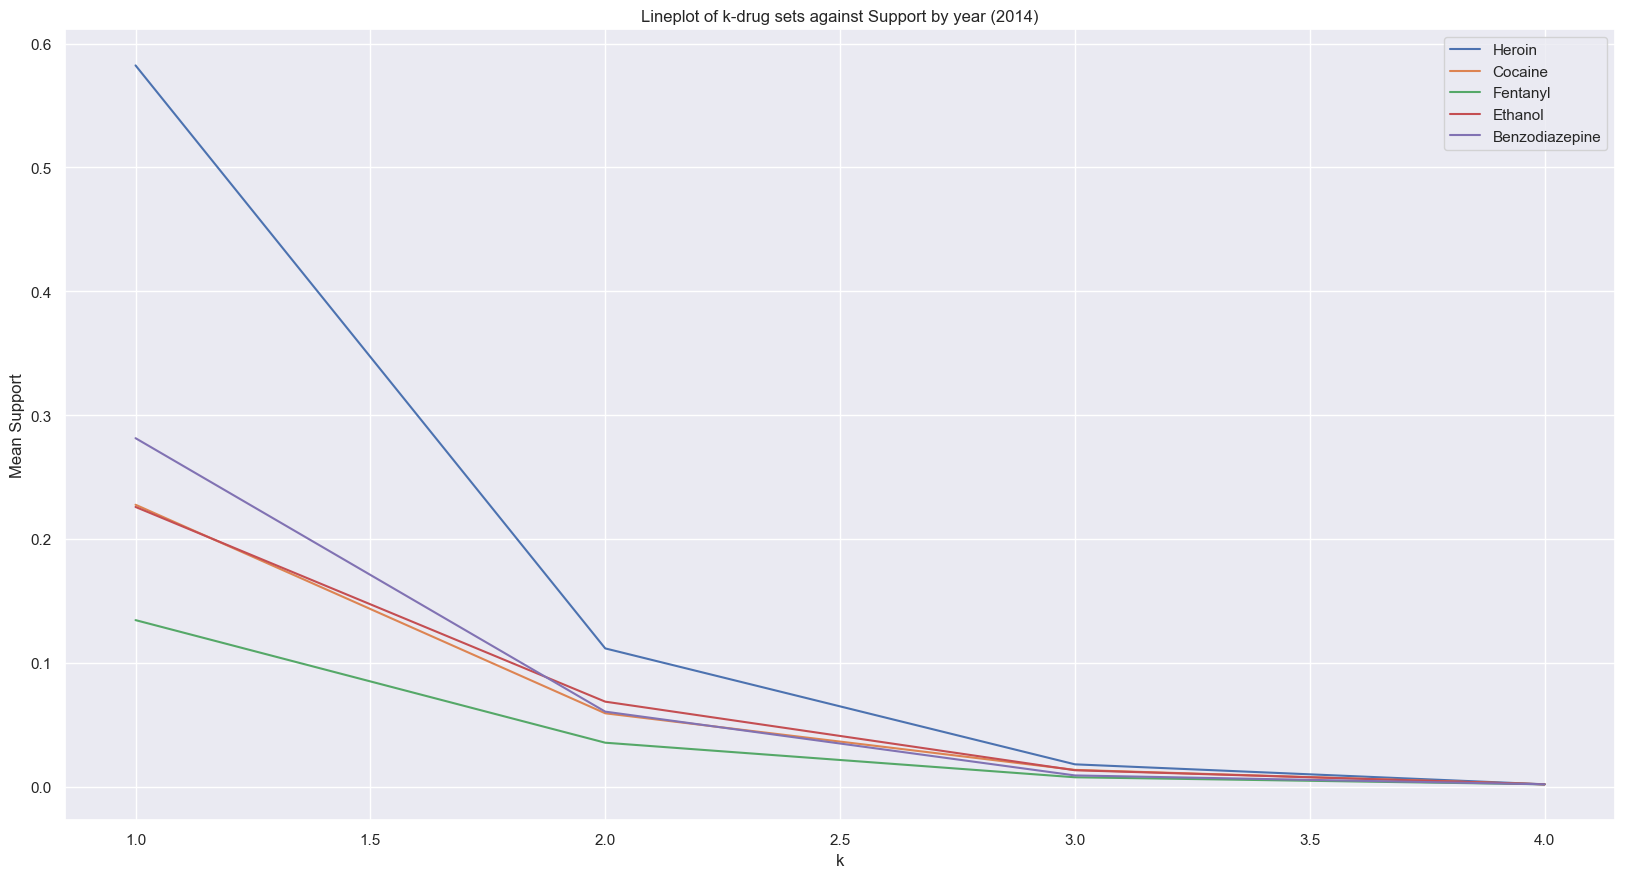

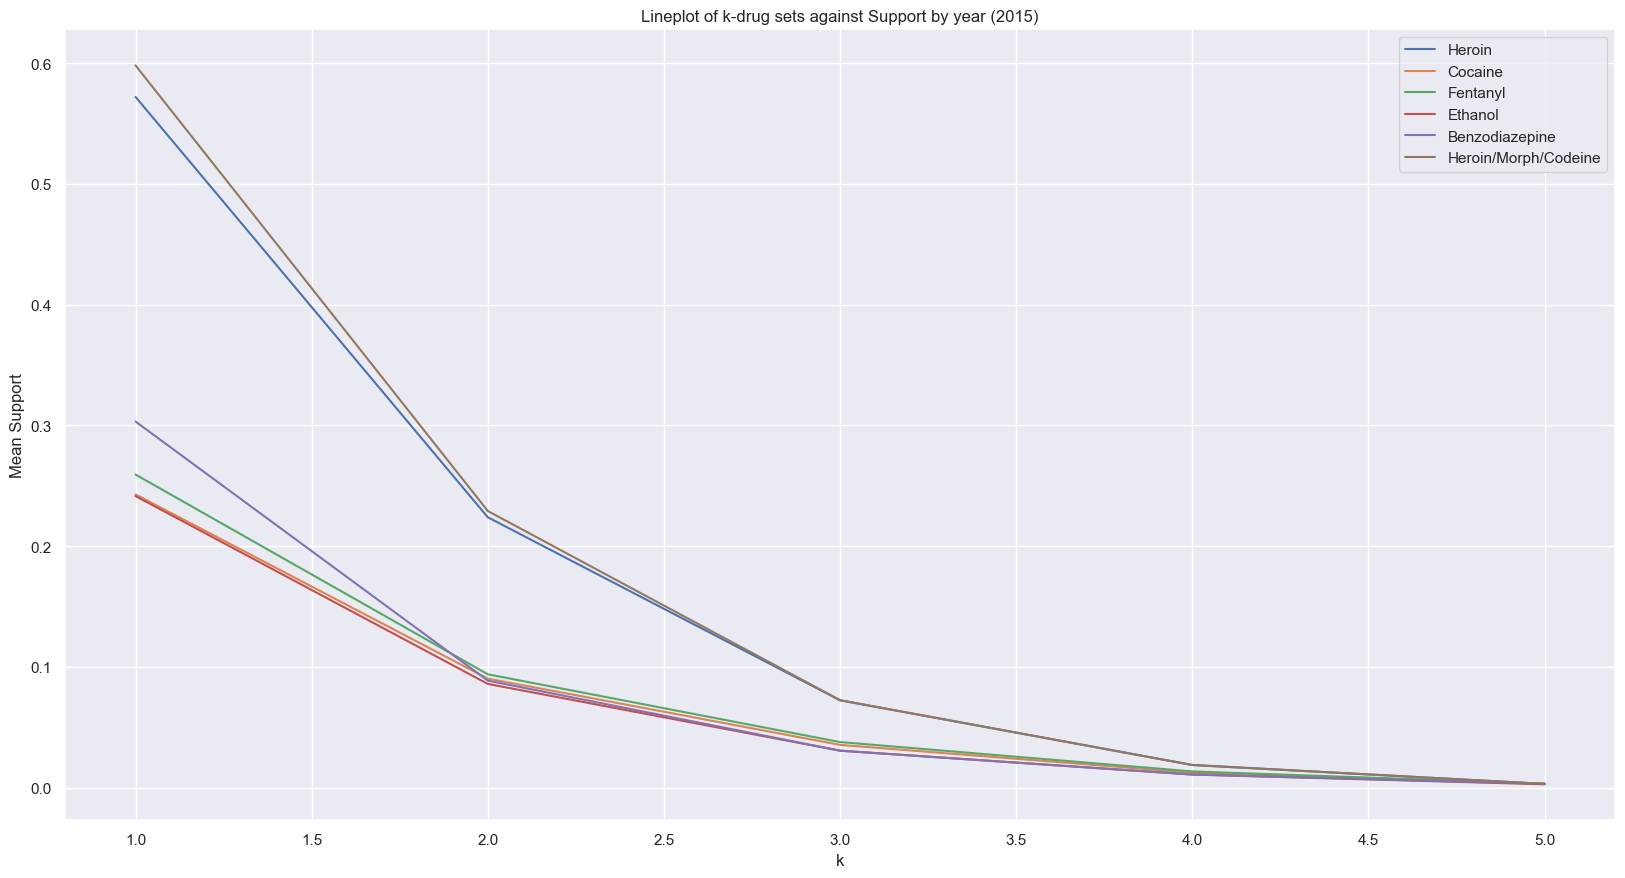

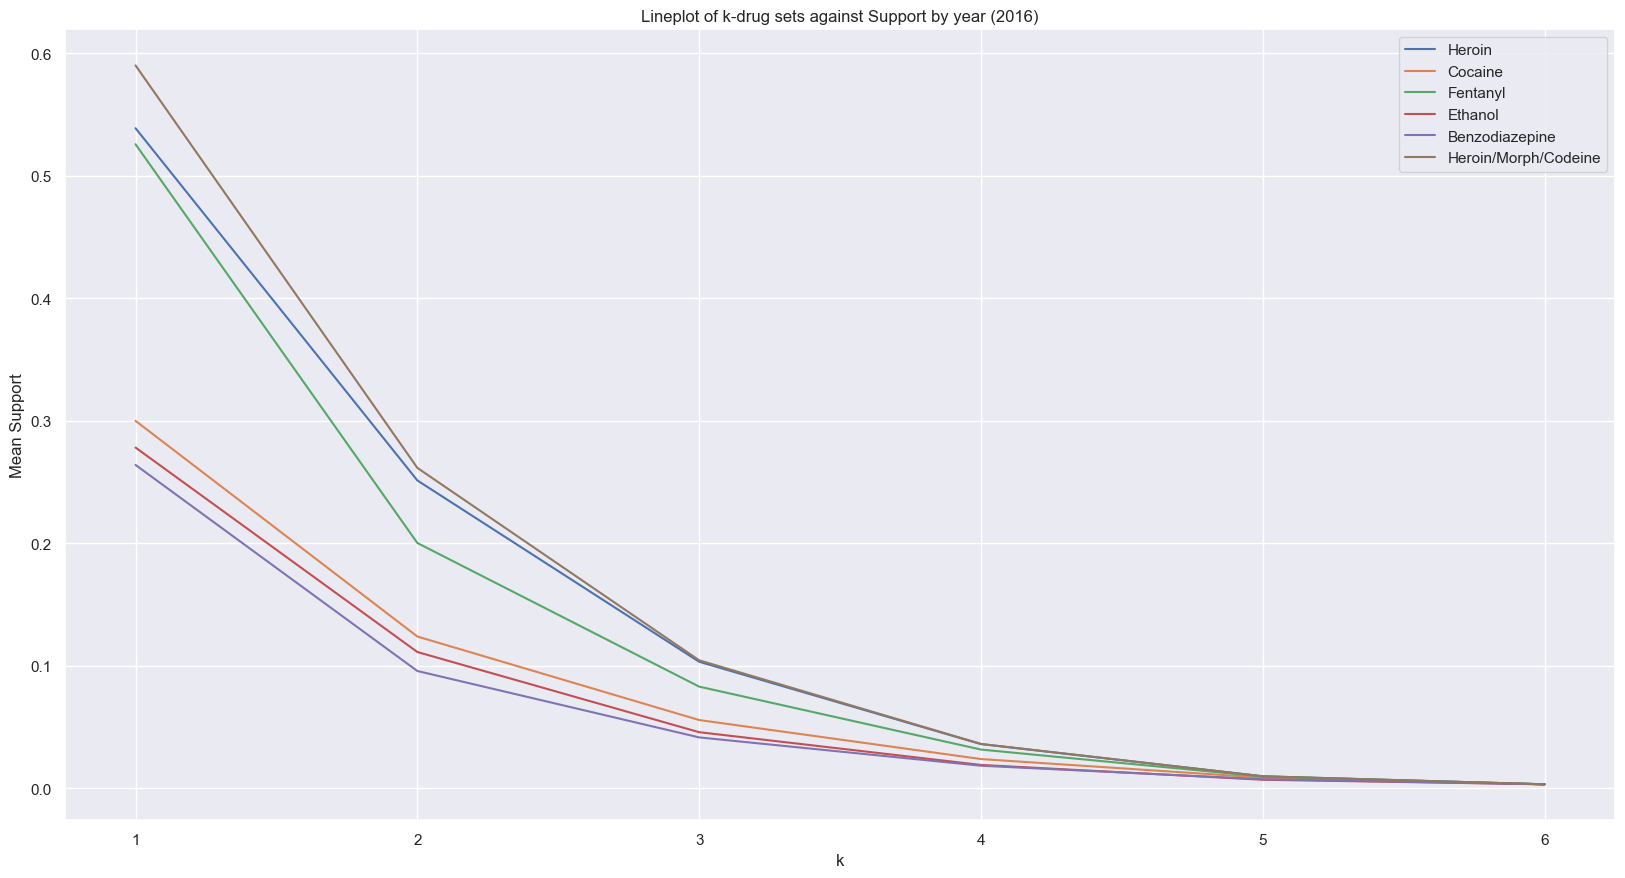

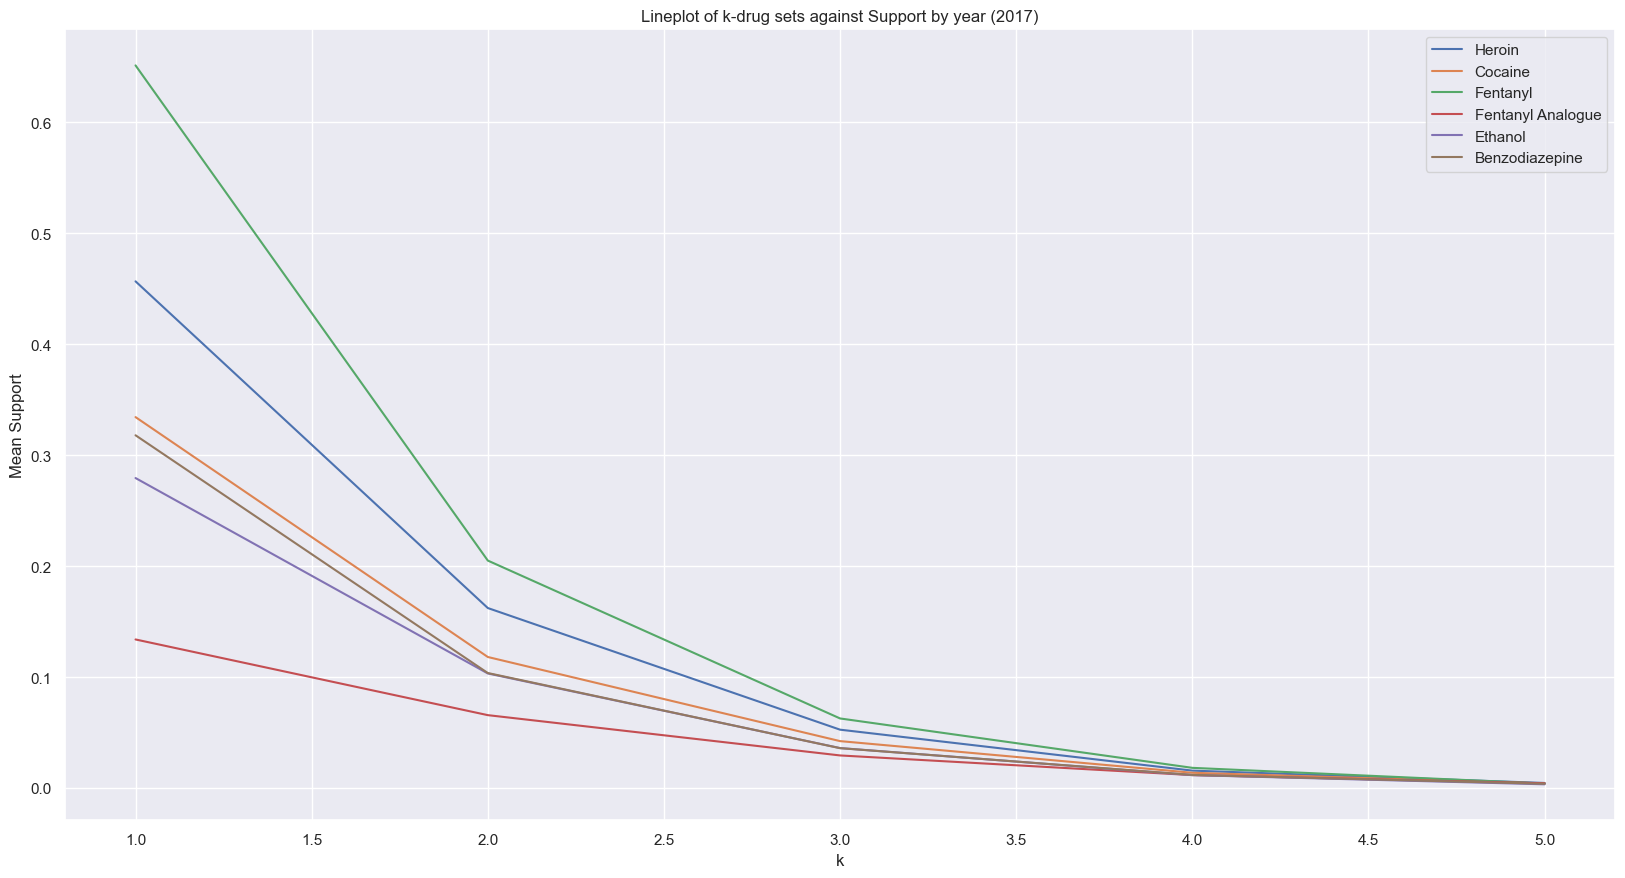

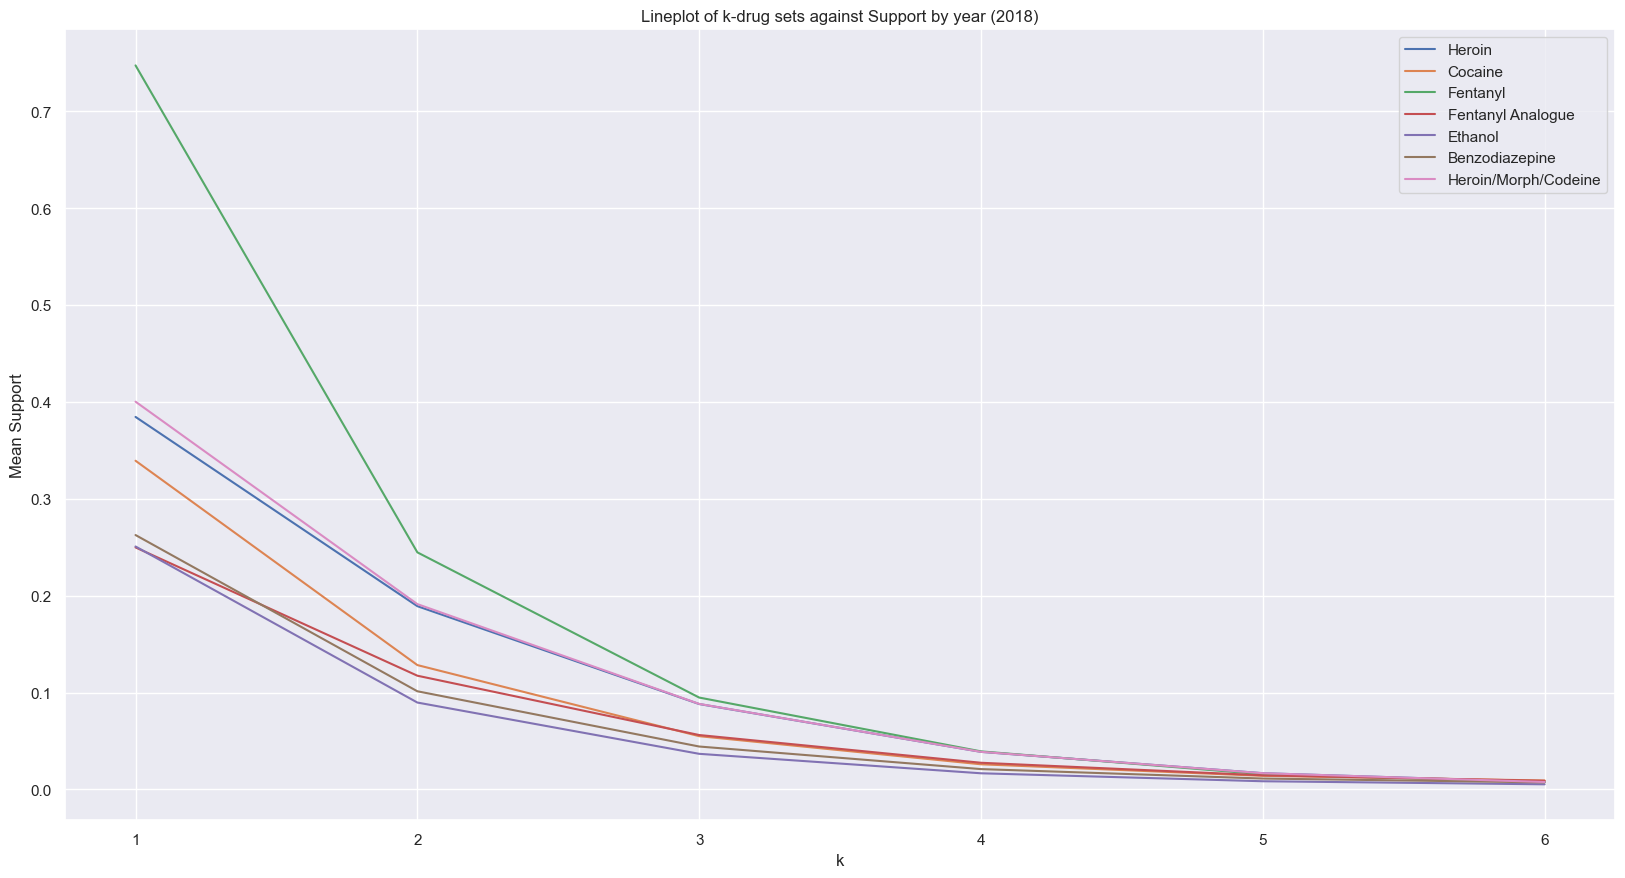

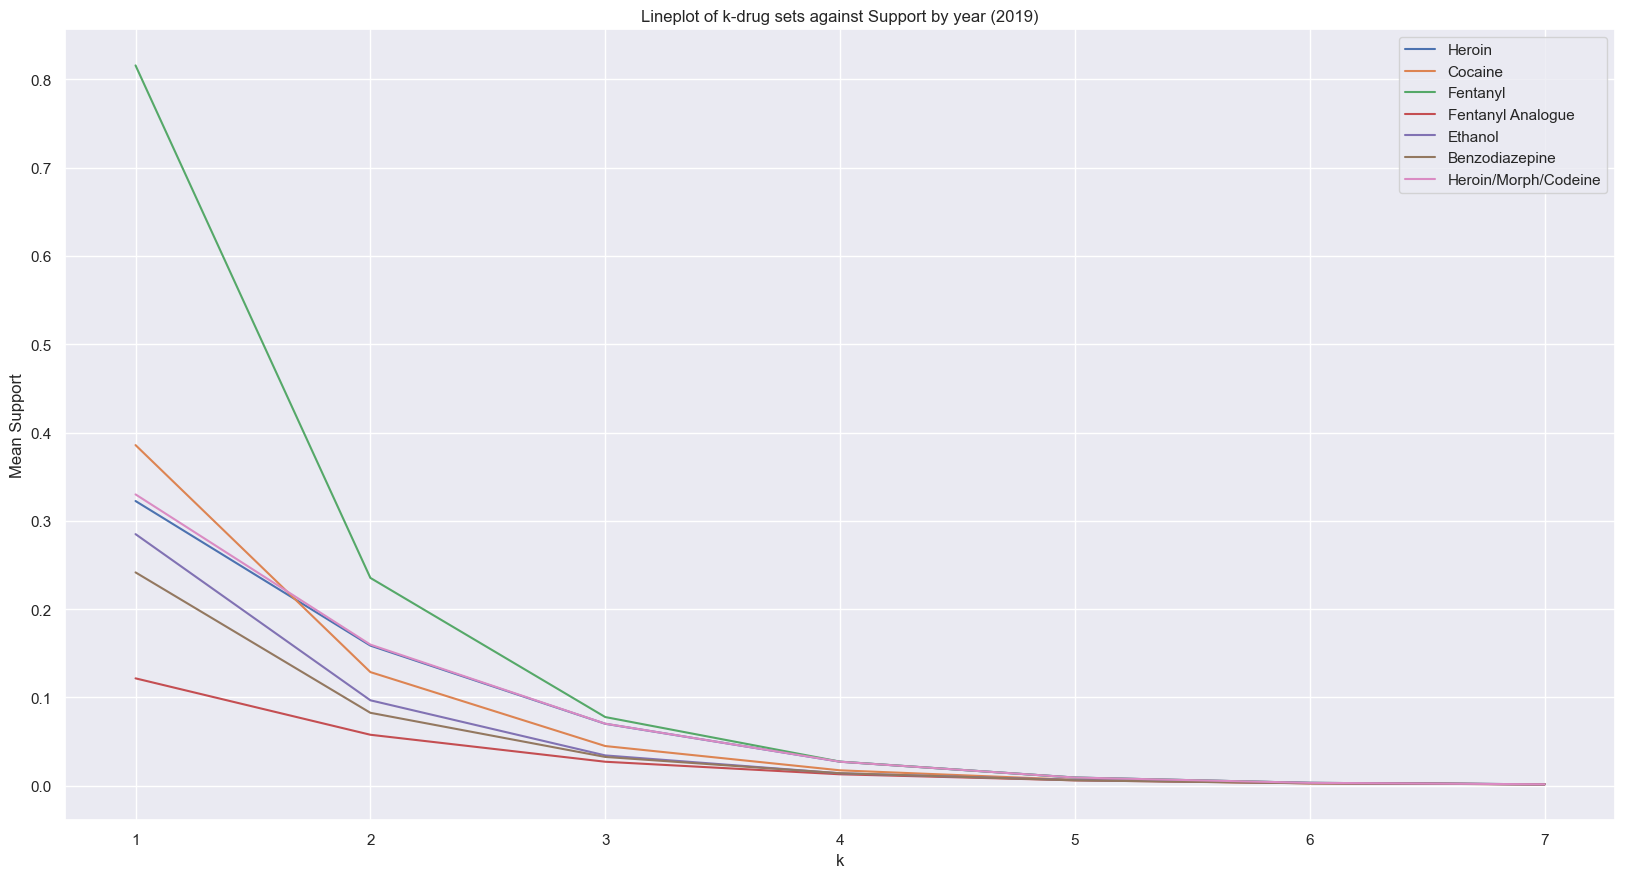

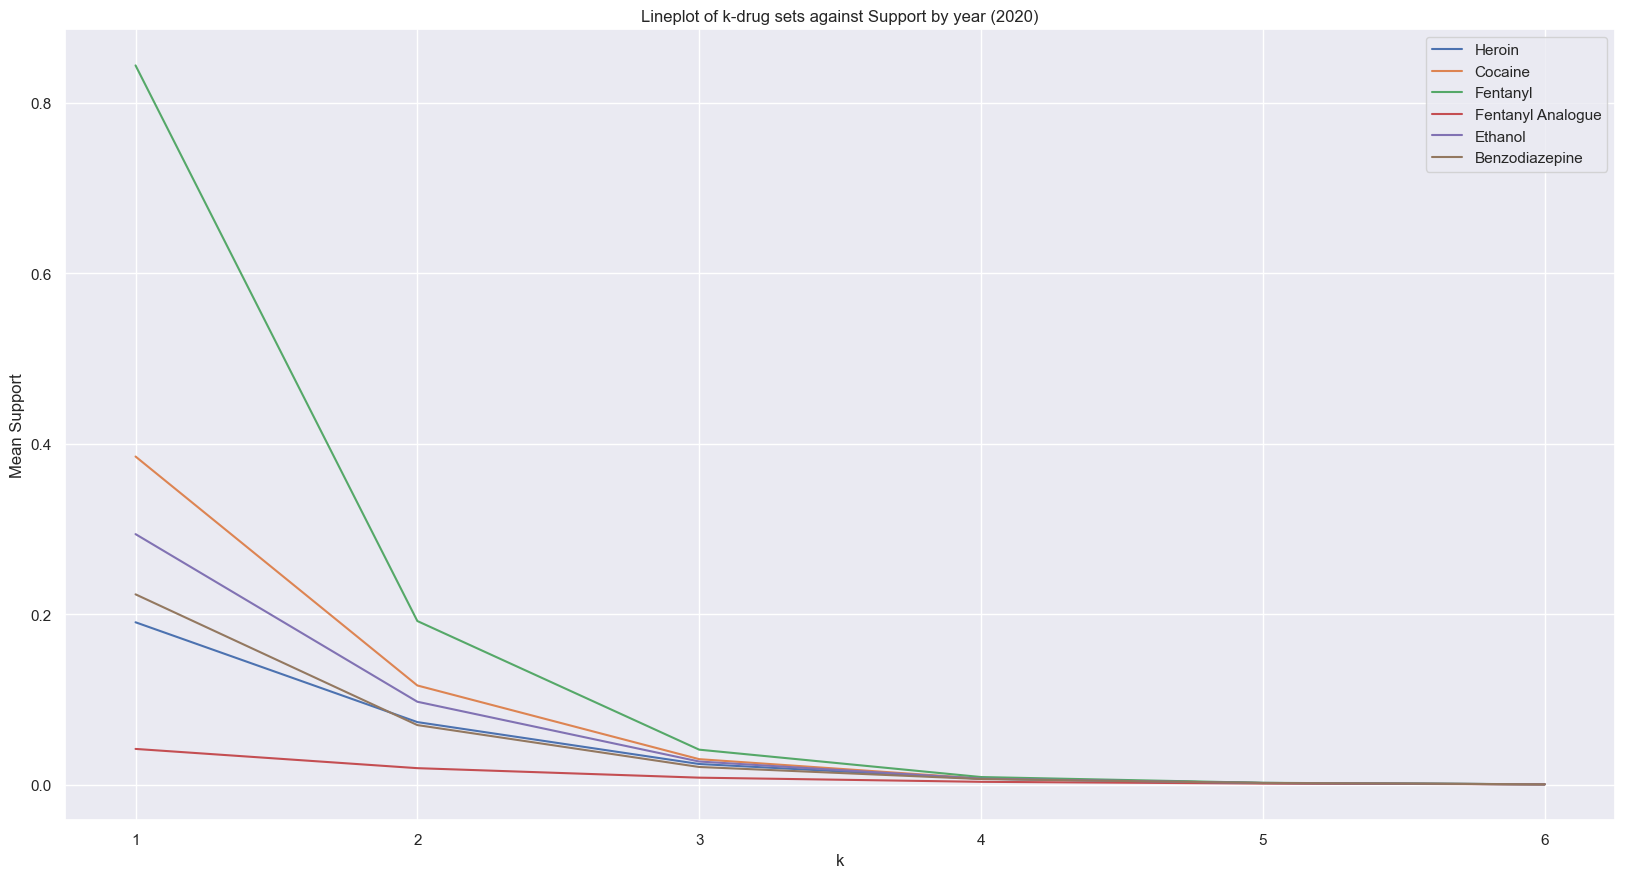

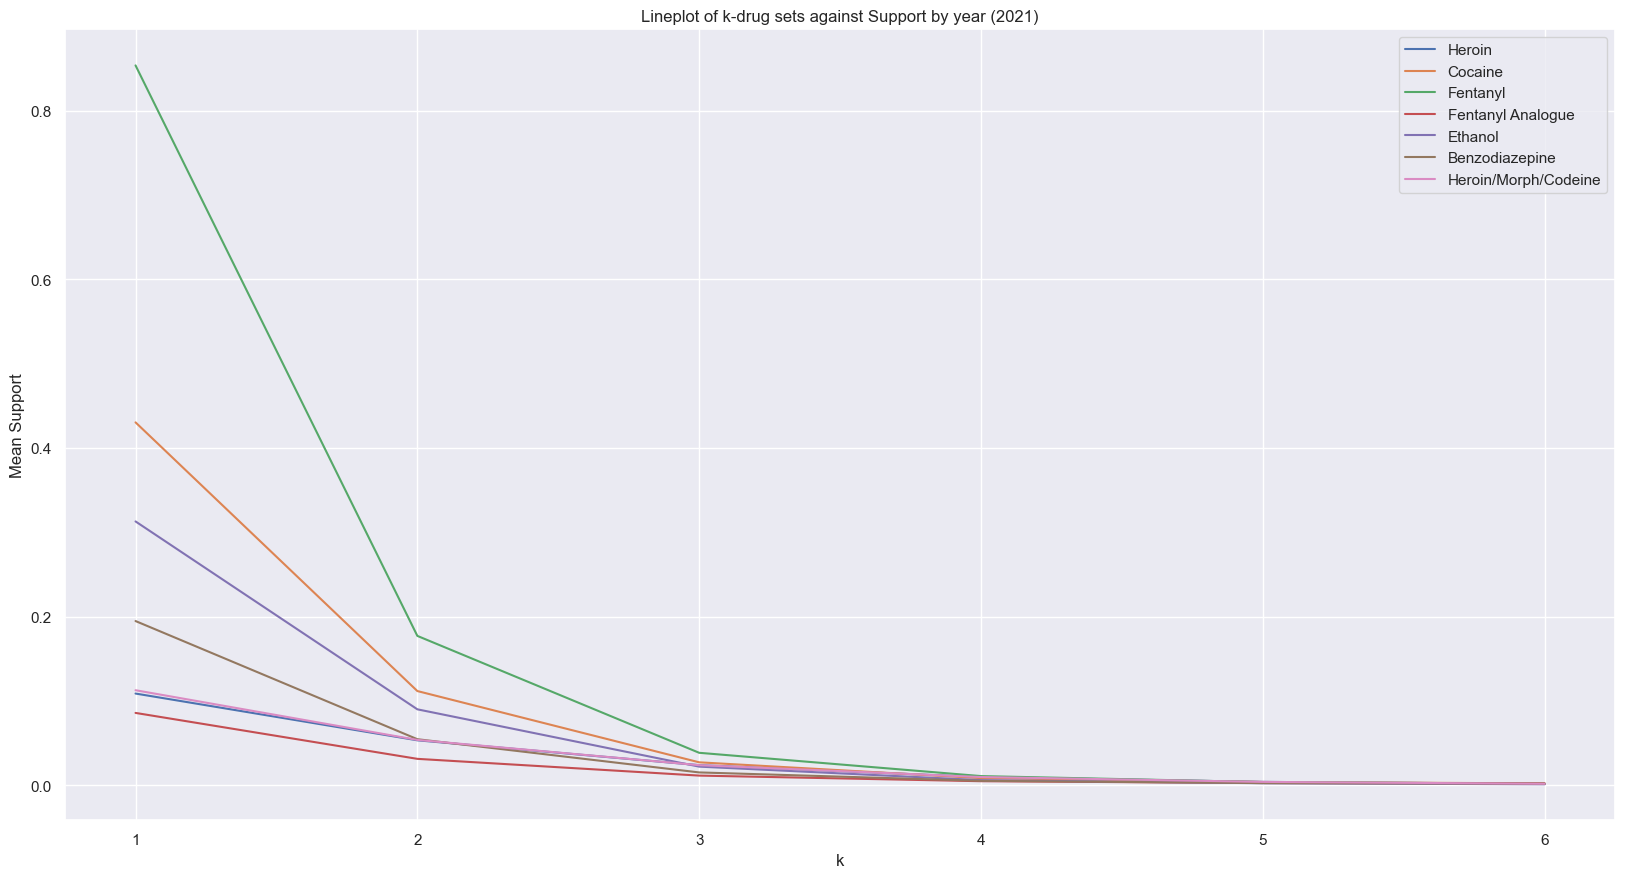

In [133]:
measure_by_group('year', tox_unfiltered_year, np.sort(tox_unfiltered_year['year'].unique()), 'supp',
                 list(tox_unfiltered_year.columns[:7]), tox_unfiltered_year)

In [134]:
# Analysis: It will not be sensible to dive into literally each year however, we can extract patterns and meaningful
# observations like the following:
# 1) We observe multiple drugs in 2012 all with considerable longevity. Conseqeuntly, we see MDT as the most frequent 
# death type that year showing that our previous findings of conf(Heroin/Cocaine | MDT) was high was correct.

# 2) Interestingly, the years 2013 and 2014 show a decrease in the support of cocaine while more or less heroin's support
# was the same. And those years we see HI instead of MDT or AHI, suggesting that supp(AHI/MDT) decrease as supp(cocaine)
# decreases.

# 3) Perhaps the most interesting observation is the fact that one can literally see the popularity of Fentanyl growing
# as year progresses i.e. Supp(Fentanyl | Year) is high for higher year. And in the year 2016, when it overcame cocaine
# and almost heroin, we see the fact that AFI was the most popular death type suggesting that our claim earlier that 
# Fentanyl indiviually has great influence.

# 4) Furthermore, after 2016, we see the support increasing, reaching its peak in 2018, while all other drugs were at their 
# lowesrt support. This clearly suggests the time when Fentanyl boomed in the market. If we take points from our district
# level analysis, we infer that supp(Fentanyl | Year = 2018, City = Hartford(belongs to cluster A)) was clearly the 
# freshest moment and the begining of such a chain deaths by AFI. 
# A suprsing point to note is that we actually observe a slight decrease in the total deaths that year but if 
# we recall from our analysis in D1, we had inferred that in 2016 n = 3, n = 2 skydived to their lowest and 
# n = 4 increased. The n = 4 is likely to be mostly contributed by Fentanyl, seeing that its longevity was consdirably high
# . This is further seen by the point that n = 4 was still reached its peak just when Fentanyl did. All in all,
# regarding the most common cause of death i.e. AFI, we infer Fentanyl as one of the most causes and Hartford and any other
# city in cluster A as the centre for such cases.

# Final point to note is that it the support and longeivity of Fentanyl follows the iconic "hill-shaped" distribution we 
# have been seeing everywhere. However, after coming this far, it seems obvious and logical. The reason being the same 
# reason why the frequency of k-itemsets decreases as k increases.


# Most common cause of death each year: year
# 2012         (2012, Multiple Drug Toxicity)
# 2013            (2013, Heroin Intoxication)
# 2014            (2014, Heroin Intoxication)
# 2015          (2015, Acute Heroin Toxicity)
# 2016    (2016, Acute Fentanyl Intoxication)
# 2017    (2017, Acute Fentanyl Intoxication)
# 2018    (2018, Acute Fentanyl Intoxication)
# 2019    (2019, Acute Fentanyl Intoxication)
# 2020    (2020, Acute Fentanyl Intoxication)
# 2021    (2021, Acute Fentanyl Intoxication)
# Name: Cause of Death, dtype: object

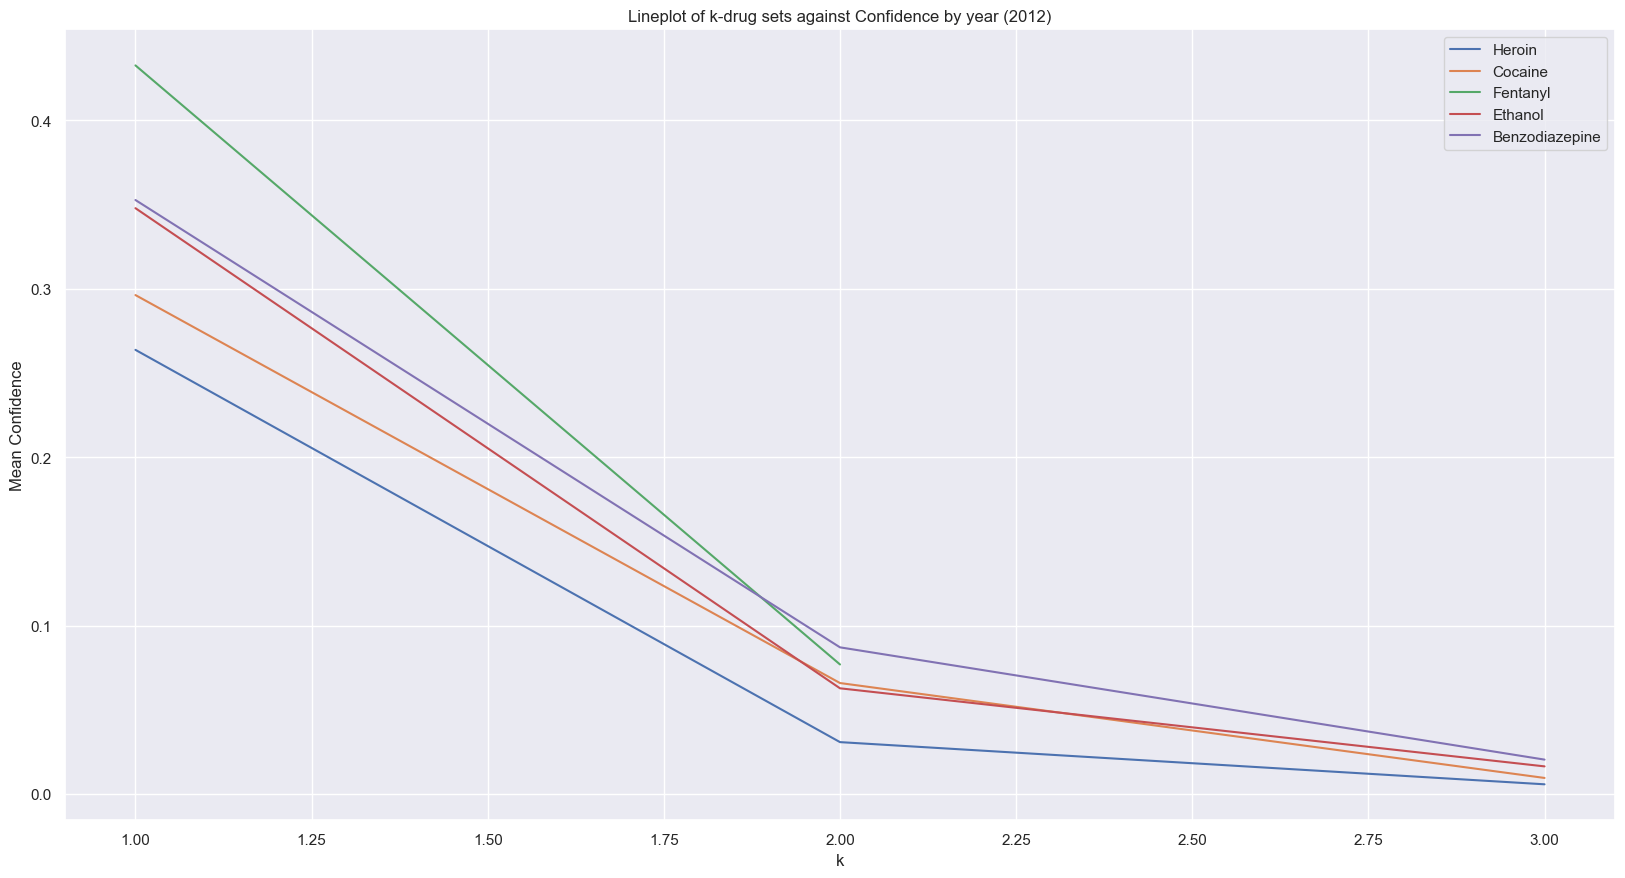

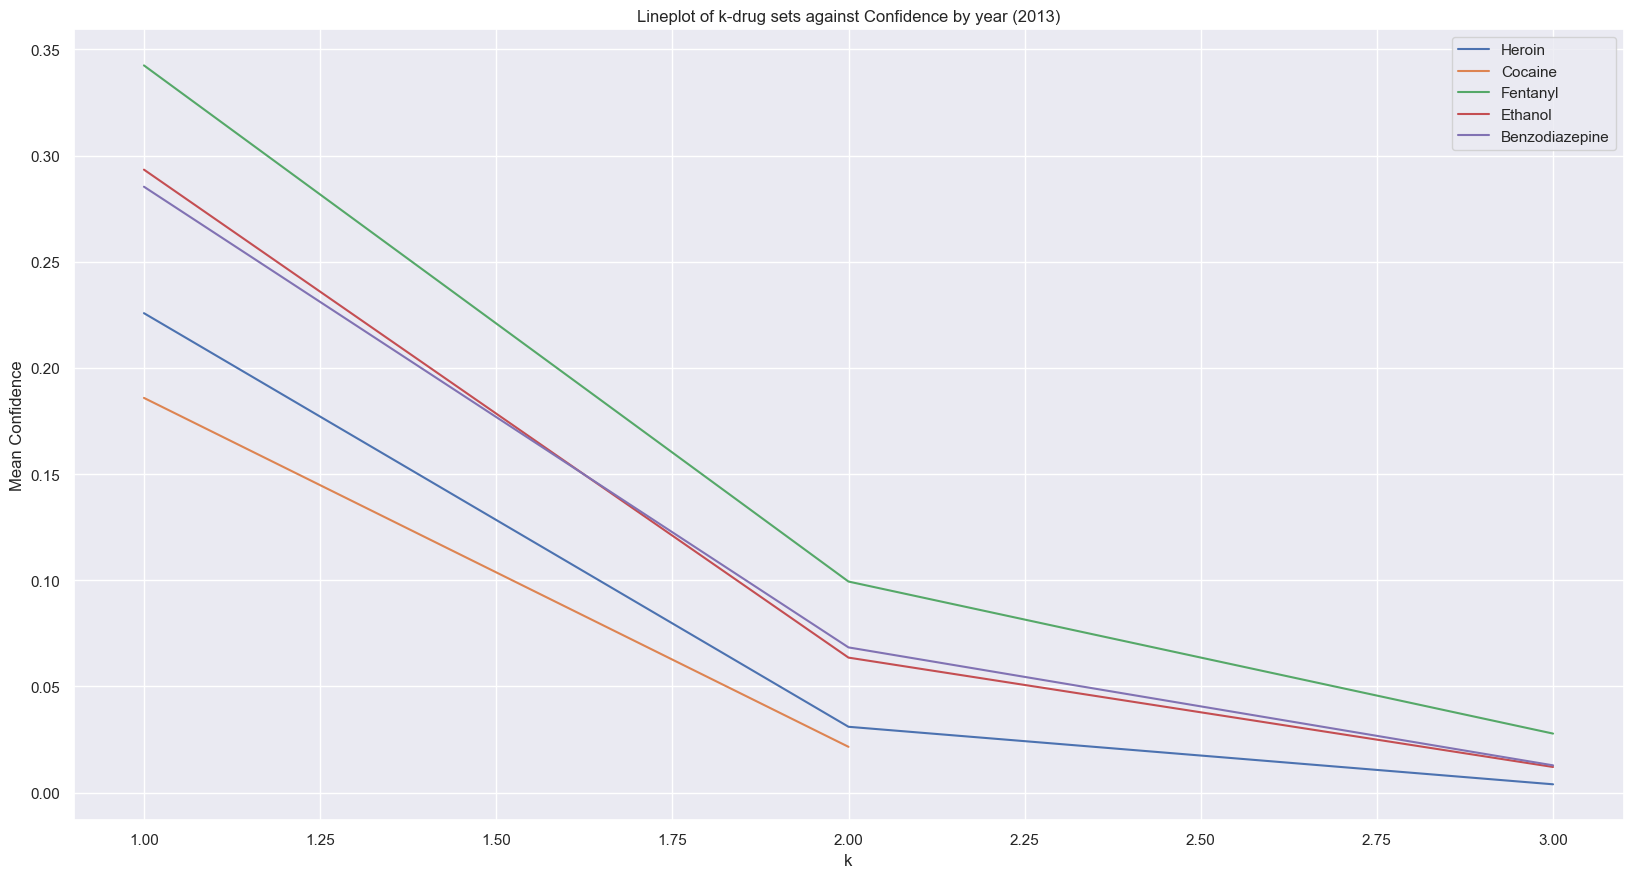

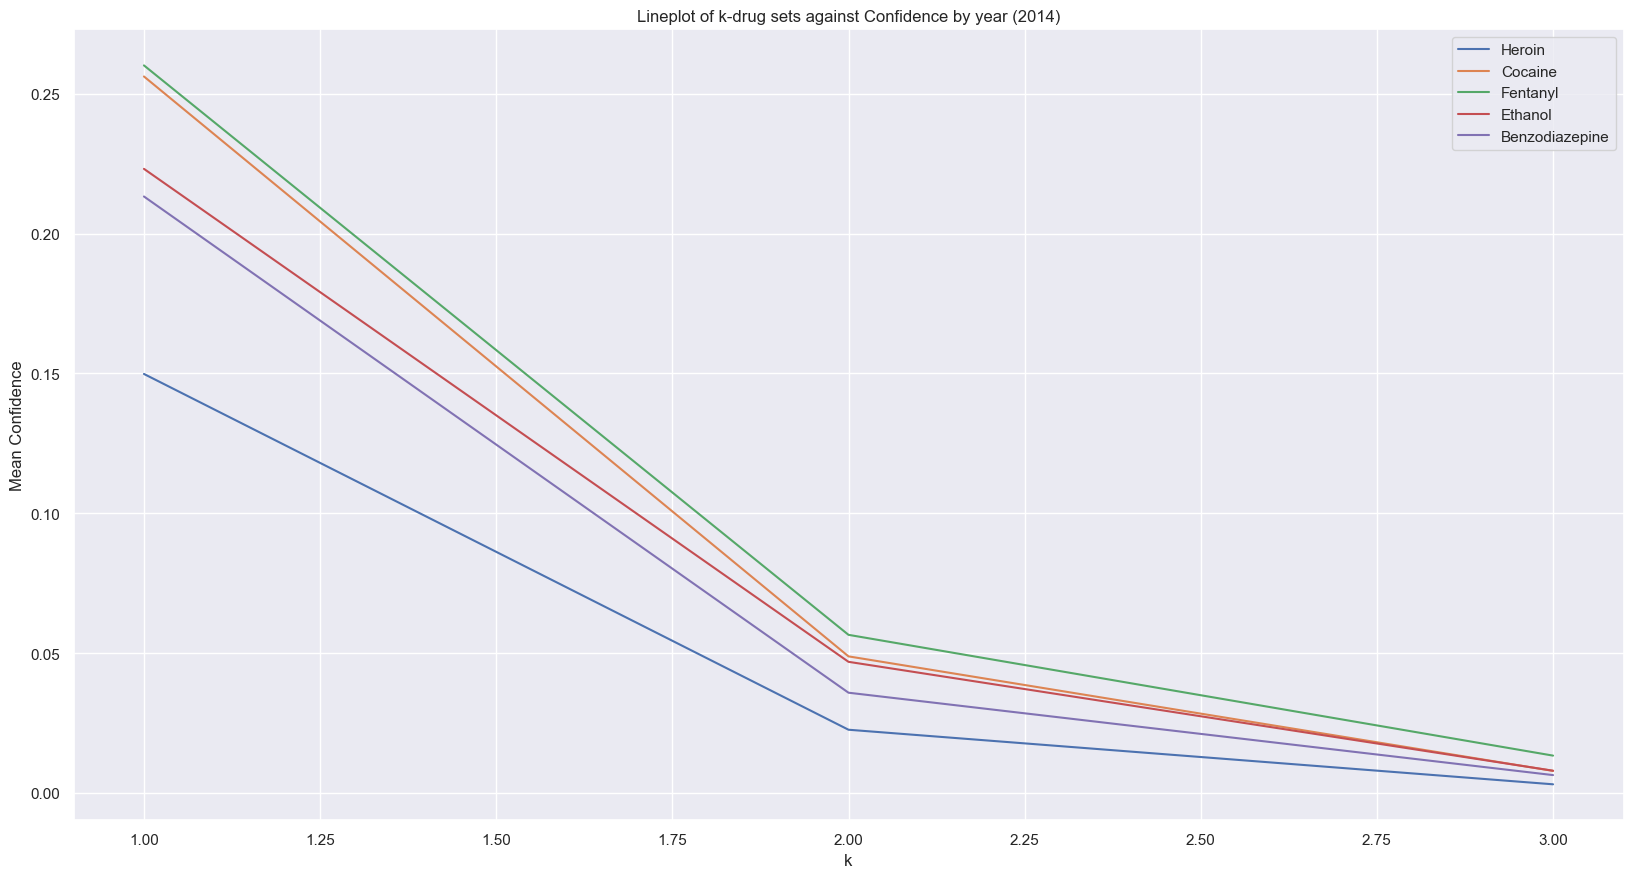

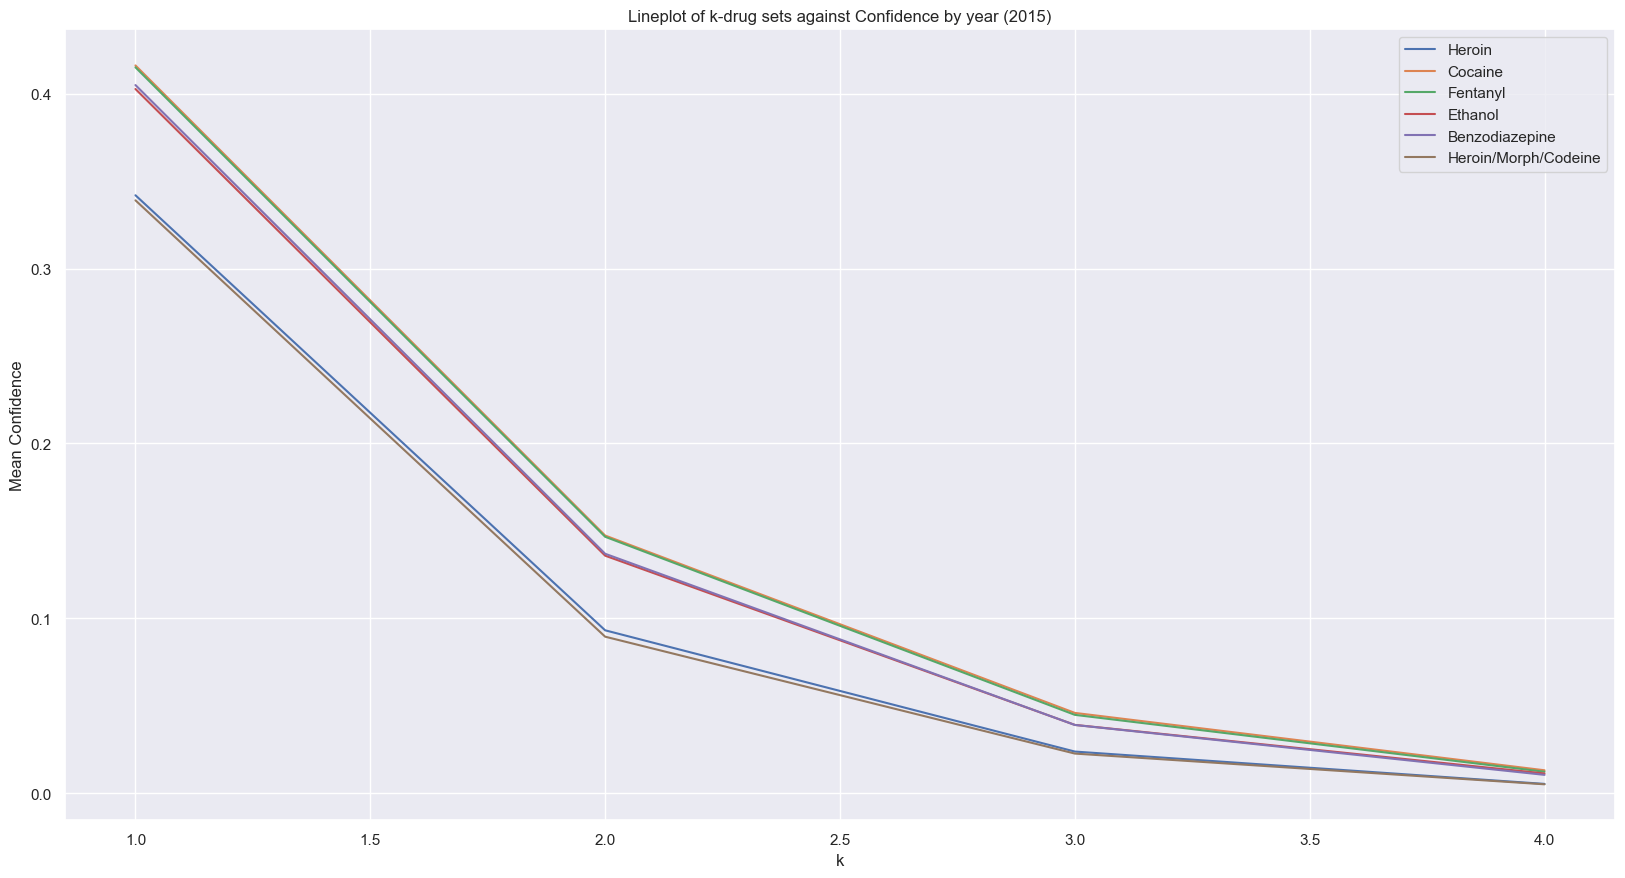

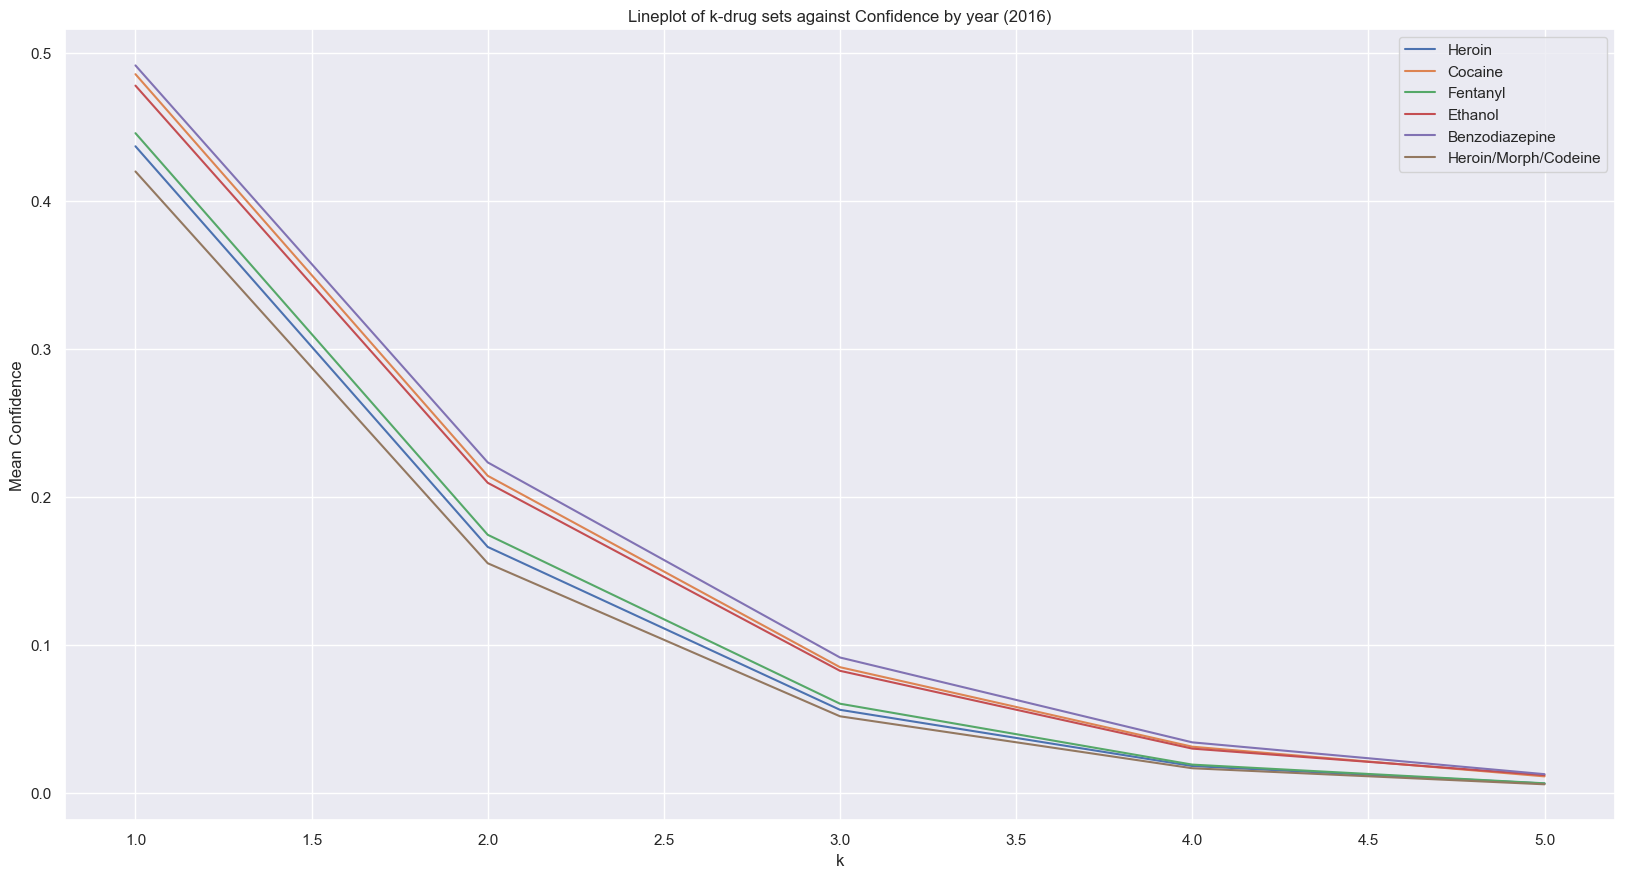

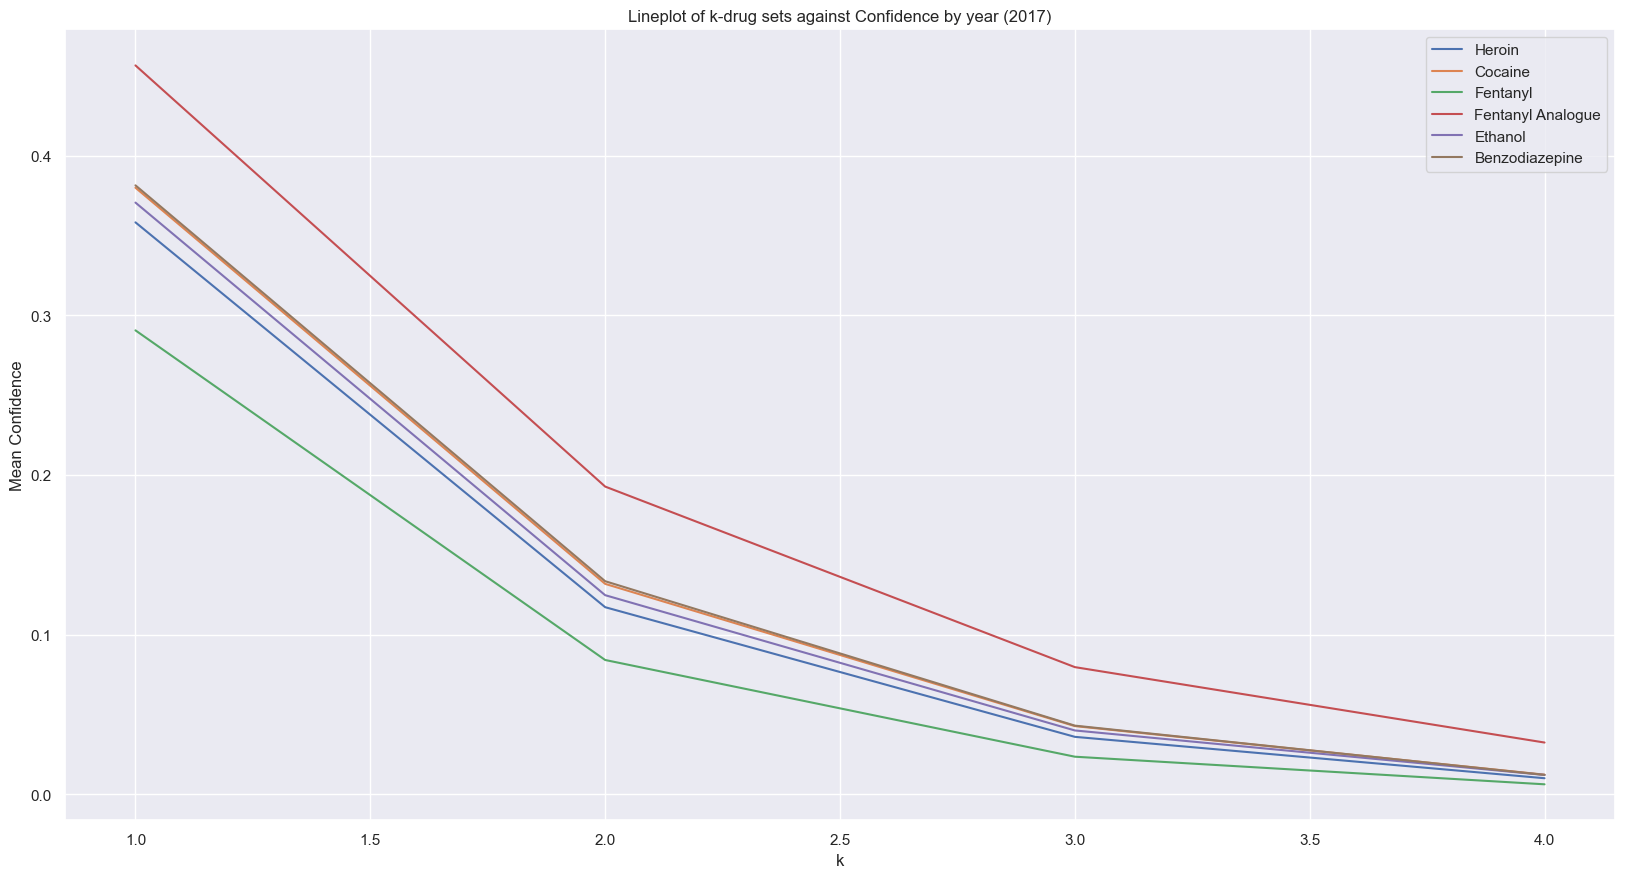

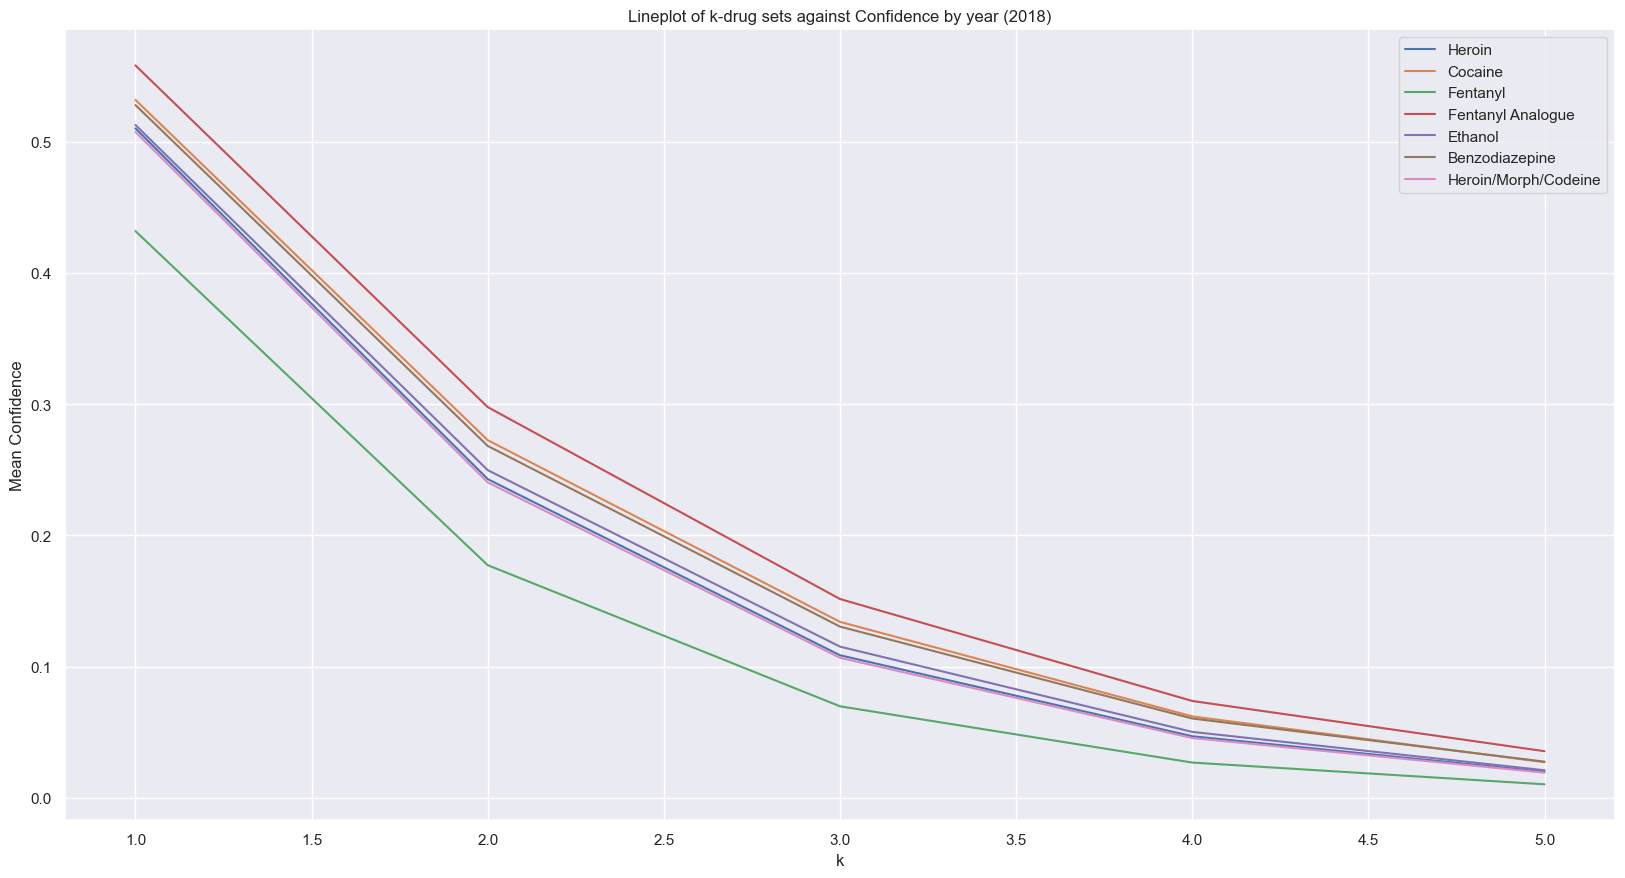

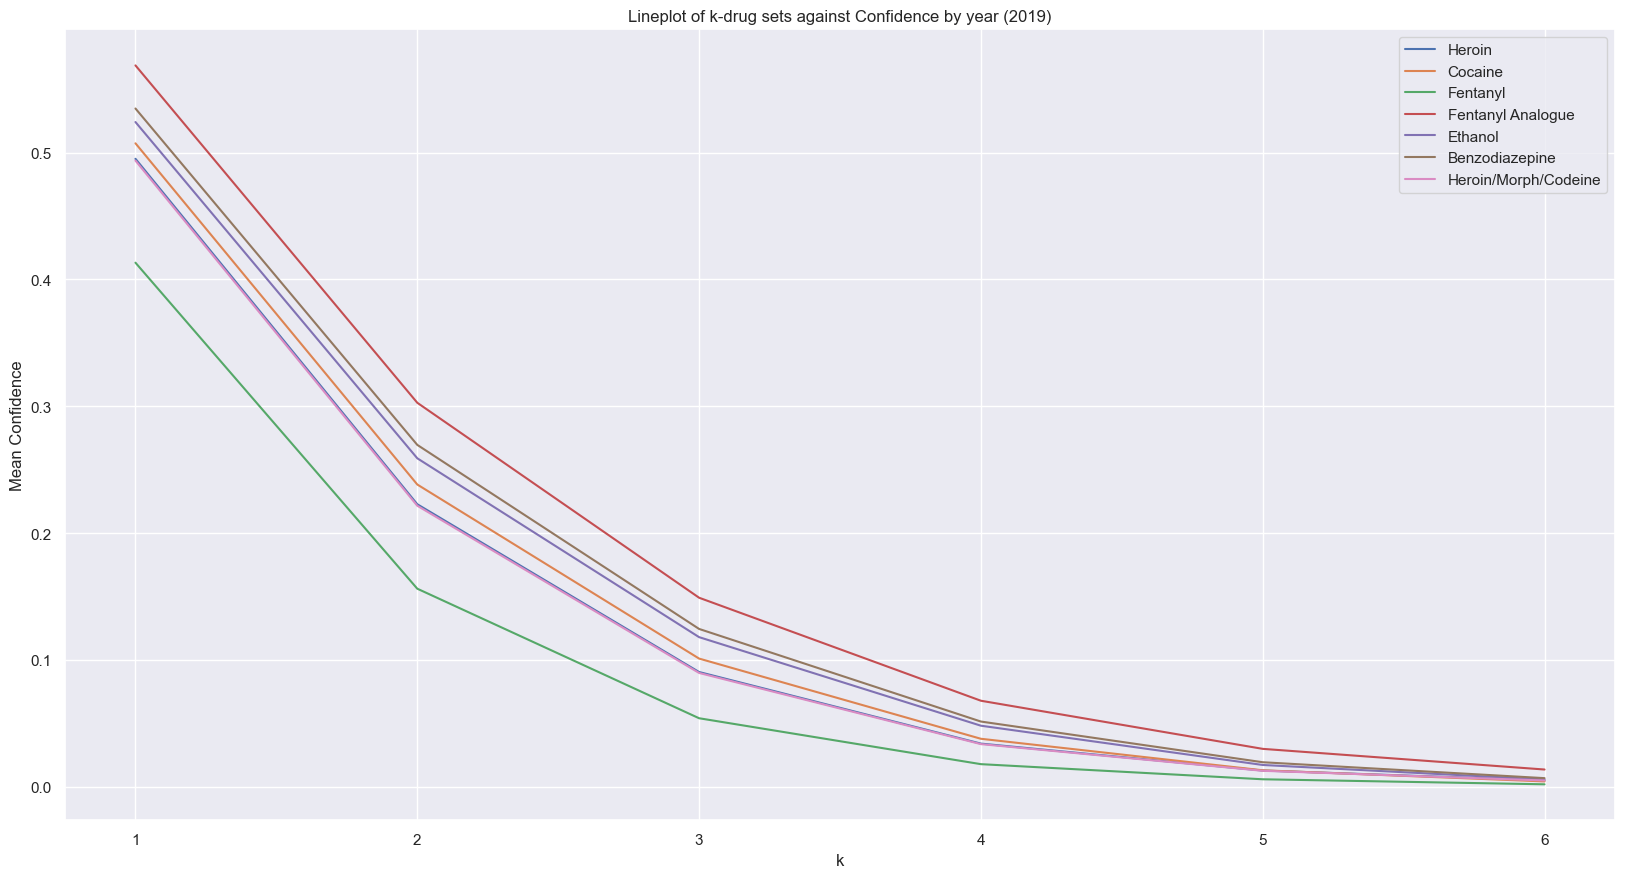

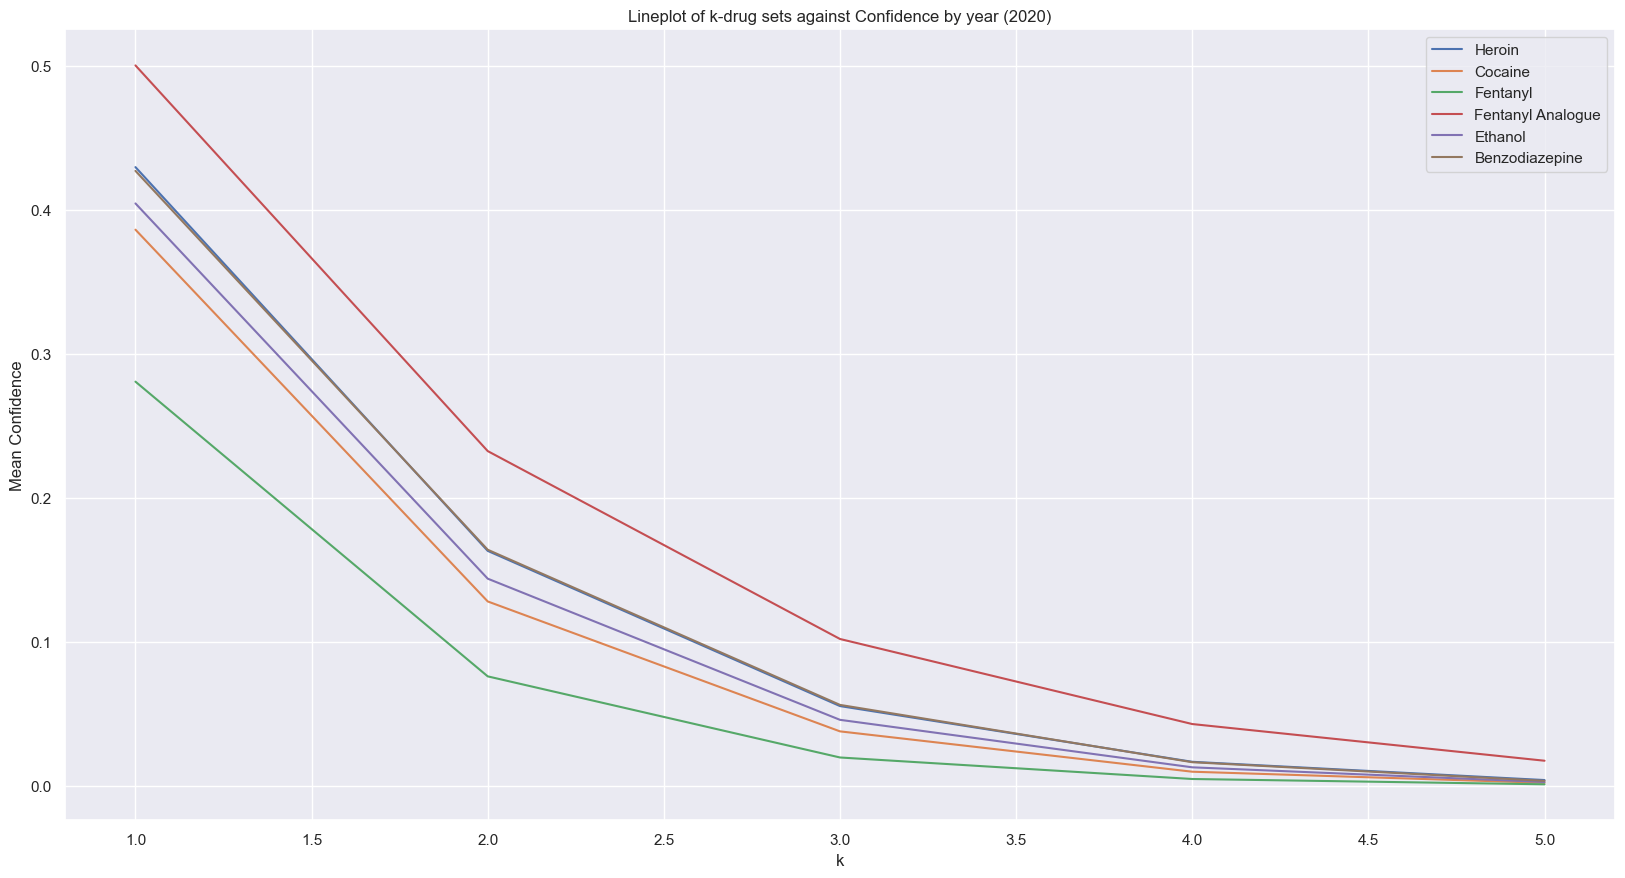

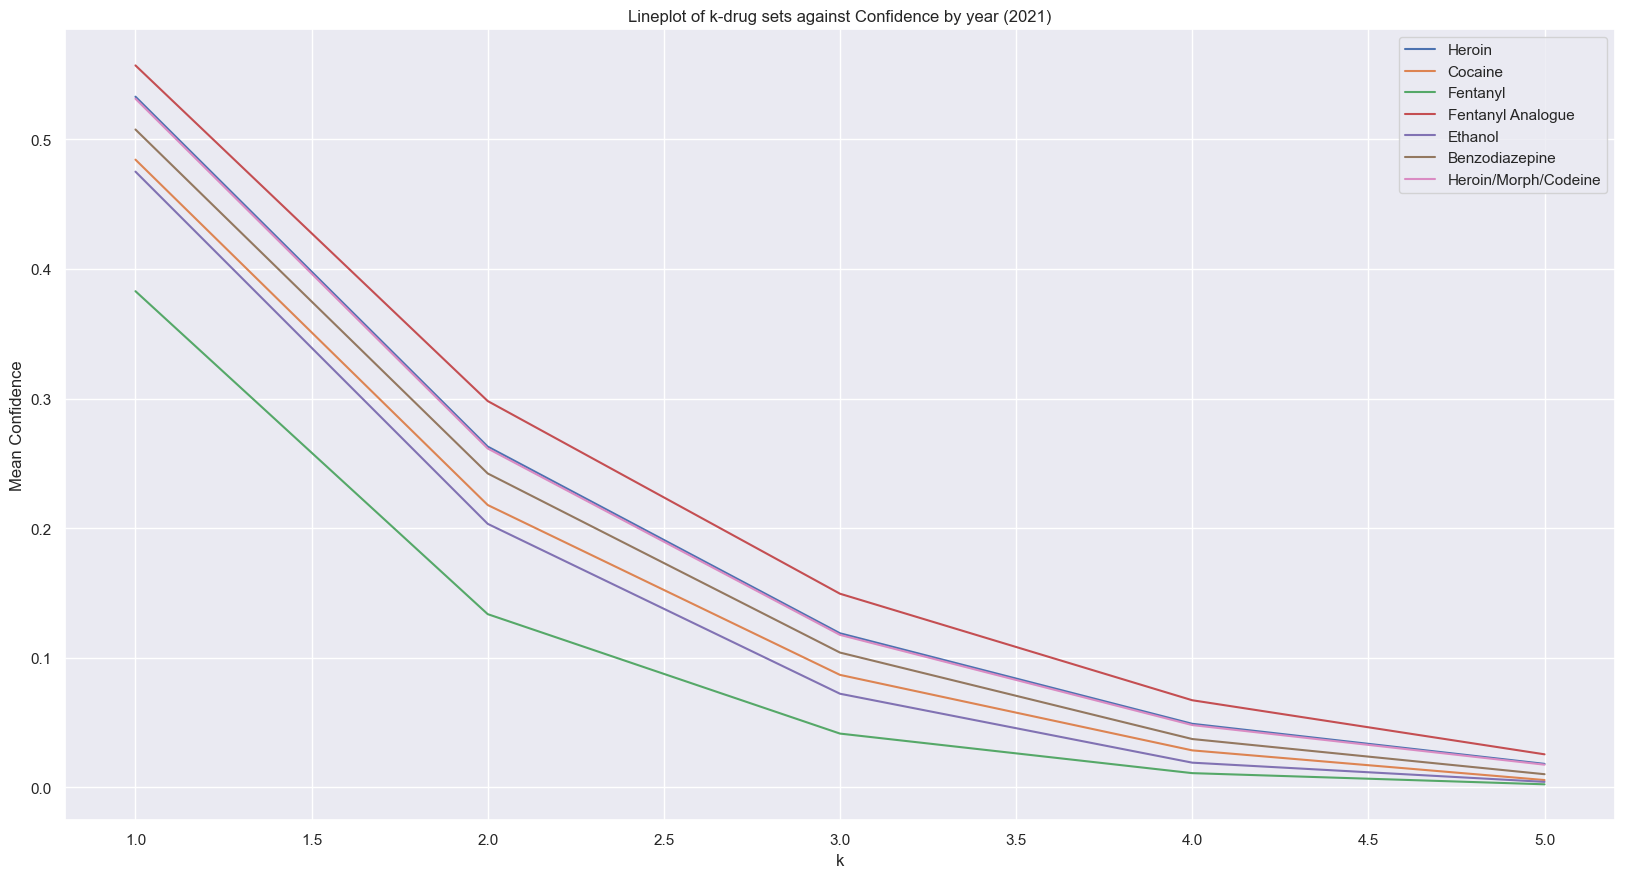

In [135]:
# Let's look at the confidence plot and lets focus on Fentanyl, the main centre of attention
measure_by_group('year', tox_unfiltered_year, np.sort(tox_unfiltered_year['year'].unique()), 'conf',
                 list(tox_unfiltered_year.columns[:7]), tox_unfiltered_year)

In [136]:
# Funny enough, we are seeing the growth/influence of Fentanyl starting from 2012 as it has the highest confidence i.e.
# chance of joint-occurence with other drugs, a classic quality of an upcoming drug. 
# One more point to note is that just before it hit its peak support in 2018, it showed highest confidence in 2015. This
# suggests the moment when Fentanyl had really seaped into the state and was about to solely overtake all other death types.

# In terms of FPM and association rule mining context, we can say that confidence(k --> Fentanyl) is likely to be greater
# for earlier years relative to later years as we can see from its gradual decrease. This can safely be attributed to its 
# increasing influence.